# PyBrain을 이용한 강화학습 실습 (1)

* 싸이그래머+싸이지먼트 : 의사결정RL - 강화학습 파트
* 김무성

# 1. Pybrain 개요 & 설치

## Pybrain

* http://pybrain.org/
* PyBrain is short for Python-Based Reinforcement Learning, Artificial Intelligence and Neural Network Library.
* Github
    - https://github.com/pybrain/pybrain

### 설치

* https://github.com/pybrain/pybrain/wiki/installation

In [ ]:
# pre-install : 설치편의를 위해 anaconda 설치를 추천
pip install numpy
pip install scipy
pip install pylab

In [ ]:
# pybrain install
pip install pybrain

In [43]:
# 제대로 설치되었나 확인
import pybrain

In [ ]:
# PyBrain’s documentation
http://pybrain.org/docs/

<img src="http://pybrain.org/docs/_images/dataprocessing_flowchart.jpg" width=600 />

### Reinforcement Learning
* A reinforcement learning (RL) task in PyBrain always consists of a few components that interact with each other: 
    - Environment, 
    - Agent, 
    - Task, and 
    - Experiment. 
* In this tutorial we will go through each of them, create the instances and explain what they do.

<img src="http://pybrain.org/docs/_images/rl.png" width=600 />

<img src="http://1.bp.blogspot.com/_aVWavDgBgAM/TGiW7uZ8kBI/AAAAAAAAAAM/jmczcKofKgo/s1600/schema.png" width=600 />

# 2. 예제 - 미로 학습

https://github.com/pybrain/pybrain/blob/master/examples/rl/valuebased/td.py

In [1]:
from scipy import *
import sys, time

In [2]:
from pybrain.rl.environments.mazes import Maze, MDPMazeTask
from pybrain.rl.learners.valuebased import ActionValueTable
from pybrain.rl.agents import LearningAgent
from pybrain.rl.learners import Q, SARSA
from pybrain.rl.experiments import Experiment
from pybrain.rl.environments import Task

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

## Environment

The Environment is the world, in which the agent acts. It receives input with the performAction() method and returns an output with getSensors(). All environments in PyBrain are located under pybrain/rl/environments.

One of these environments is the maze environment, which we will use for this tutorial. It creates a labyrinth with free fields, walls, and an goal point. An agent can move over the free fields and needs to find the goal point. Let’s define the maze structure, a simple 2D numpy array, where 1 is a wall and 0 is a free field:

In [4]:
structure = array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
                   [1, 0, 0, 1, 0, 0, 0, 0, 1],
                   [1, 0, 0, 1, 0, 0, 1, 0, 1],
                   [1, 0, 0, 1, 0, 0, 1, 0, 1],
                   [1, 0, 0, 1, 0, 1, 1, 0, 1],
                   [1, 0, 0, 0, 0, 0, 1, 0, 1],
                   [1, 1, 1, 1, 1, 1, 1, 0, 1],
                   [1, 0, 0, 0, 0, 0, 0, 0, 1],
                   [1, 1, 1, 1, 1, 1, 1, 1, 1]])

Then we create the environment with the structure as first parameter and the goal field tuple as second parameter:

In [5]:
environment = Maze(structure, (7, 7))

## Agent

Next, we need an agent. The agent is where the learning happens. It can interact with the environment with its getAction() and integrateObservation() methods.

### controller

The agent itself consists of a controller, which maps states to actions, a learner, which updates the controller parameters according to the interaction it had with the world, and an explorer, which adds some explorative behavior to the actions. All standard agents already have a default explorer, so we don’t need to take care of that in this tutorial.

The controller in PyBrain is a module, that takes states as inputs and transforms them into actions.

In [13]:
controller = ActionValueTable(81, 4)
controller.initialize(1.)

The table needs the number of states and actions as parameters. The standard maze environment comes with the following 4 actions: north, south, east, west.

Then, we initialize the table with 1 everywhere. This is not always necessary but will help converge faster, because unvisited state-action pairs have a promising positive value and will be preferred over visited ones that didn’t lead to the goal.

### learner

Each agent also has a learner component. Several classes of RL learners are currently implemented in PyBrain: black box optimizers, direct search methods, and value-based learners. The classical Reinforcement Learning mostly consists of value-based learning, in which of the most well-known algorithms is the Q-Learning algorithm. Let’s now create the agent and give it the controller and learner as parameters.

In [14]:
learner = Q() #SARSA() 
agent = LearningAgent(controller, learner)

## Task

So far, there is no connection between the agent and the environment. In fact, in PyBrain, there is a special component that connects environment and agent: the task. A task also specifies what the goal is in an environment and how the agent is rewarded for its actions. For episodic experiments, the Task also decides when an episode is over. Environments usually bring along their own tasks. The Maze environment for example has a MDPMazeTask, that we will use. MDP stands for “markov decision process” and means here, that the agent knows its exact location in the maze. The task receives the environment as parameter.



In [15]:
task = MDPMazeTask(environment)

## Experiment

Finally, in order to learn something, we create an experiment, tell it both task and agent (it knows the environment through the task) and let it run for some number of steps or infinitely, like here:

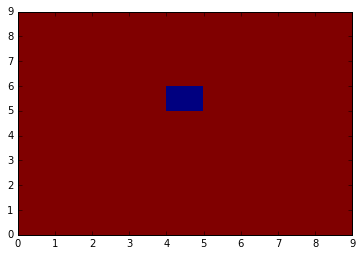

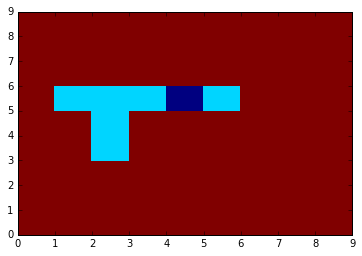

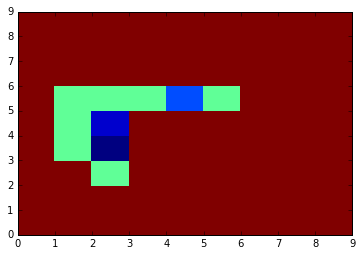

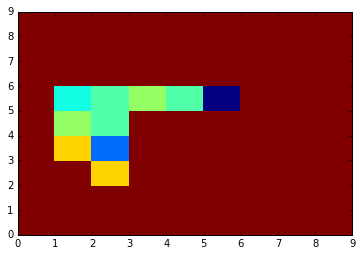

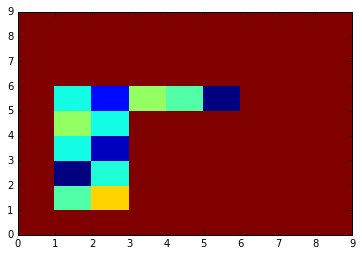

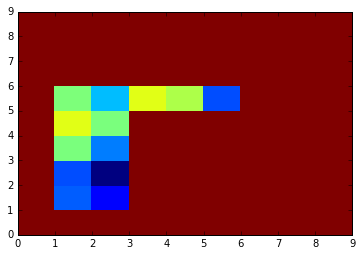

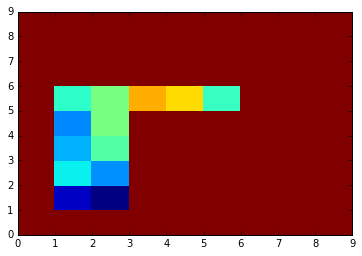

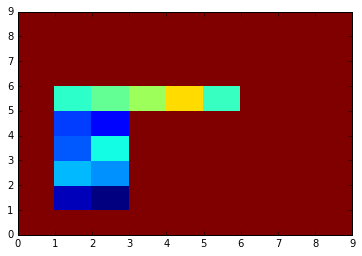

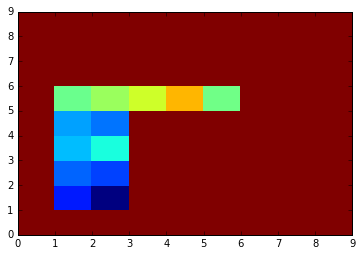

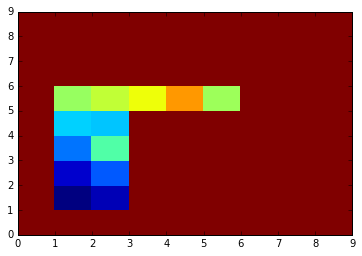

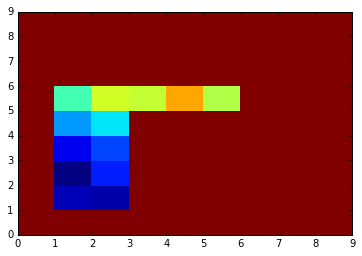

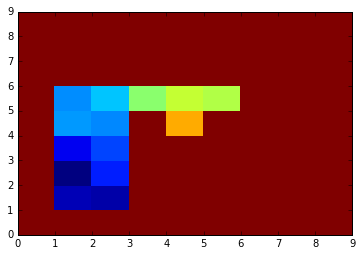

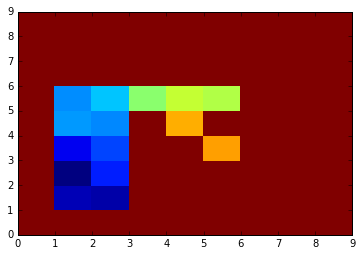

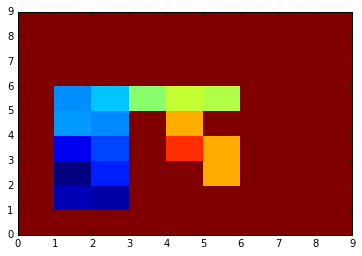

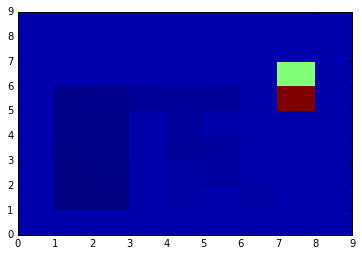

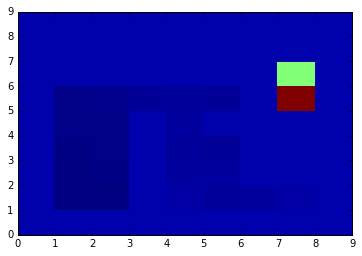

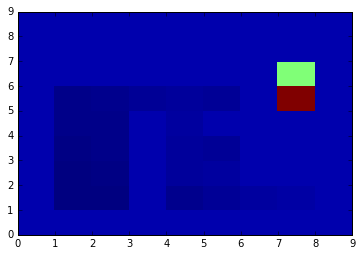

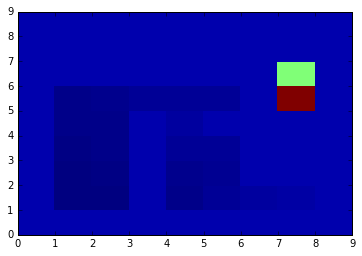

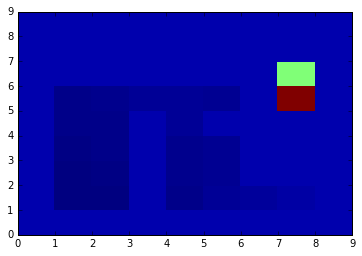

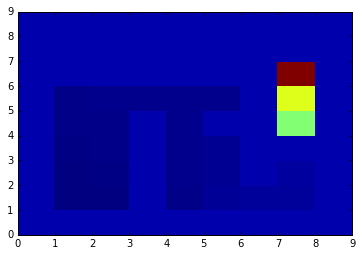

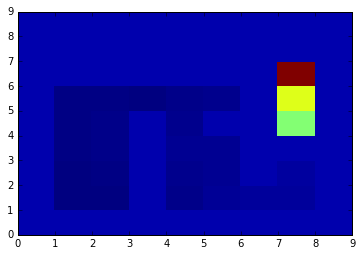

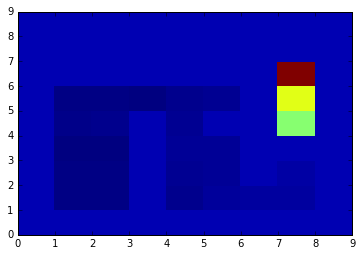

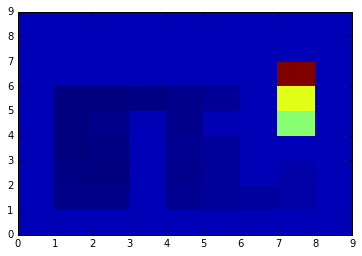

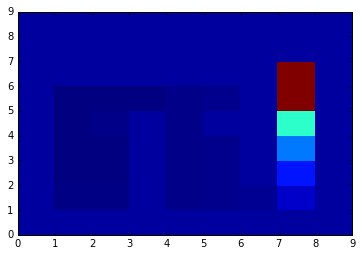

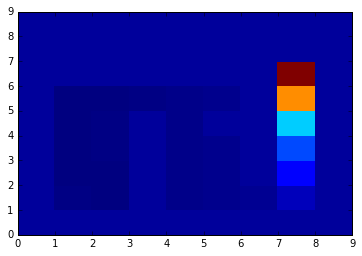

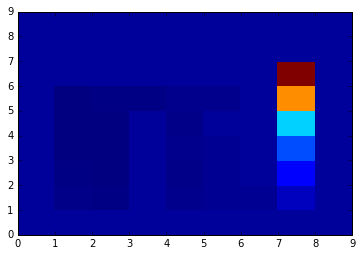

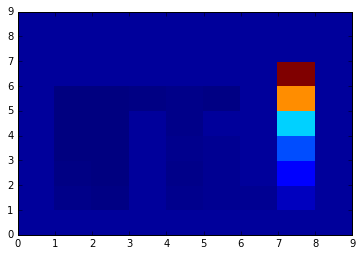

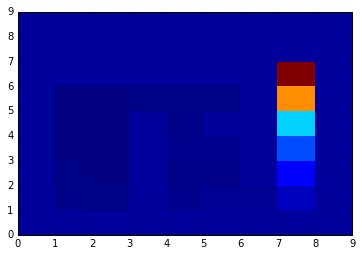

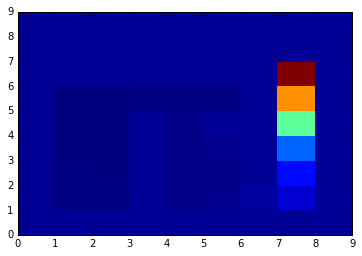

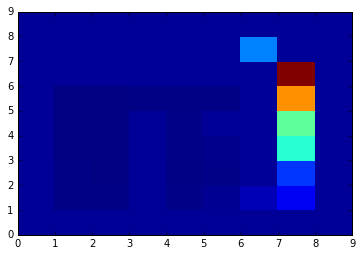

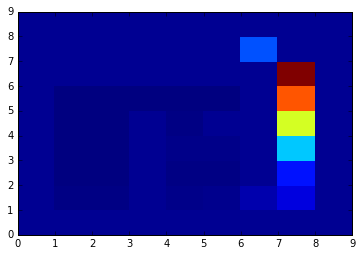

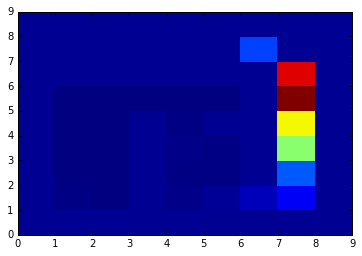

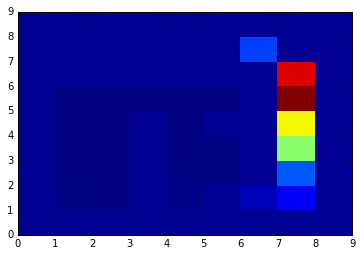

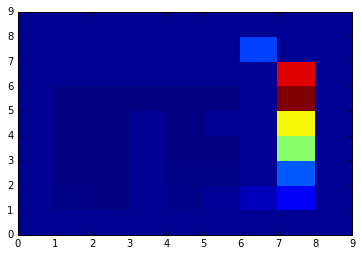

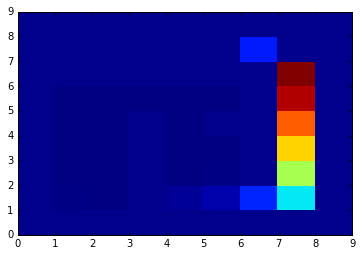

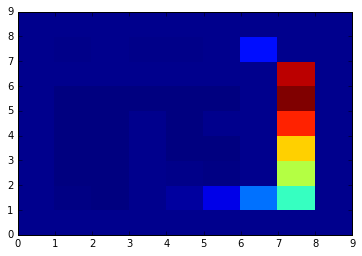

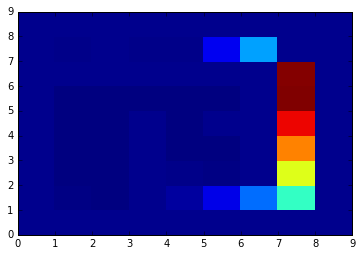

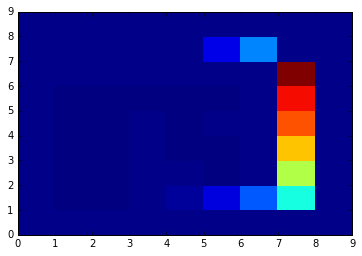

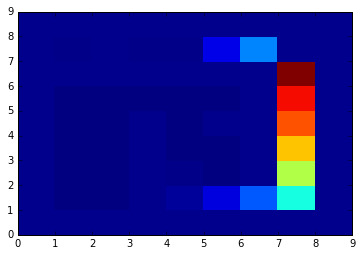

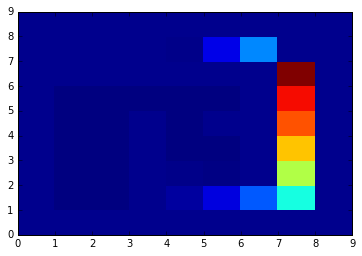

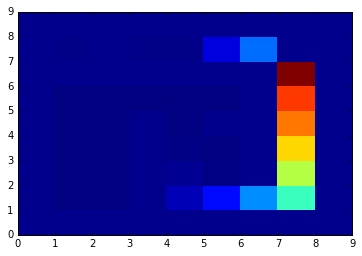

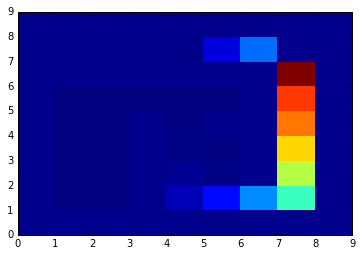

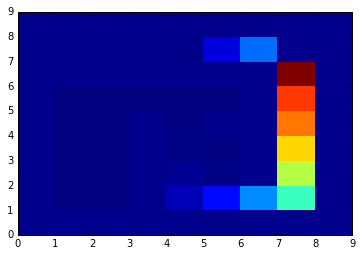

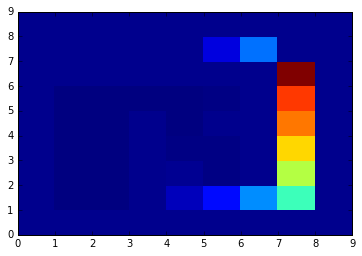

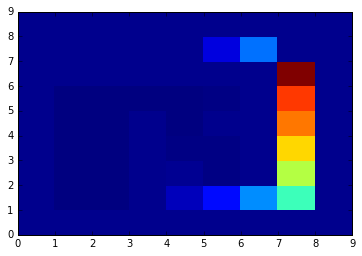

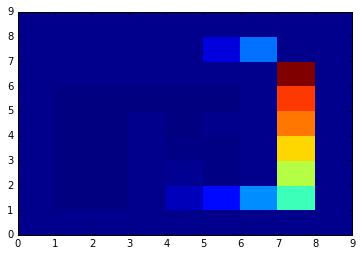

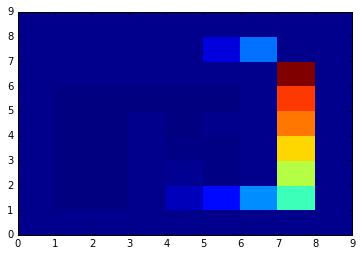

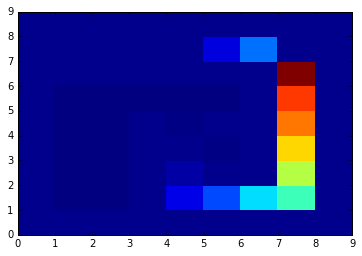

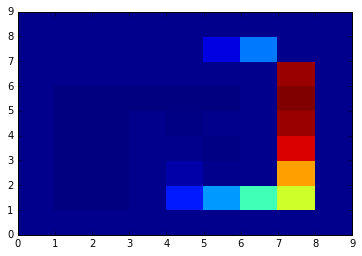

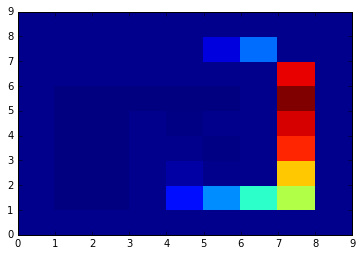

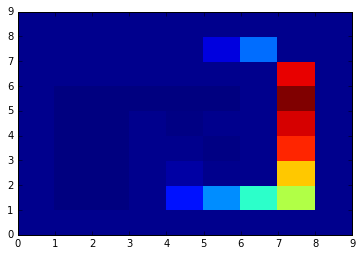

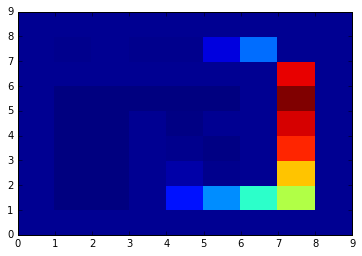

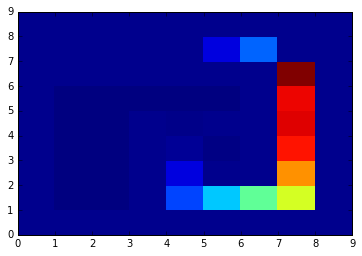

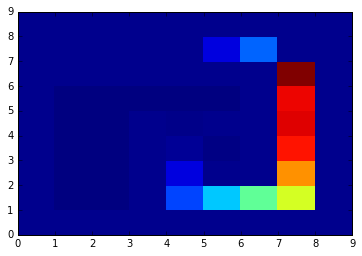

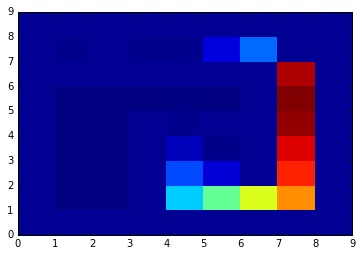

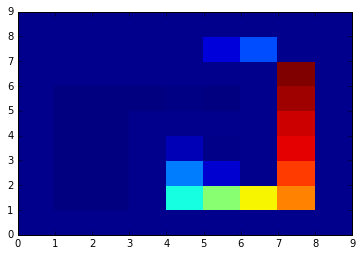

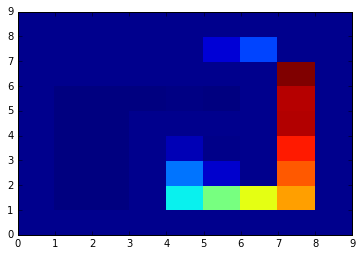

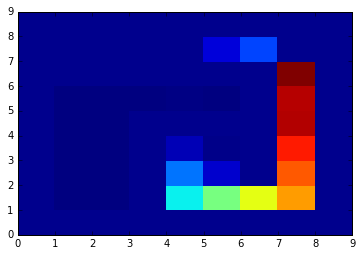

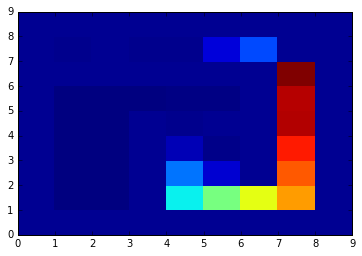

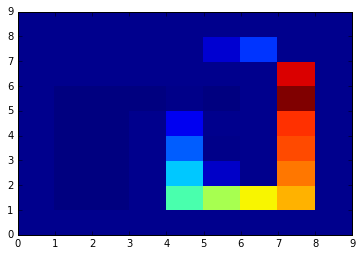

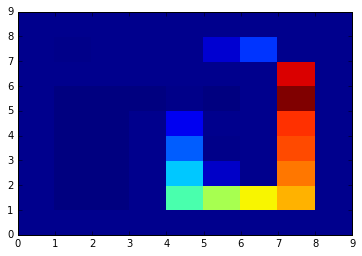

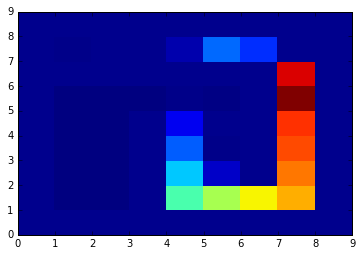

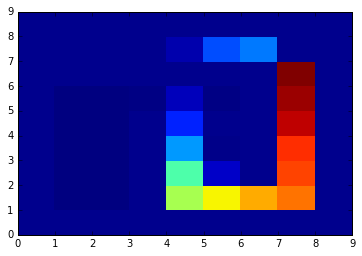

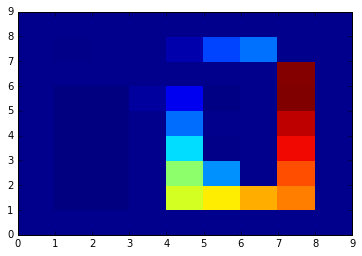

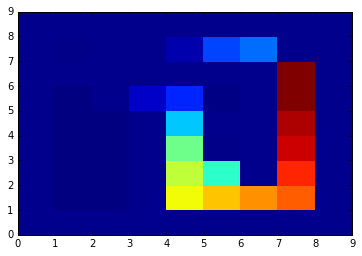

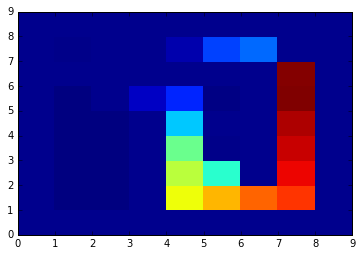

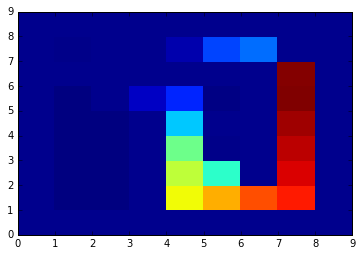

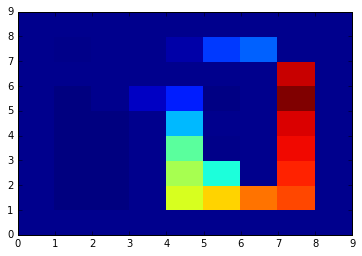

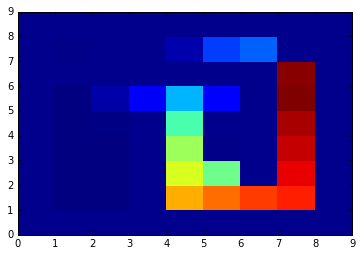

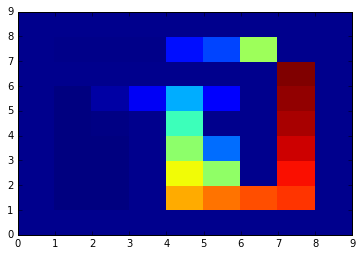

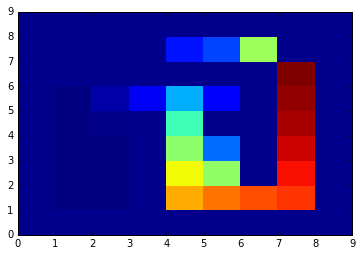

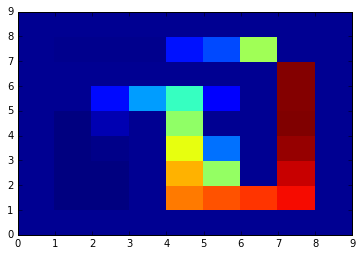

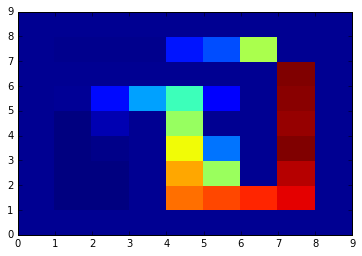

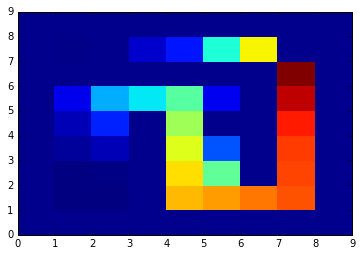

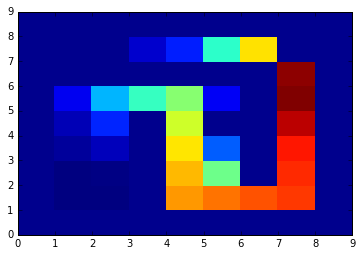

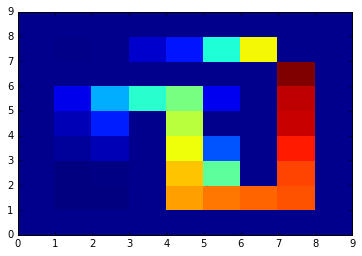

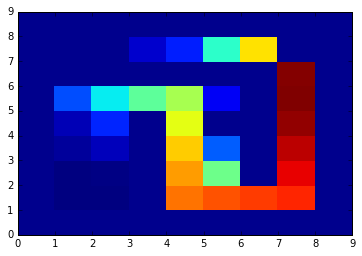

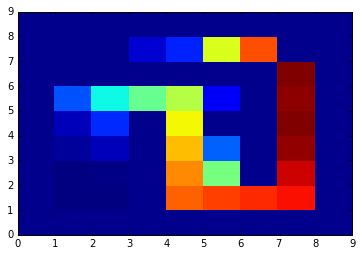

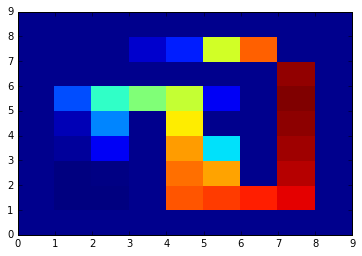

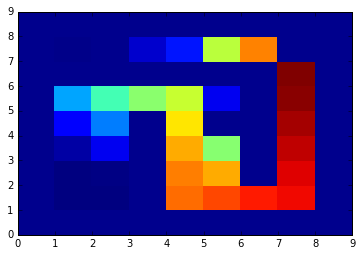

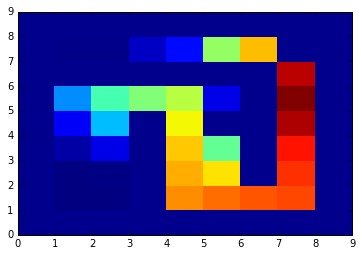

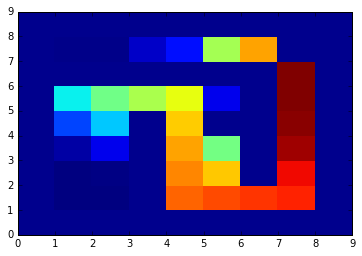

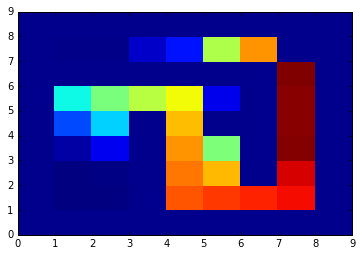

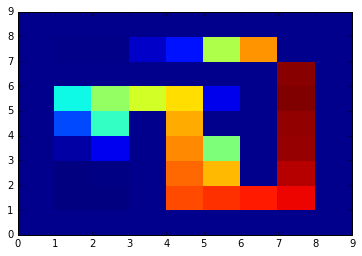

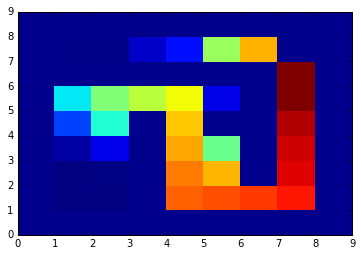

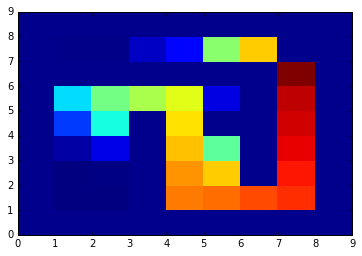

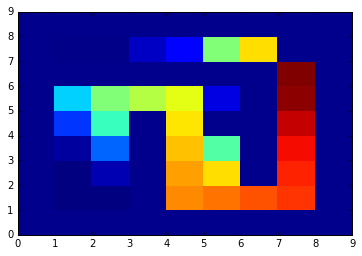

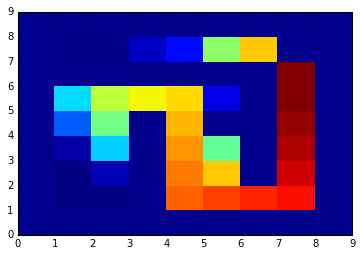

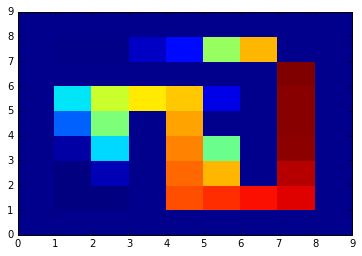

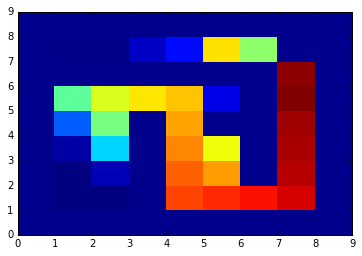

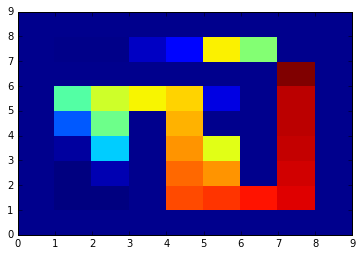

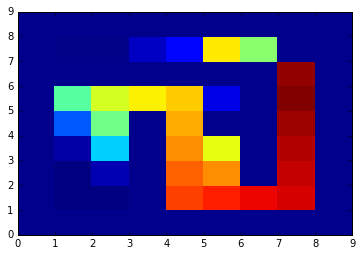

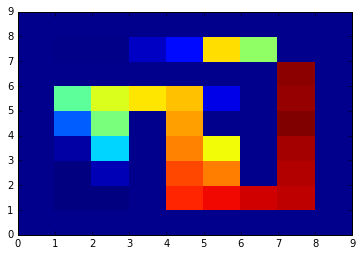

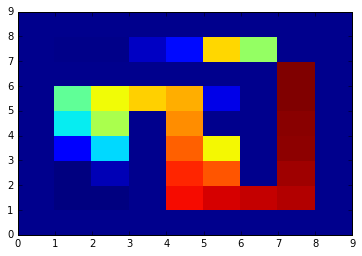

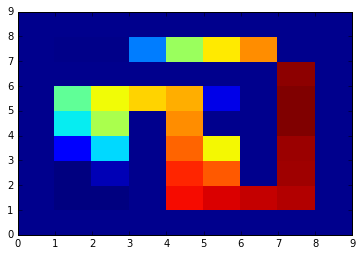

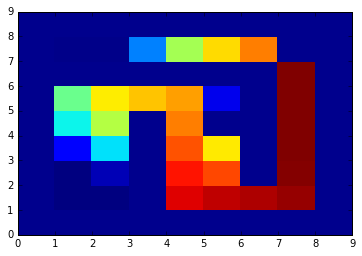

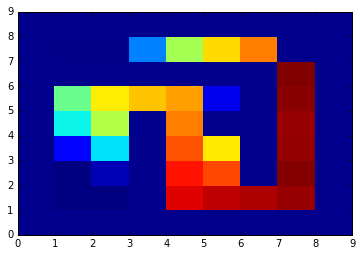

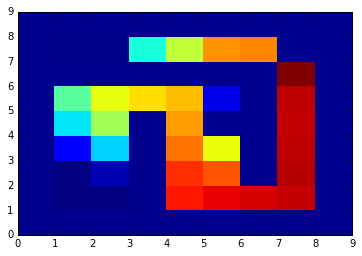

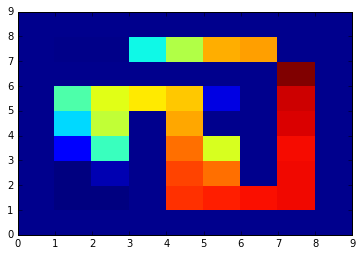

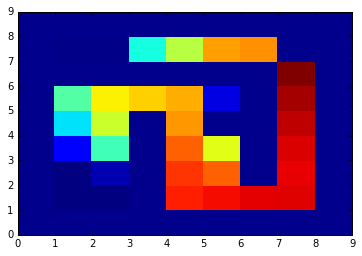

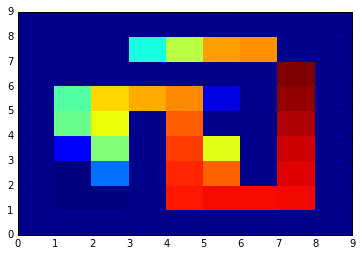

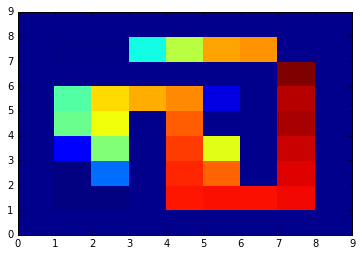

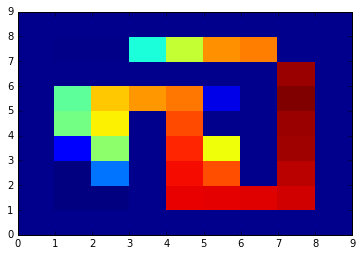

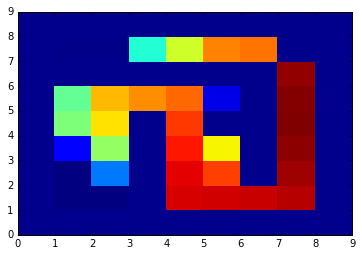

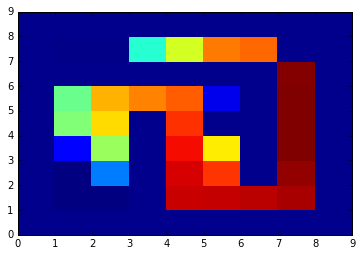

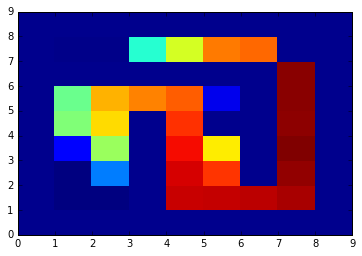

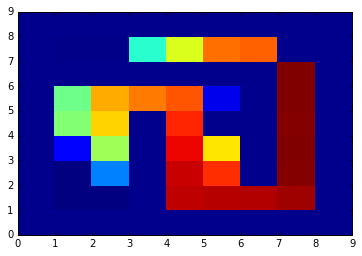

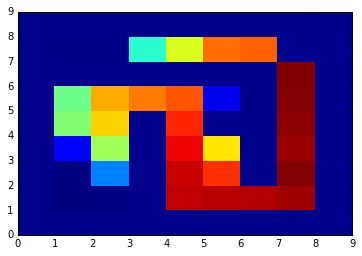

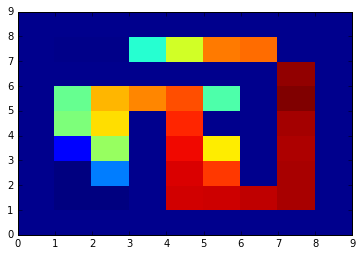

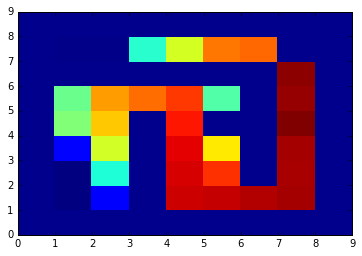

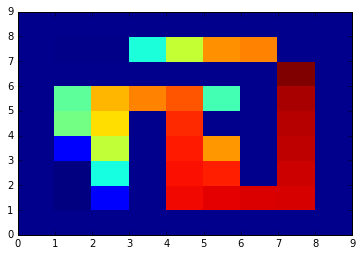

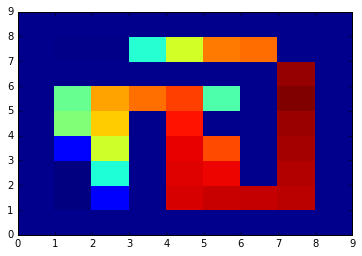

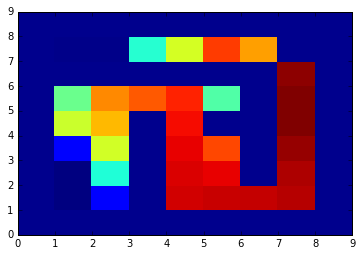

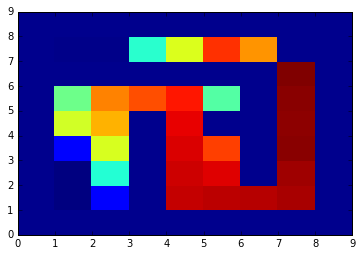

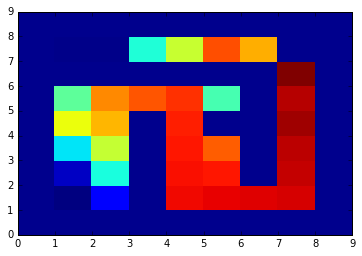

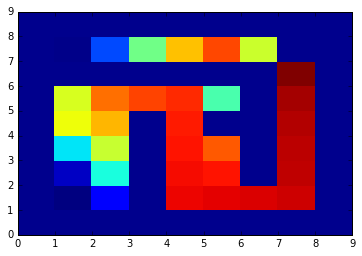

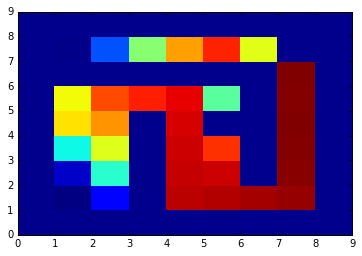

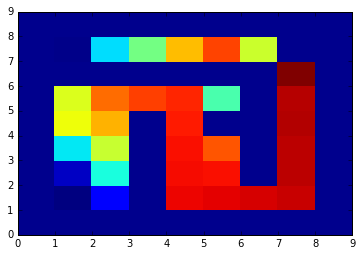

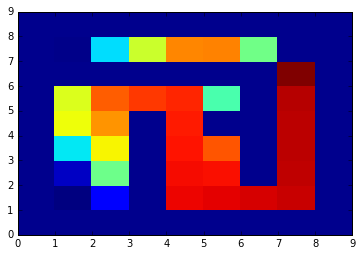

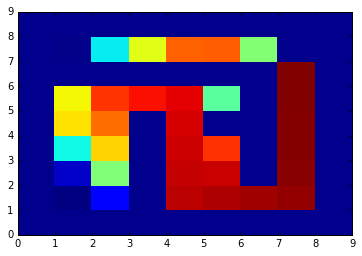

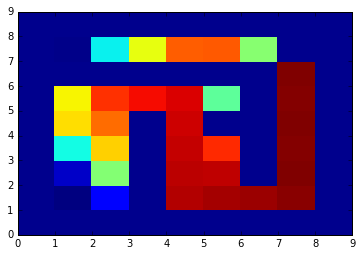

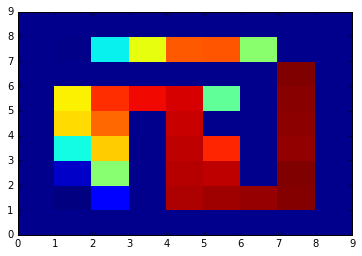

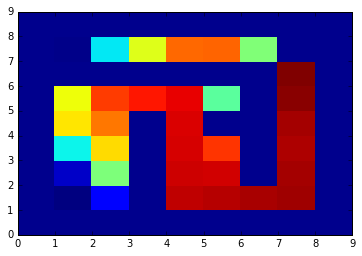

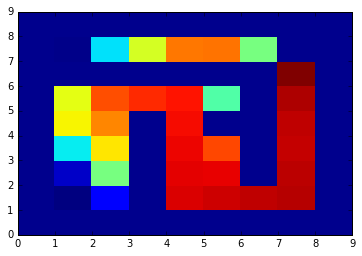

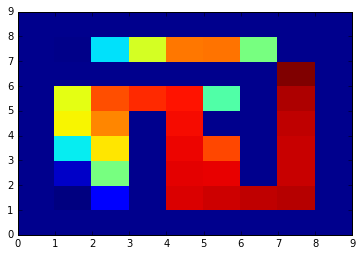

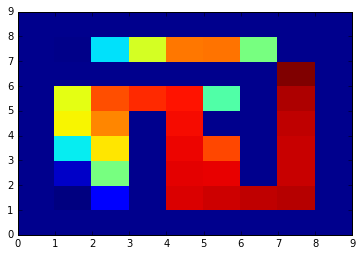

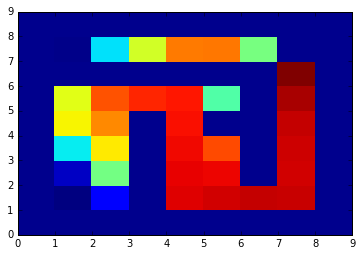

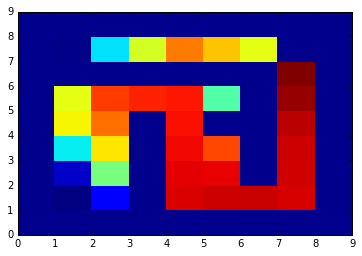

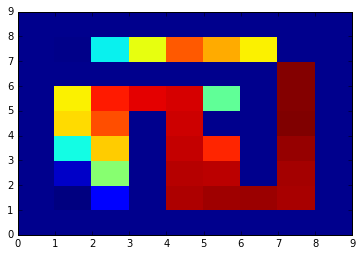

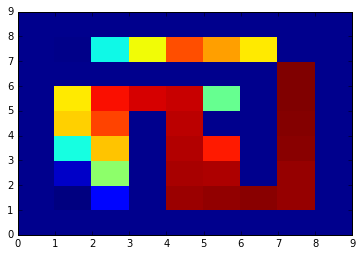

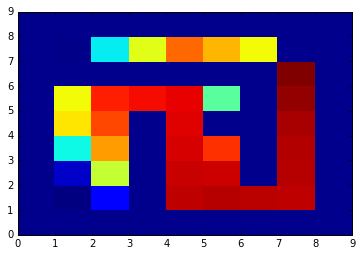

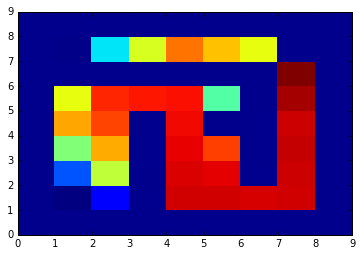

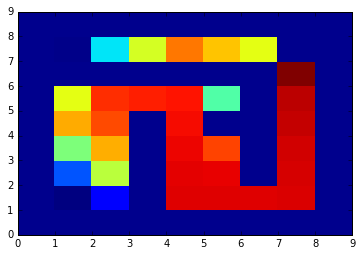

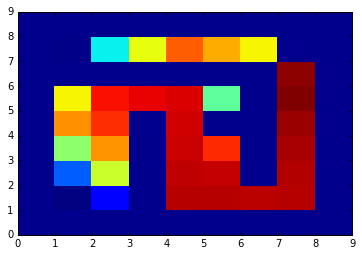

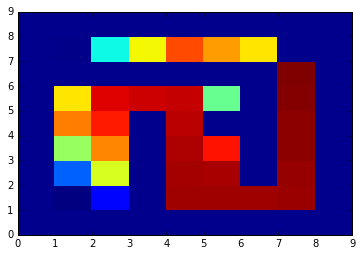

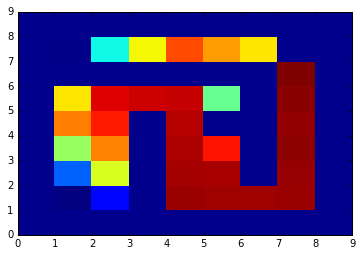

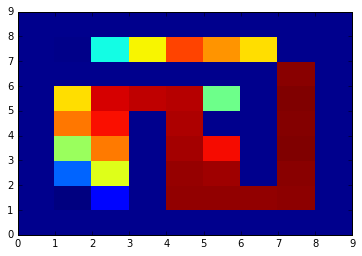

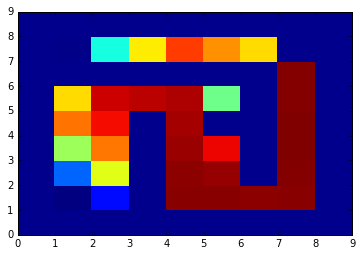

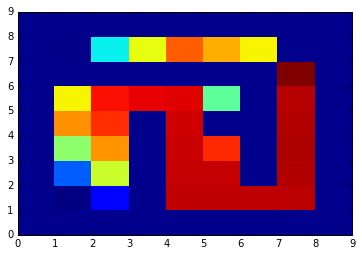

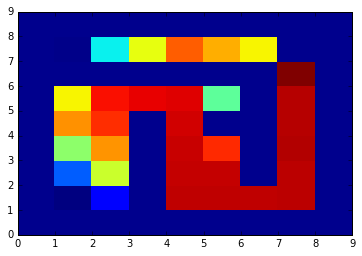

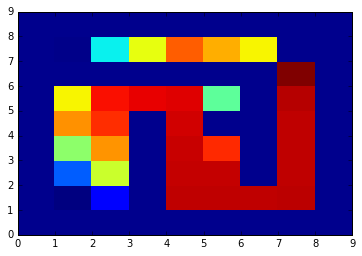

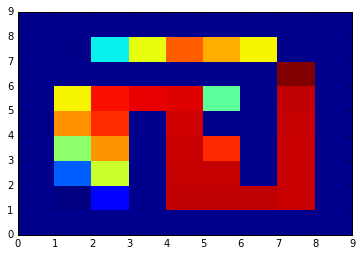

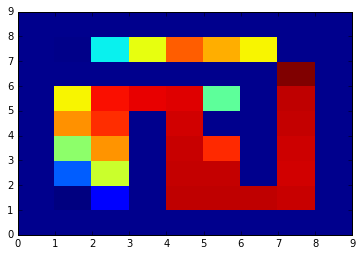

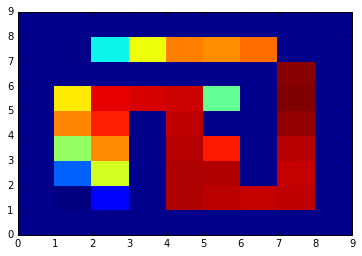

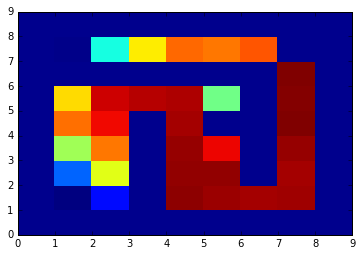

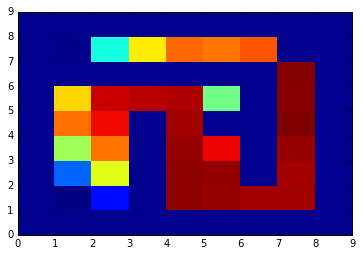

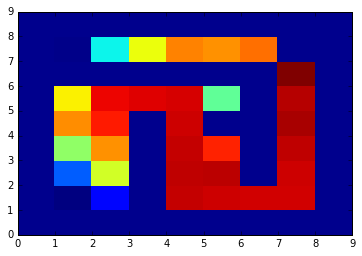

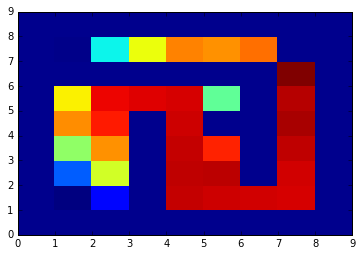

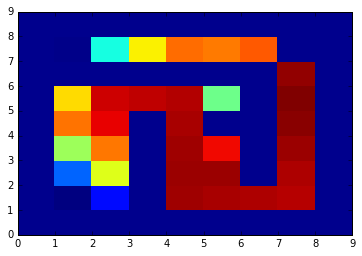

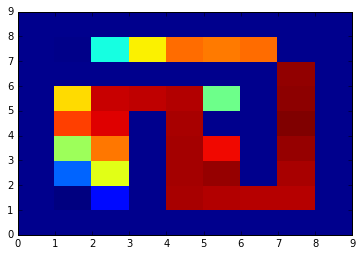

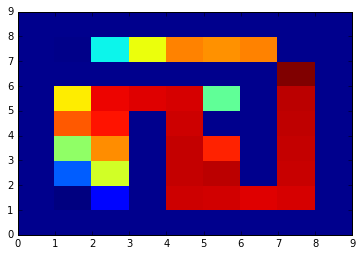

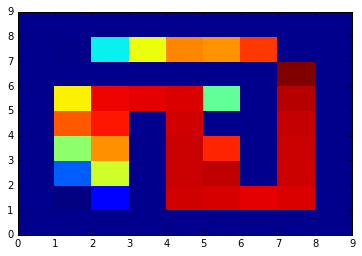

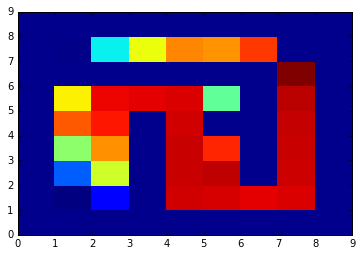

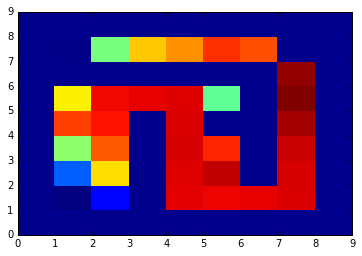

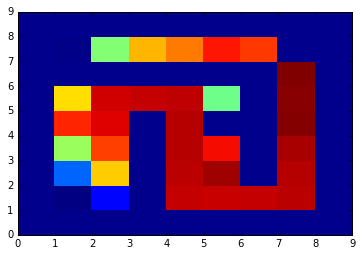

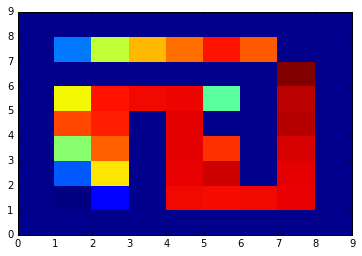

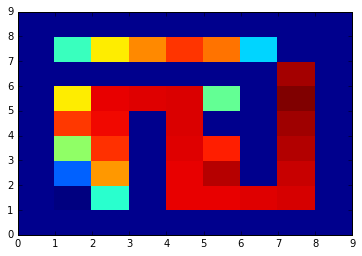

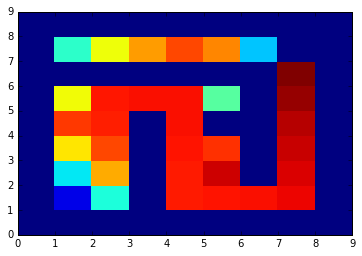

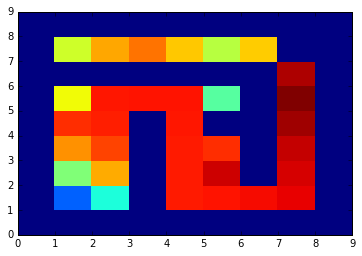

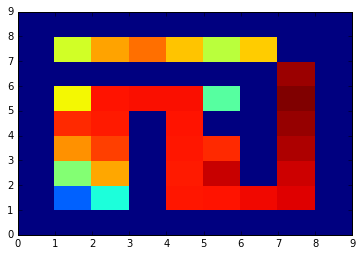

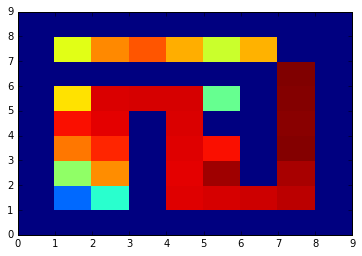

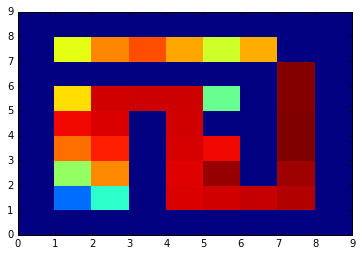

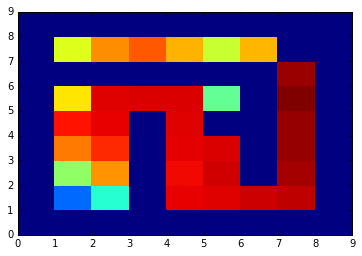

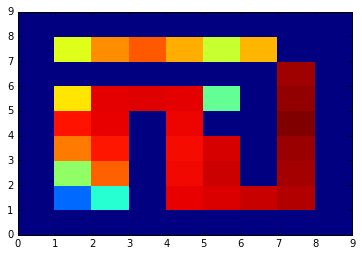

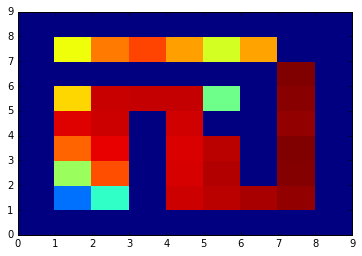

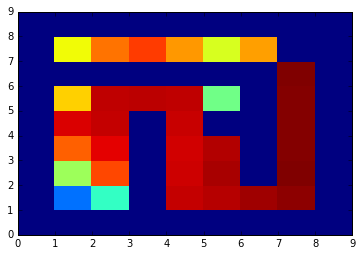

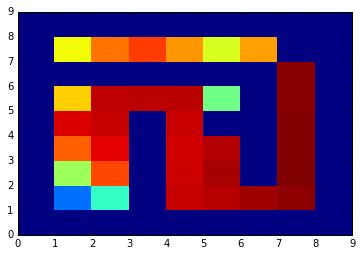

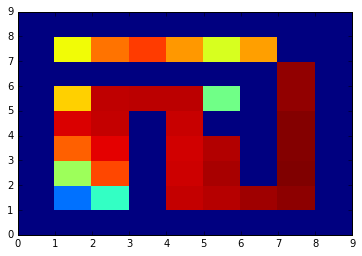

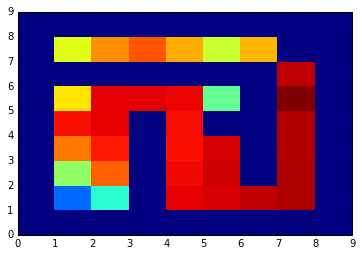

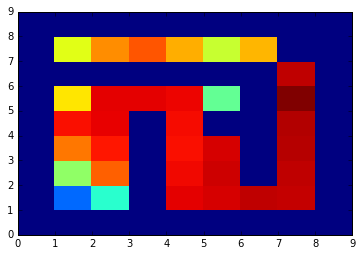

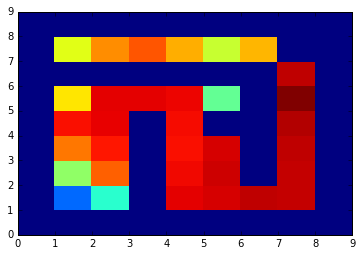

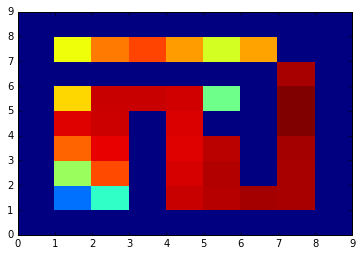

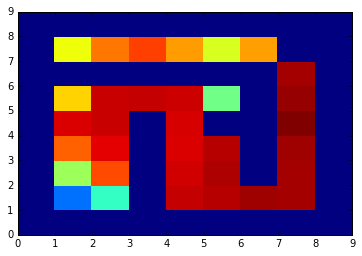

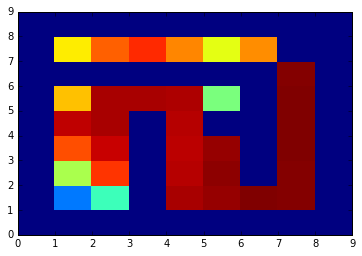

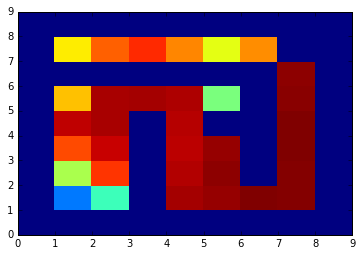

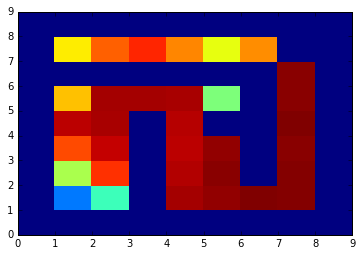

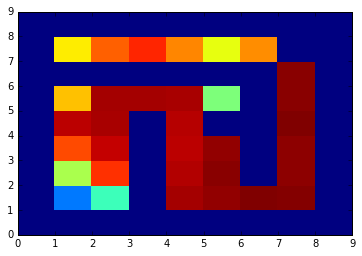

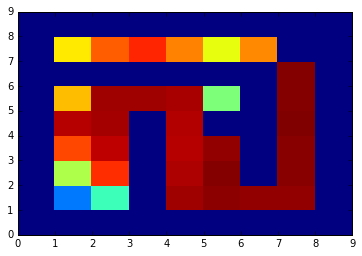

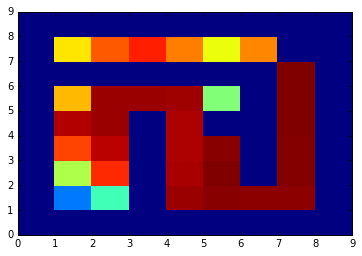

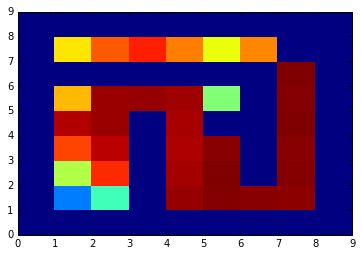

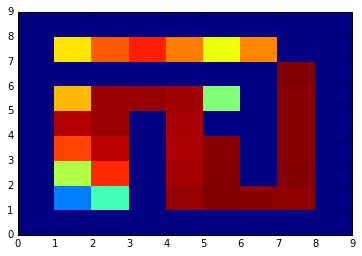

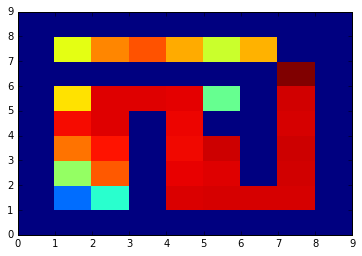

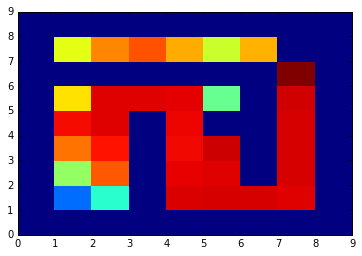

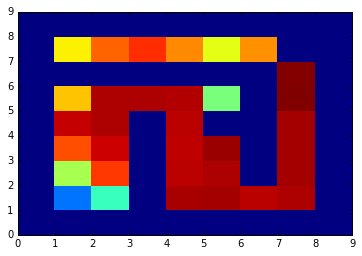

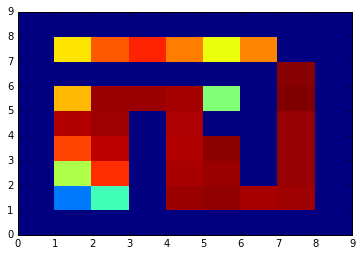

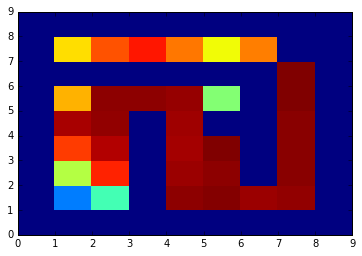

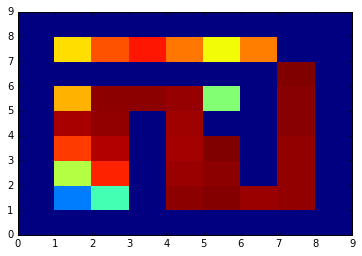

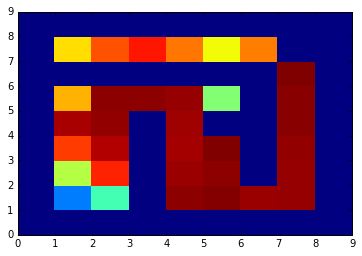

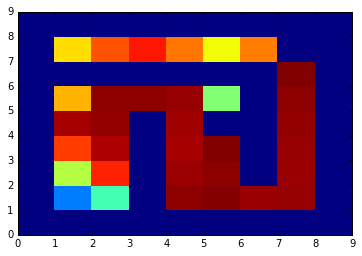

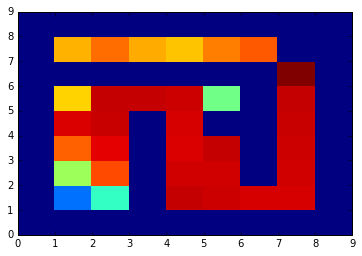

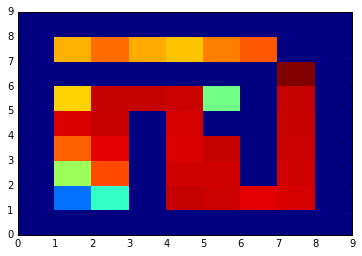

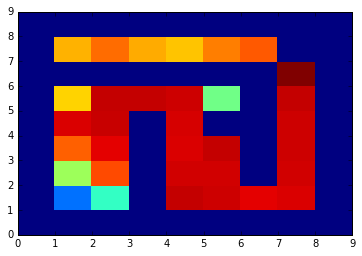

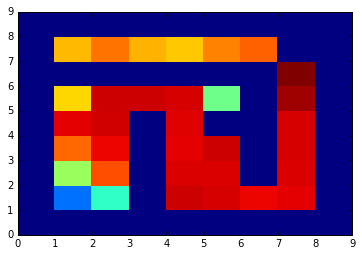

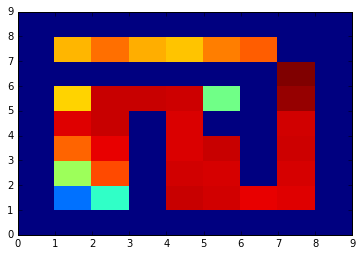

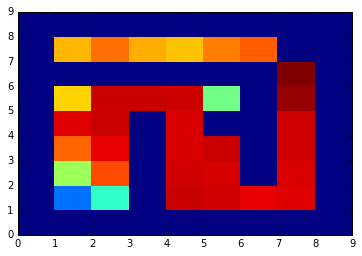

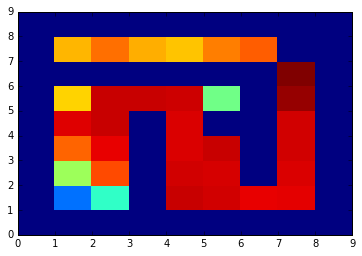

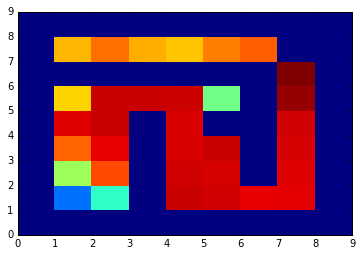

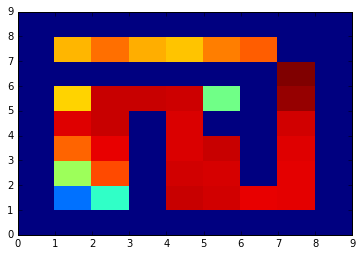

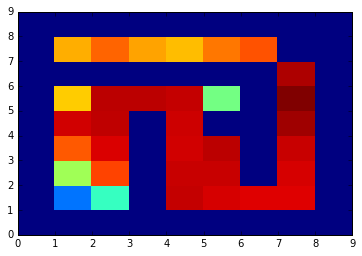

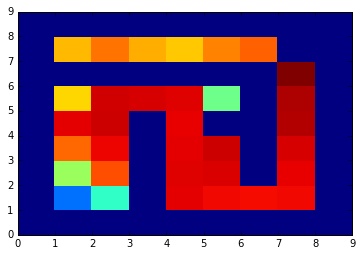

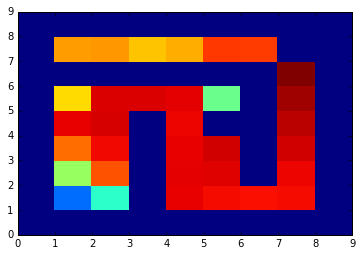

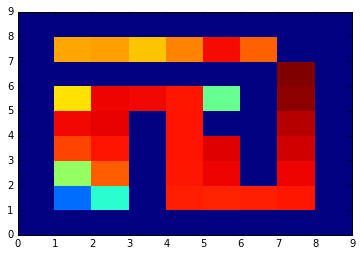

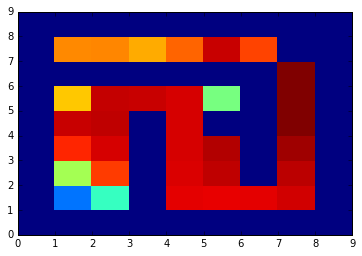

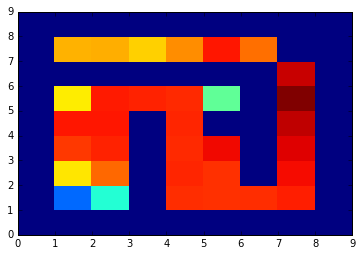

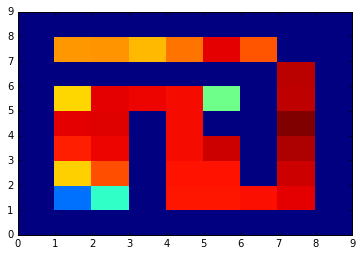

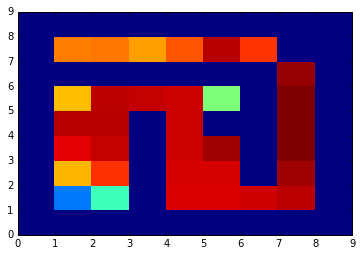

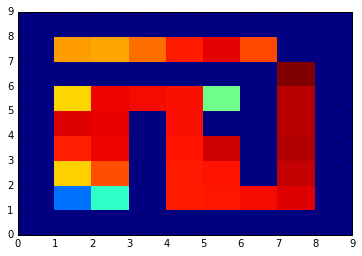

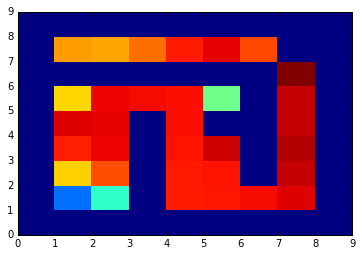

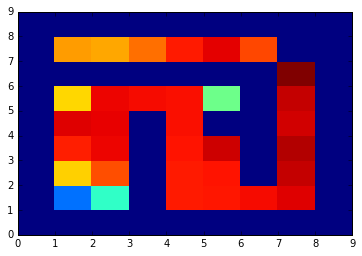

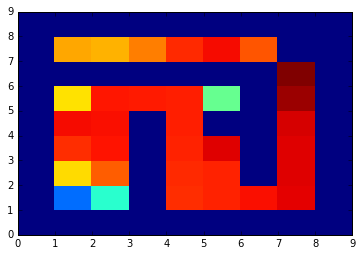

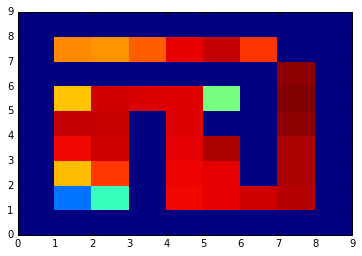

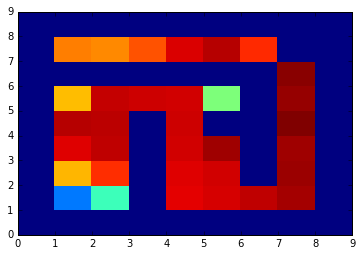

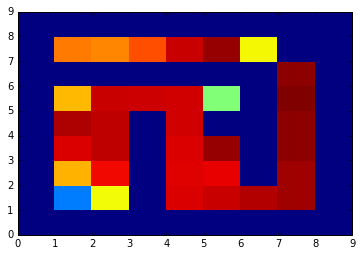

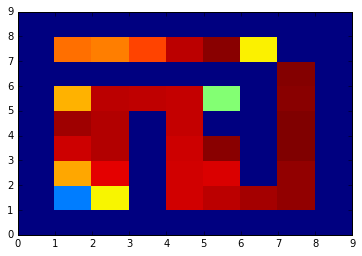

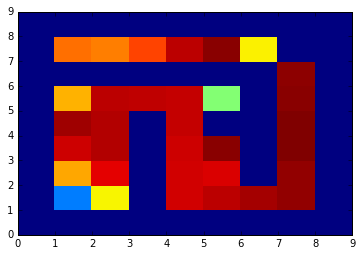

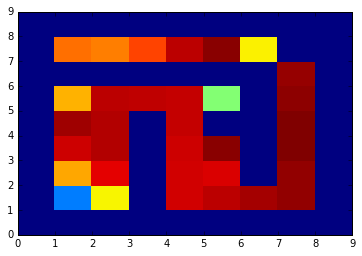

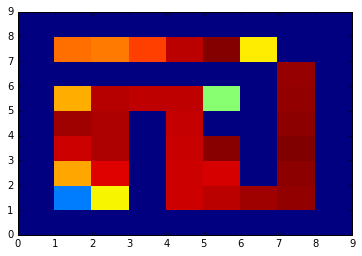

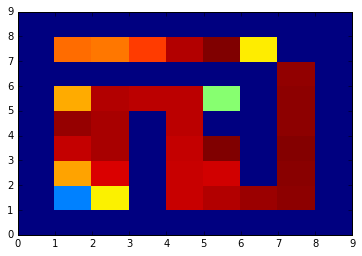

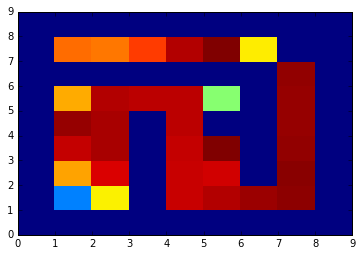

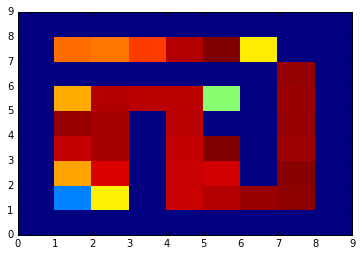

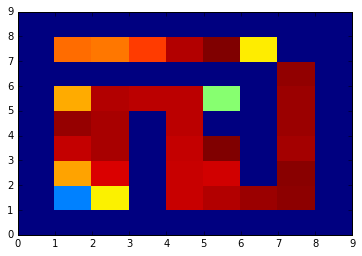

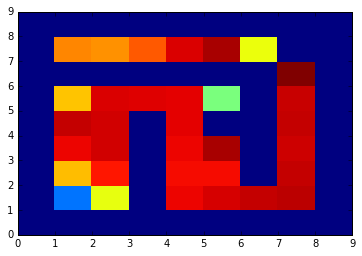

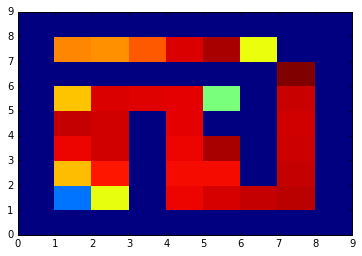

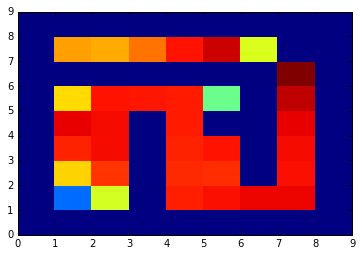

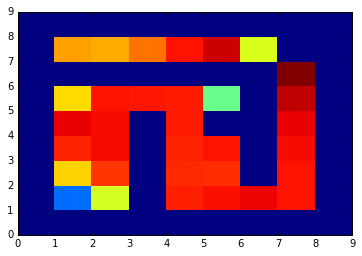

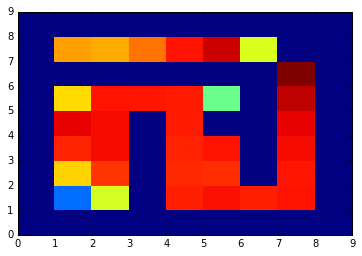

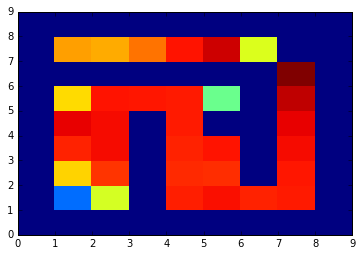

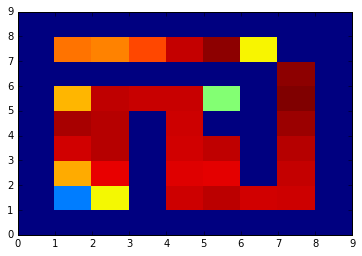

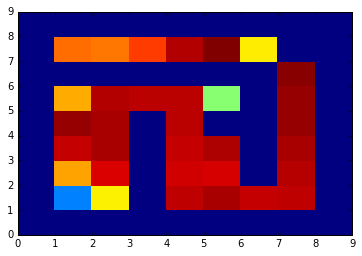

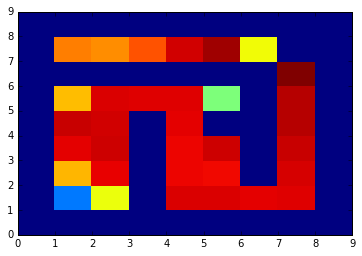

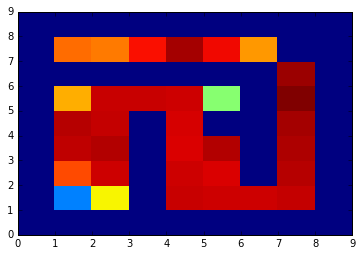

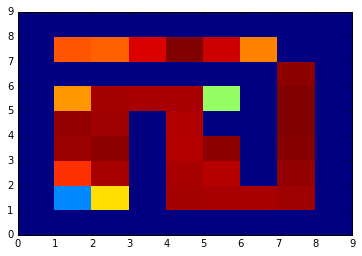

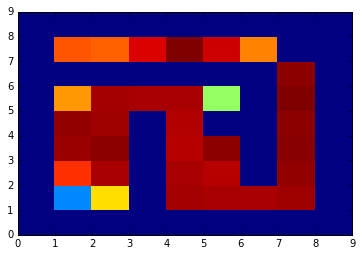

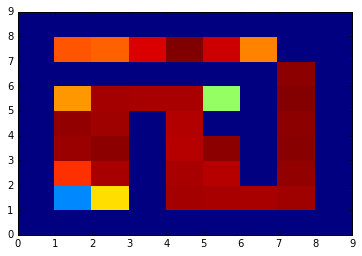

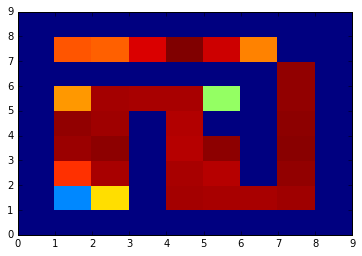

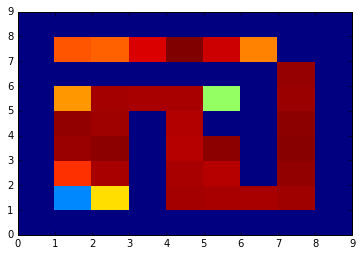

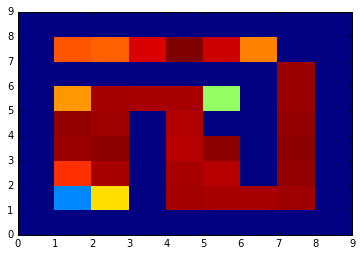

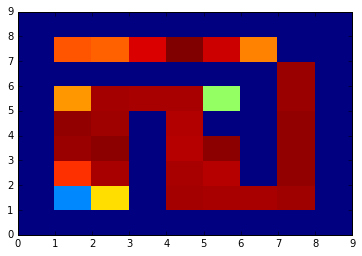

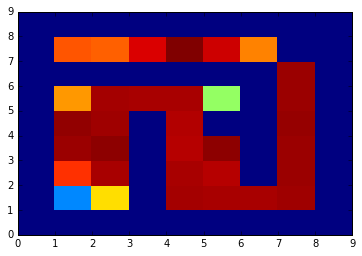

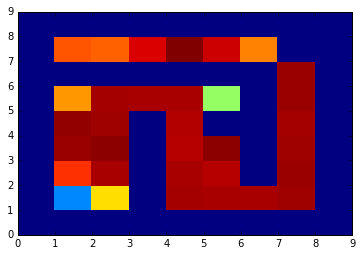

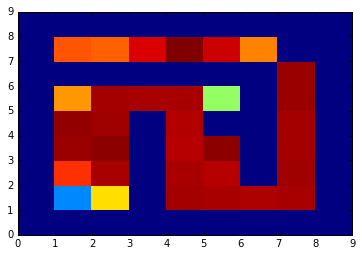

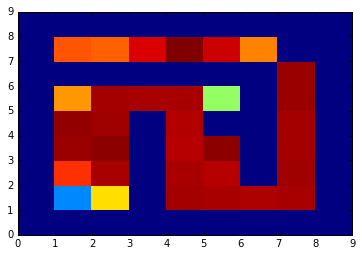

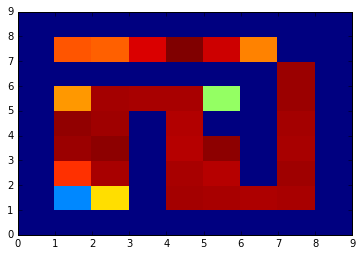

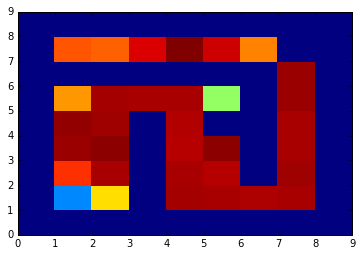

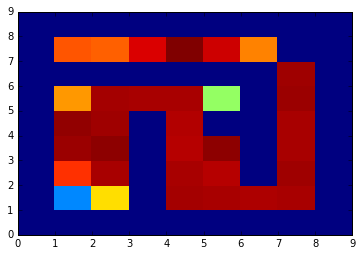

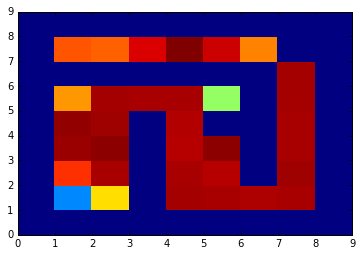

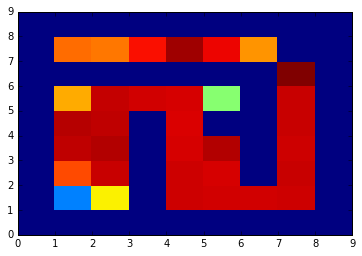

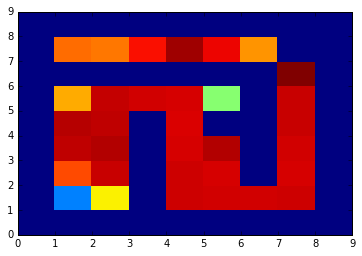

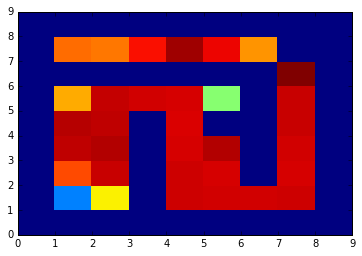

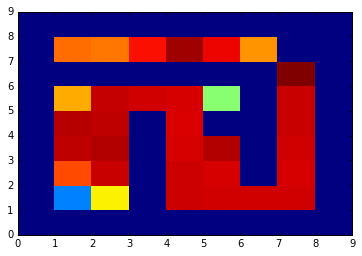

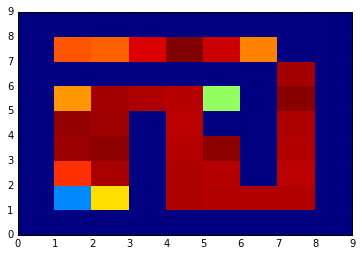

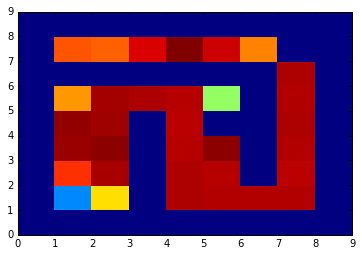

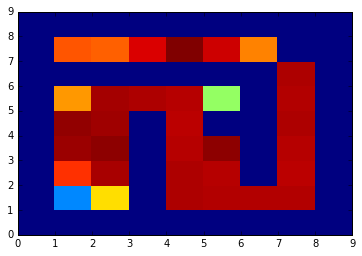

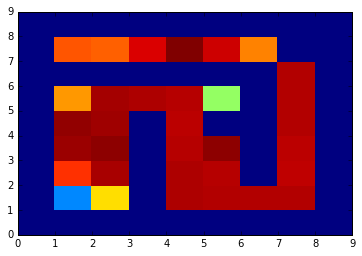

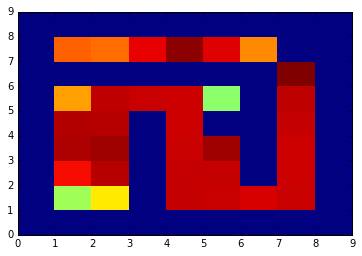

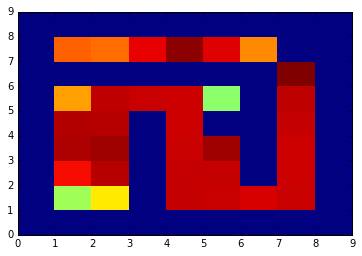

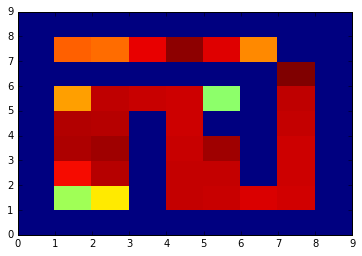

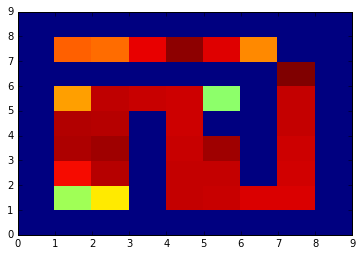

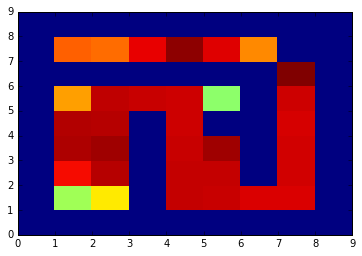

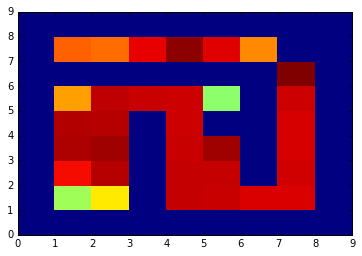

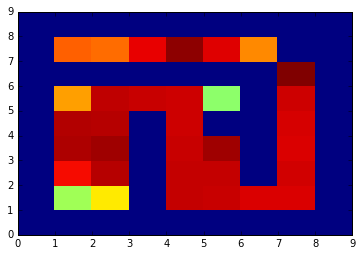

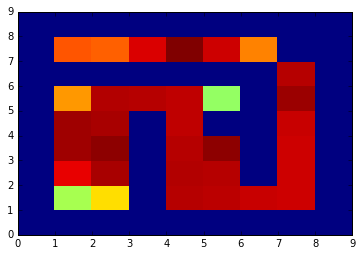

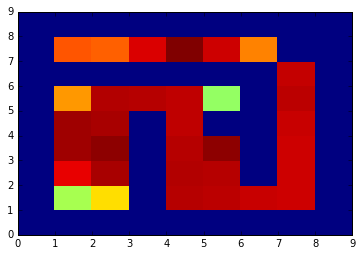

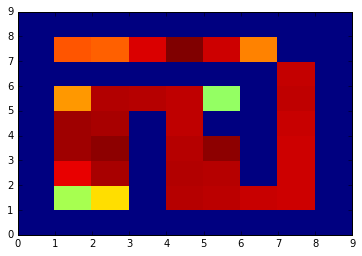

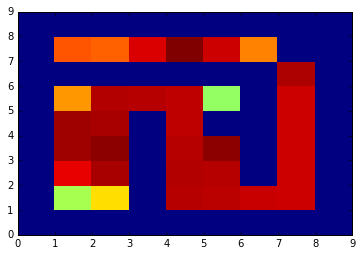

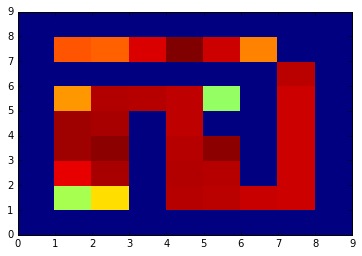

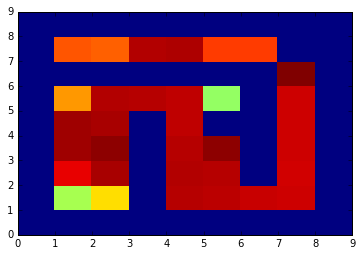

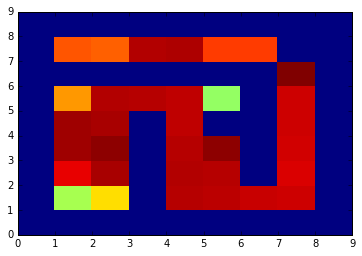

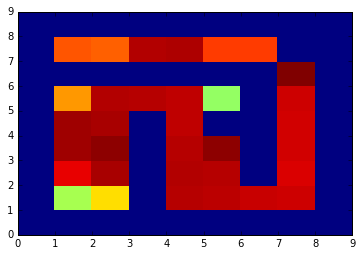

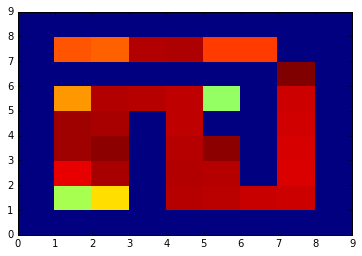

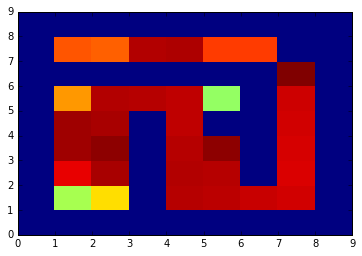

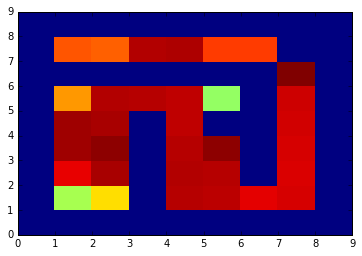

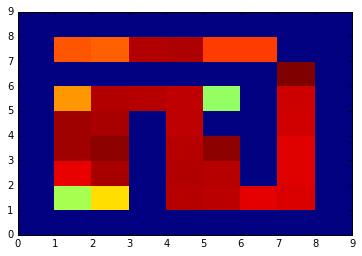

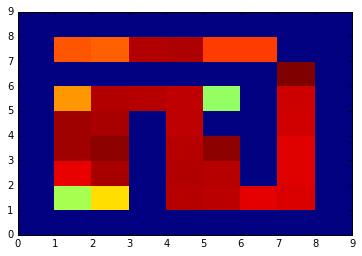

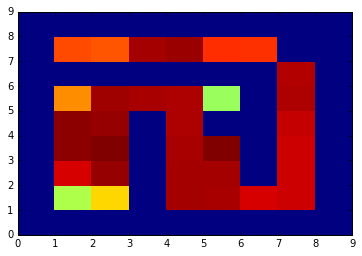

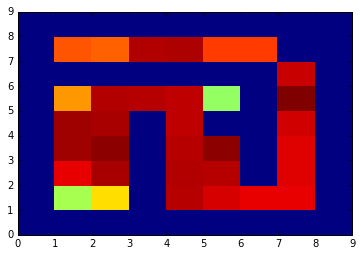

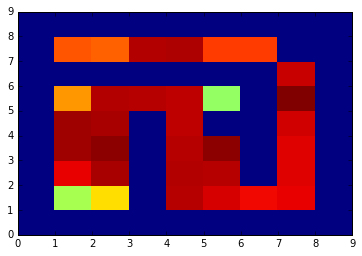

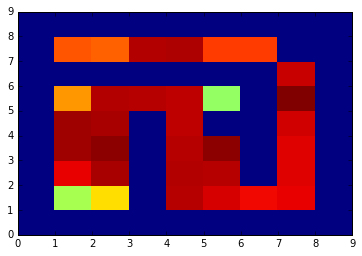

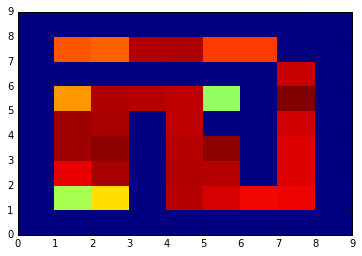

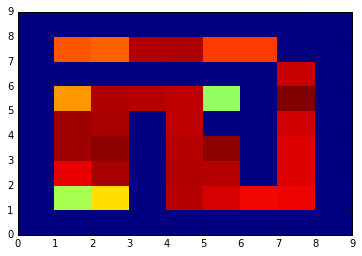

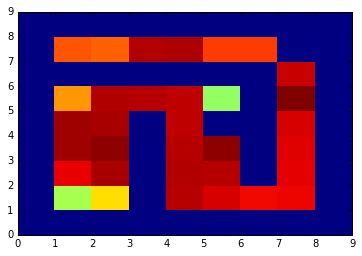

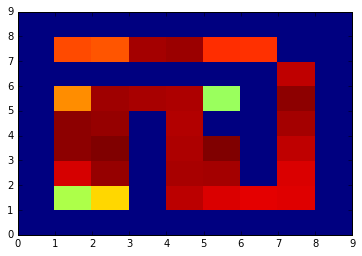

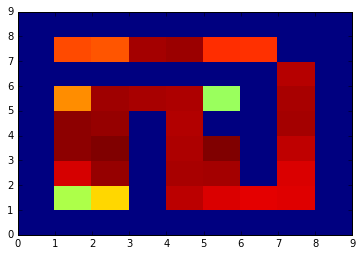

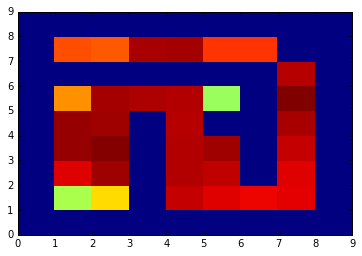

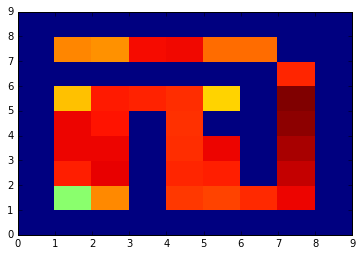

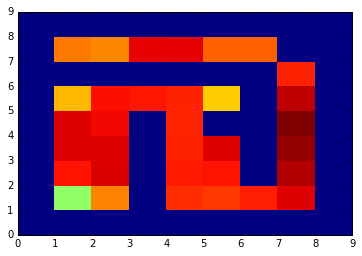

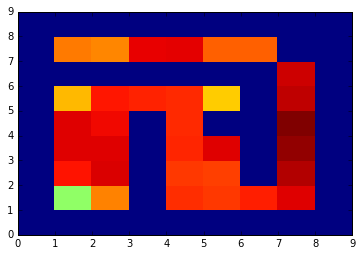

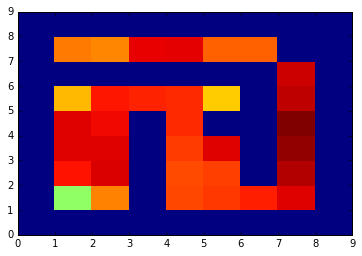

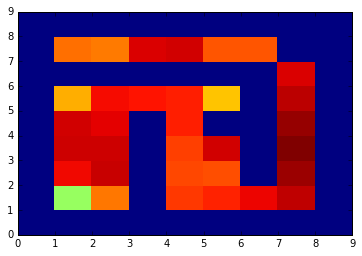

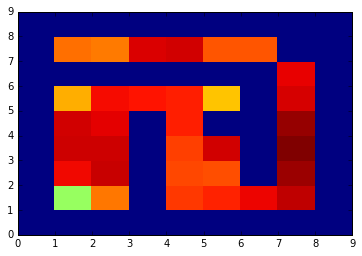

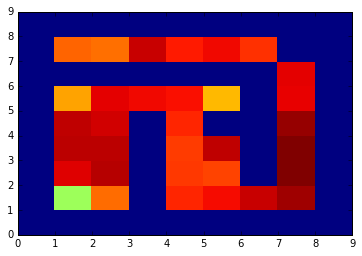

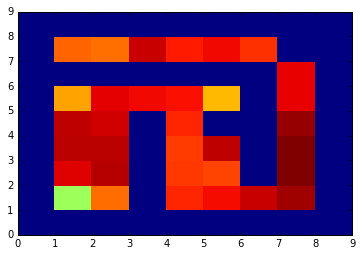

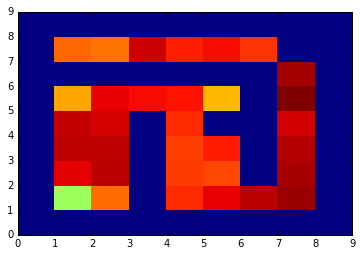

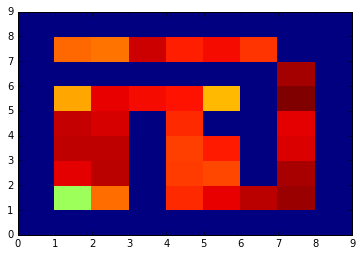

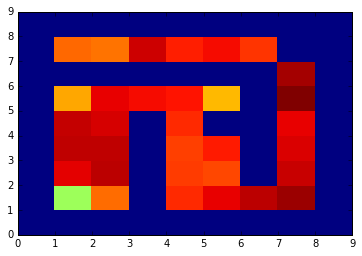

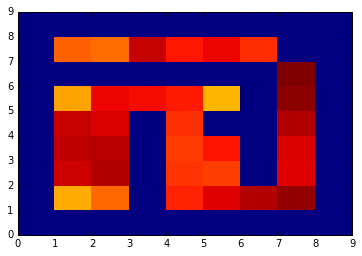

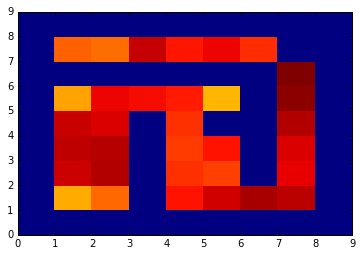

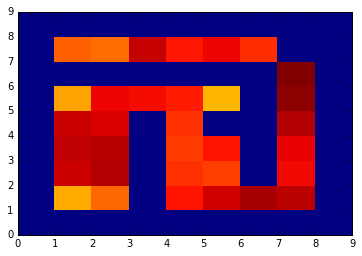

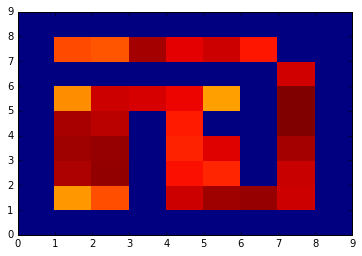

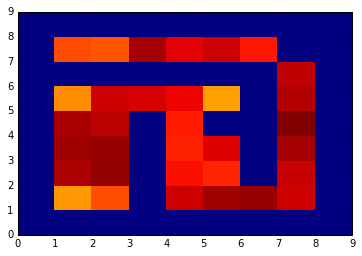

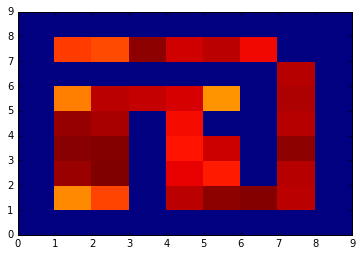

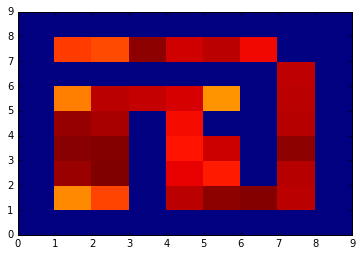

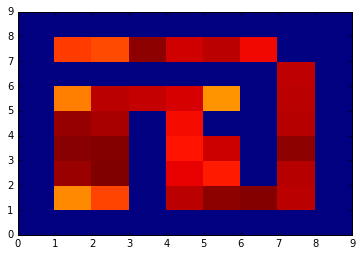

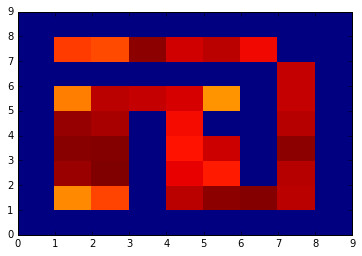

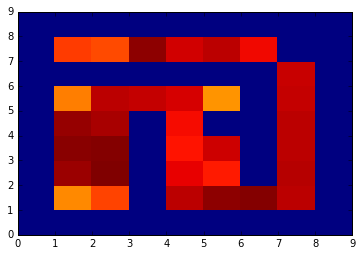

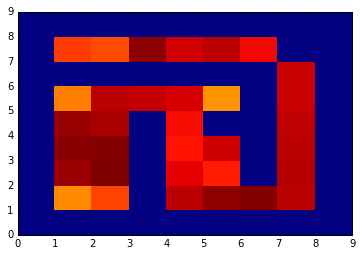

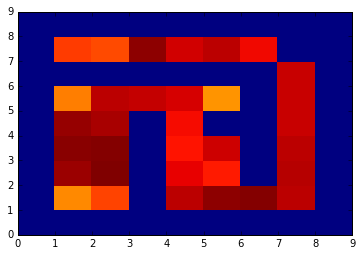

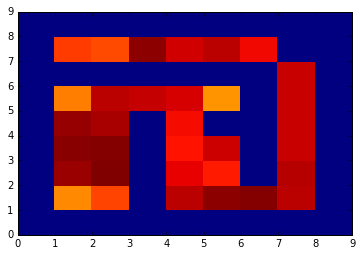

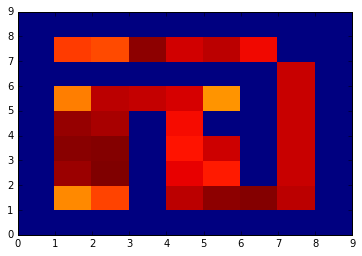

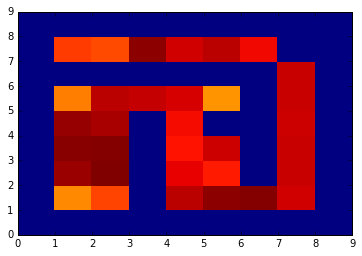

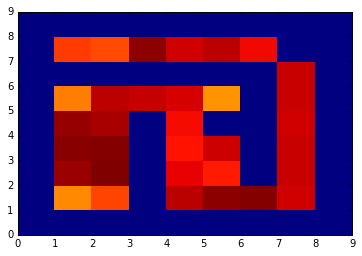

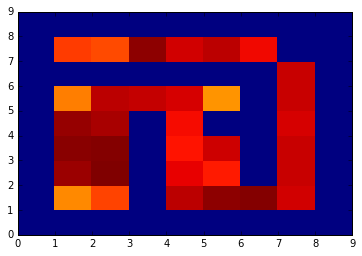

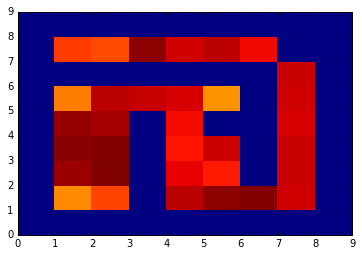

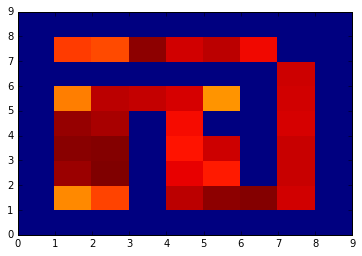

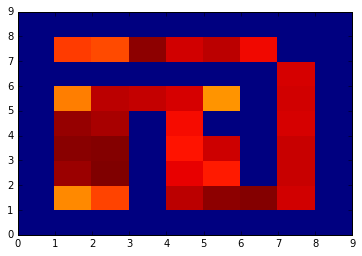

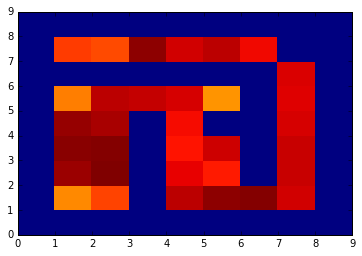

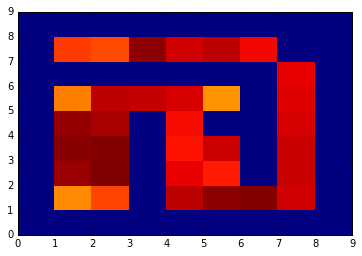

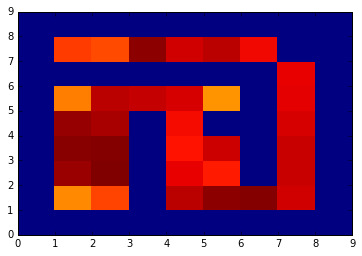

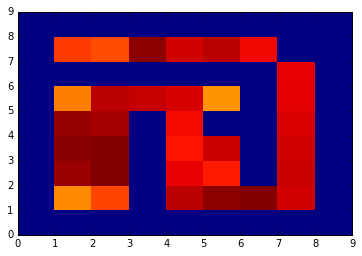

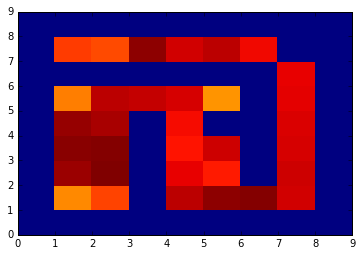

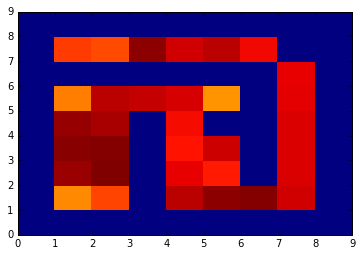

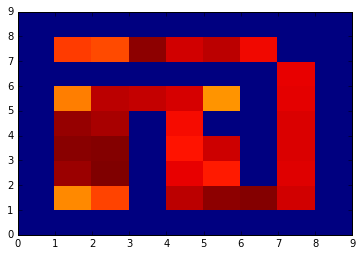

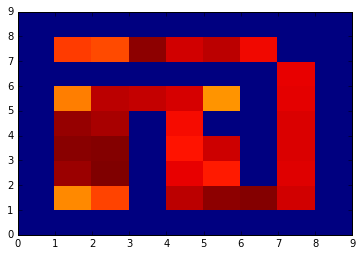

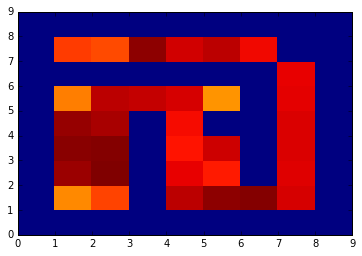

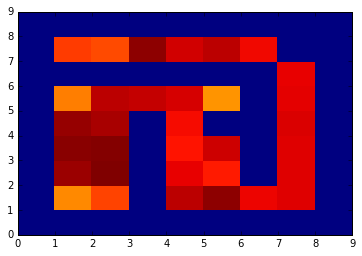

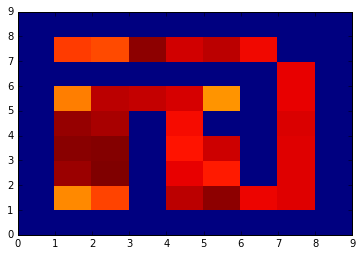

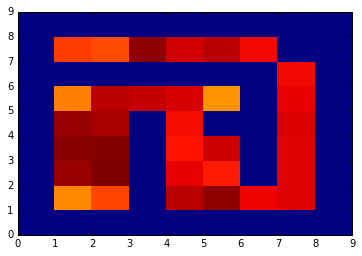

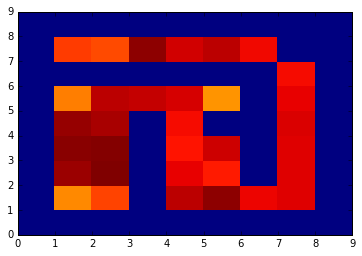

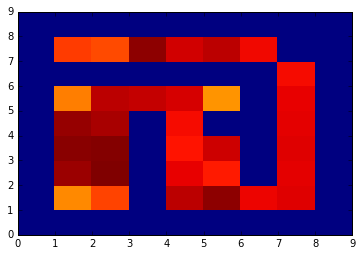

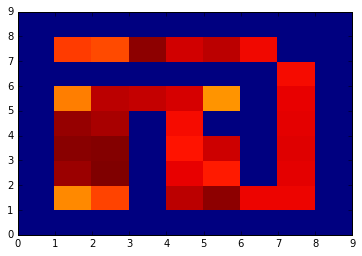

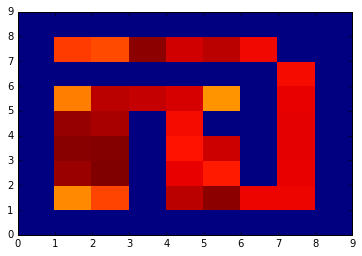

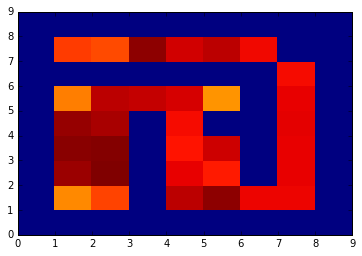

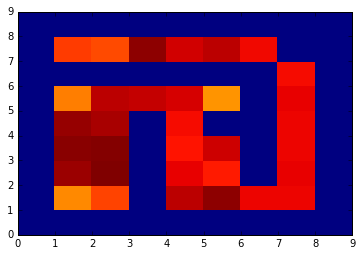

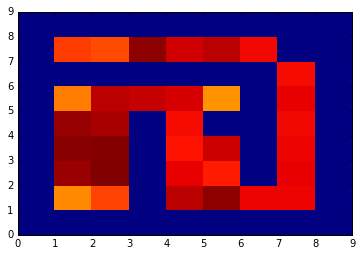

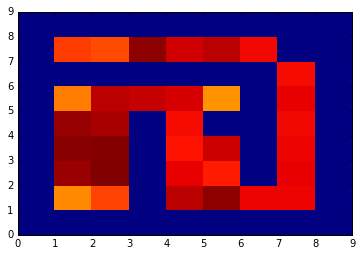

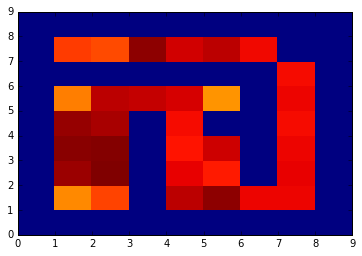

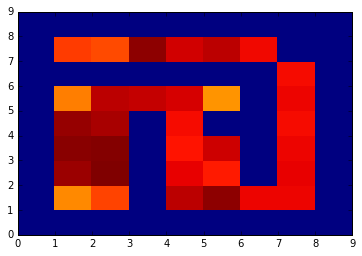

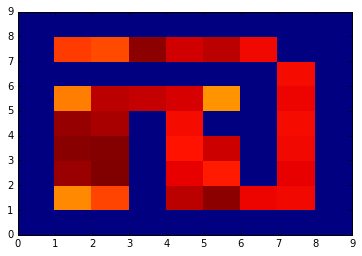

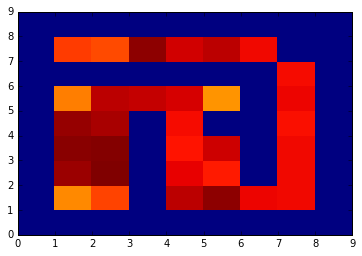

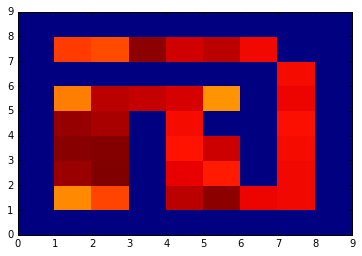

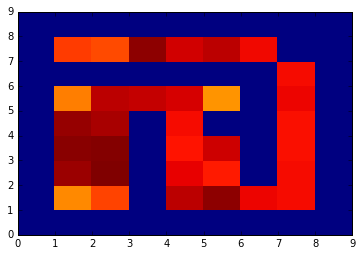

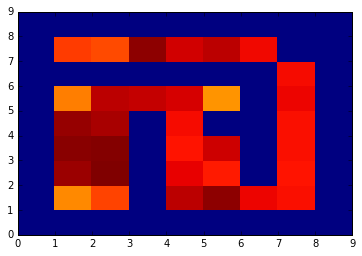

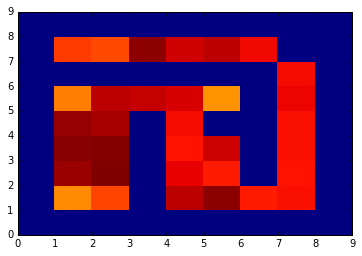

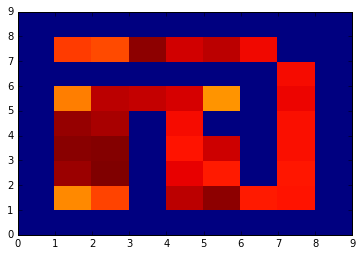

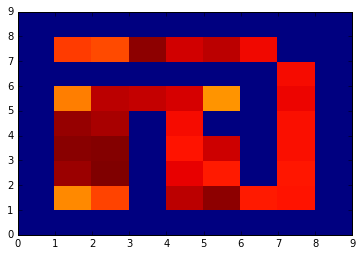

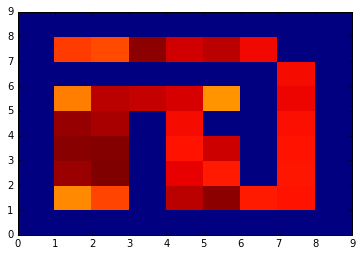

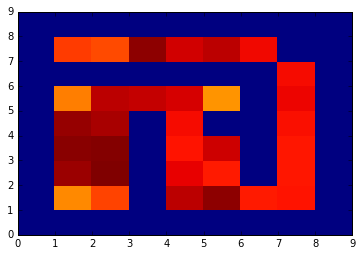

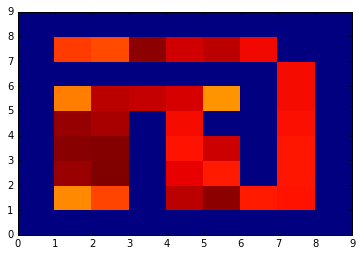

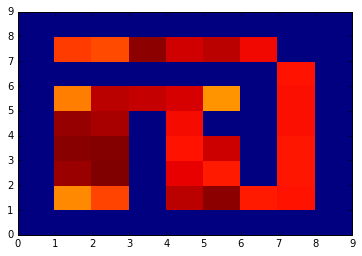

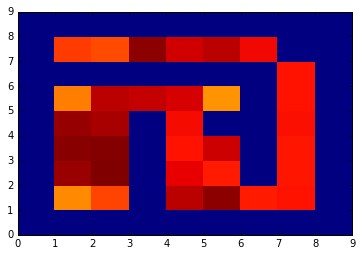

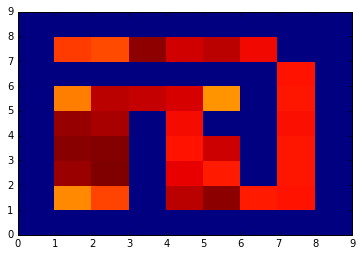

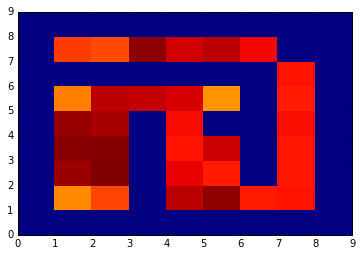

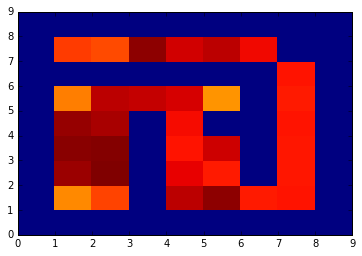

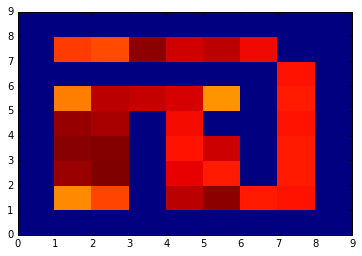

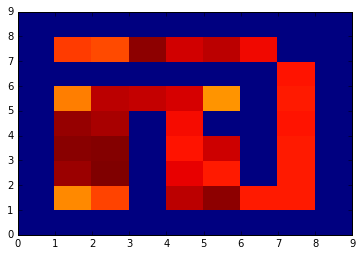

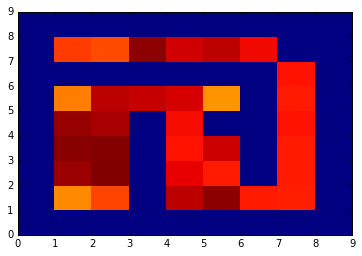

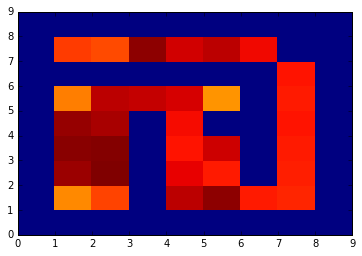

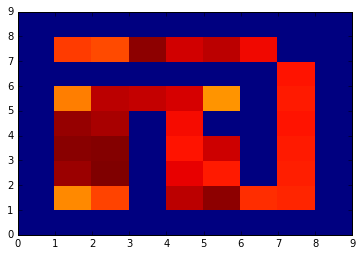

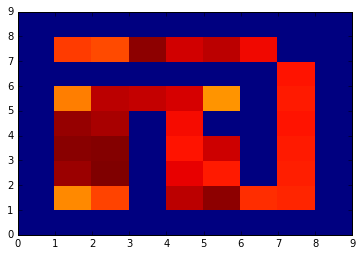

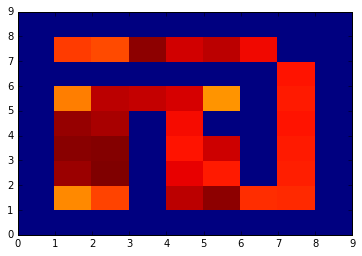

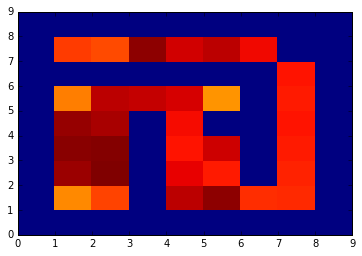

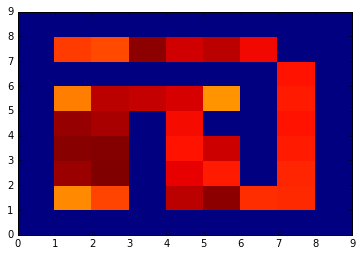

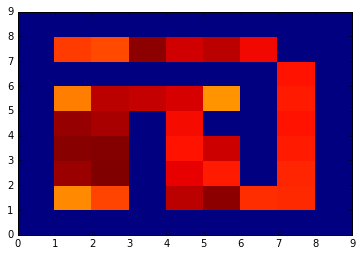

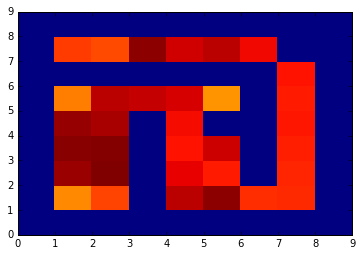

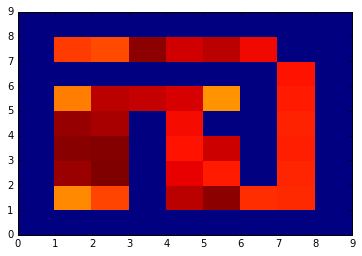

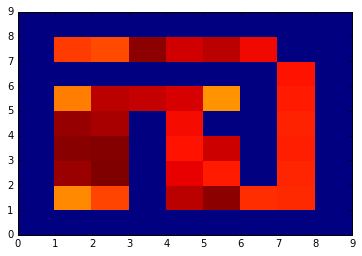

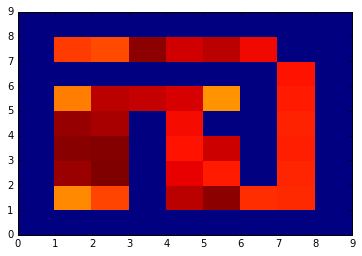

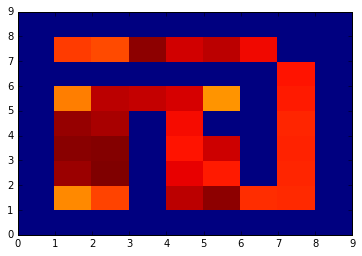

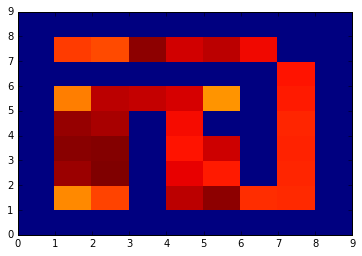

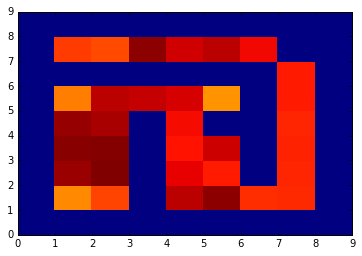

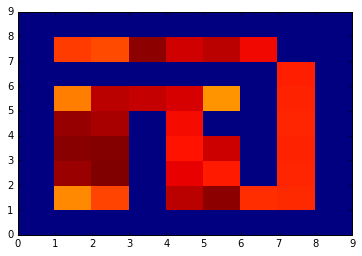

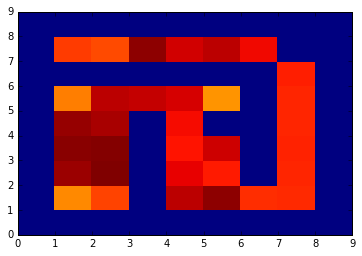

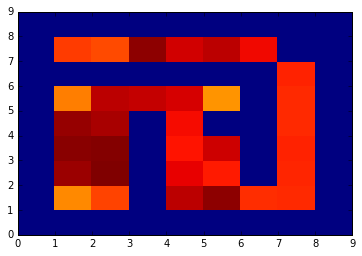

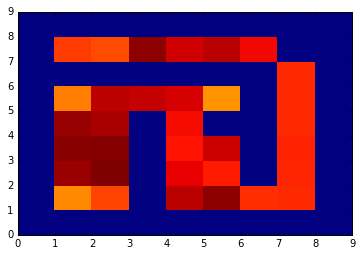

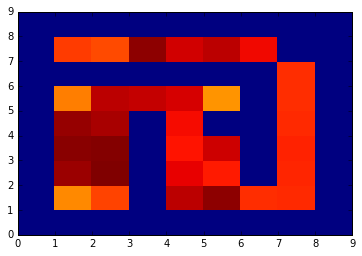

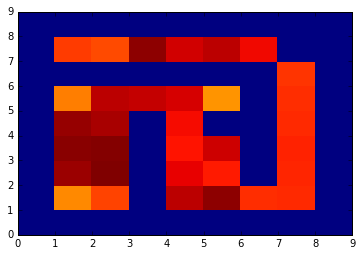

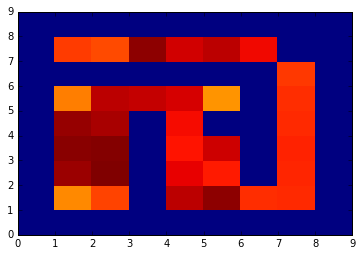

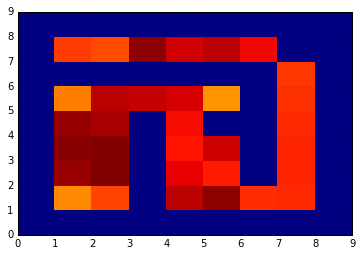

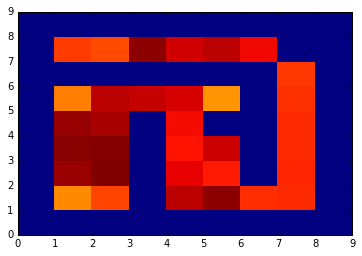

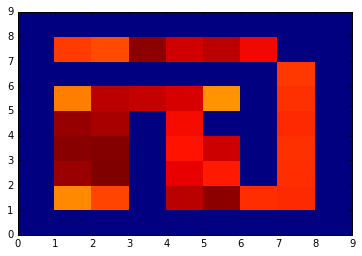

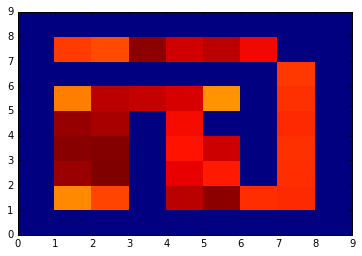

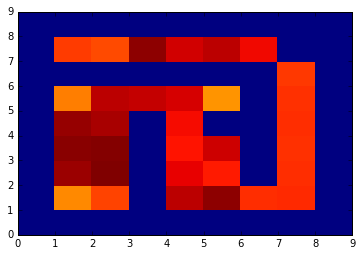

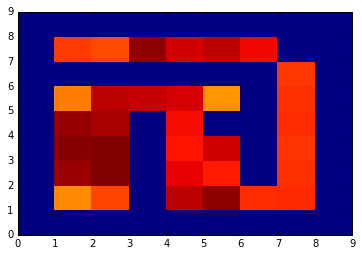

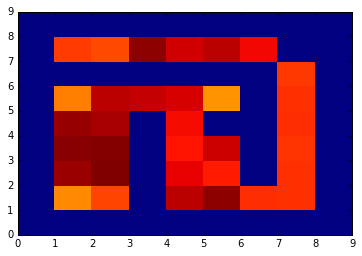

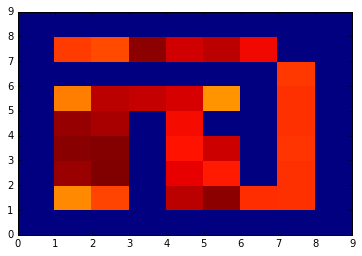

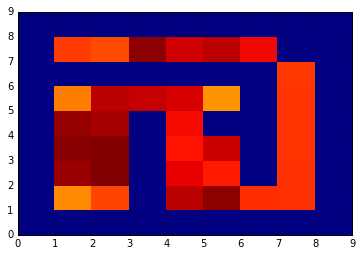

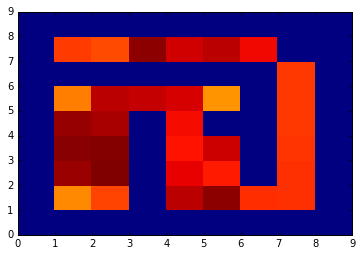

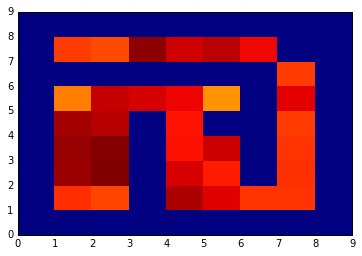

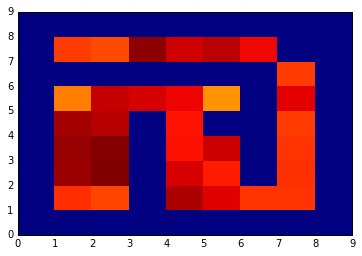

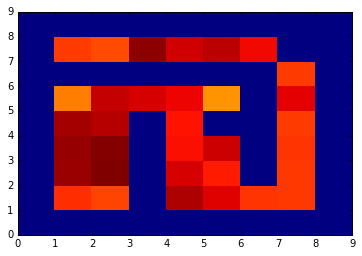

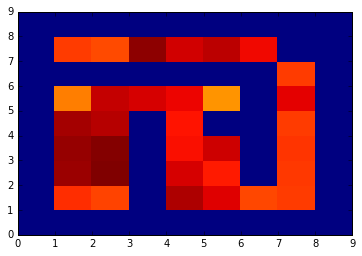

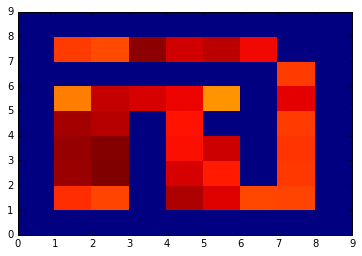

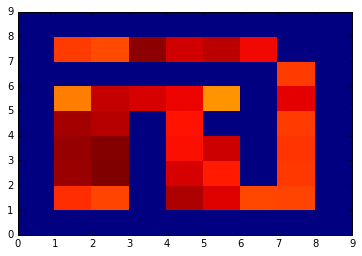

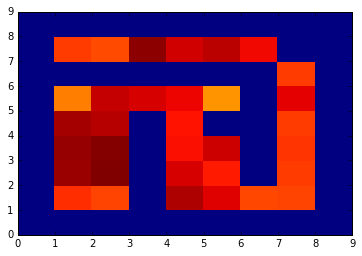

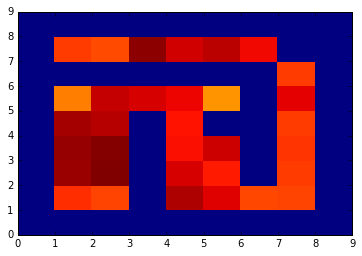

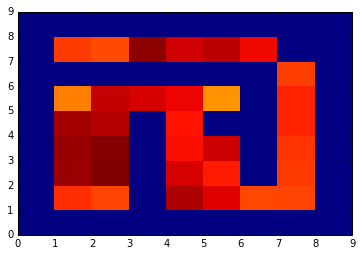

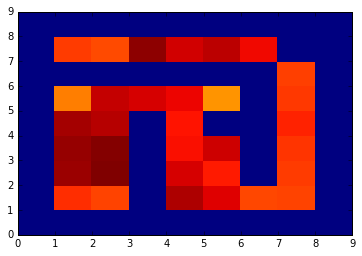

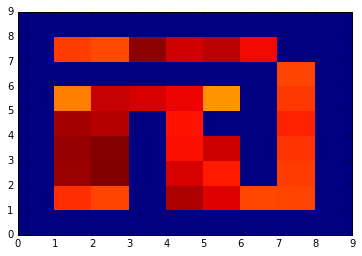

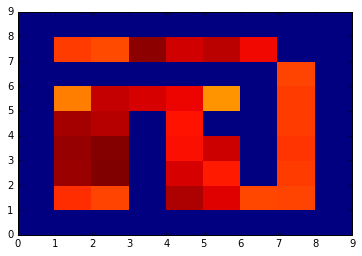

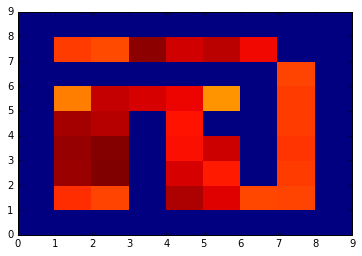

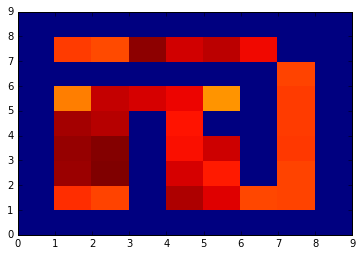

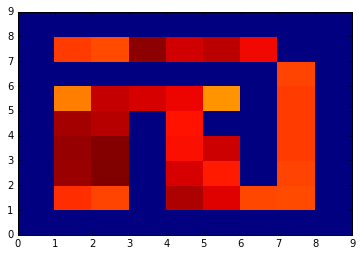

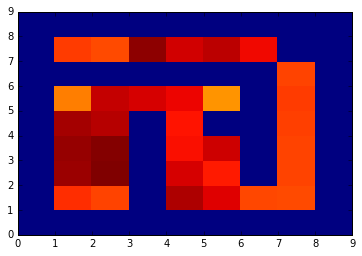

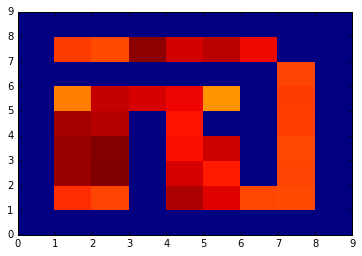

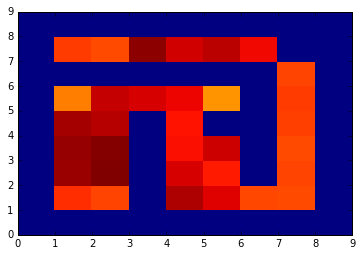

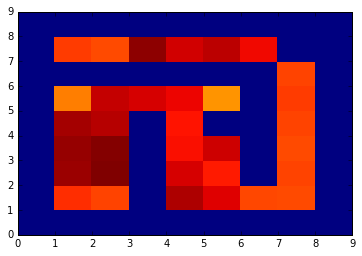

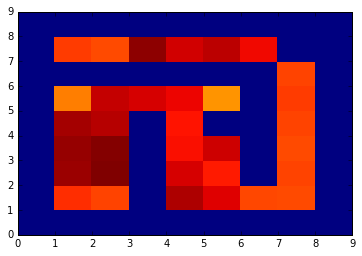

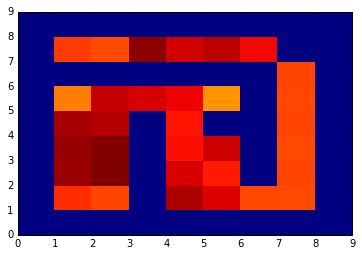

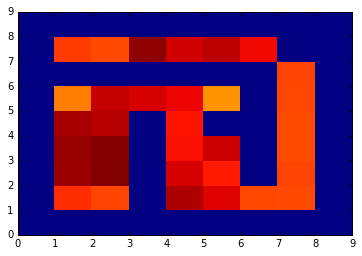

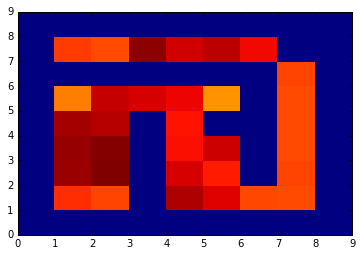

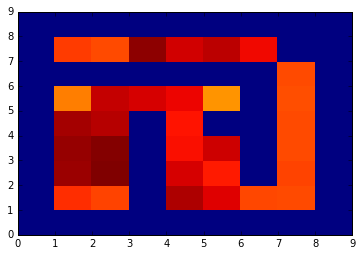

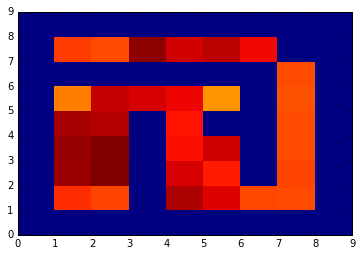

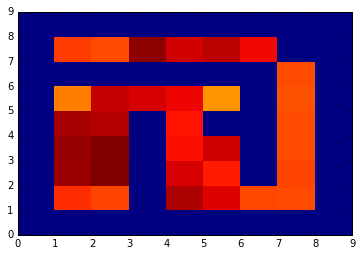

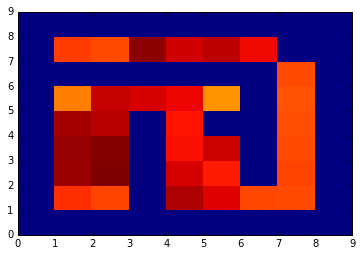

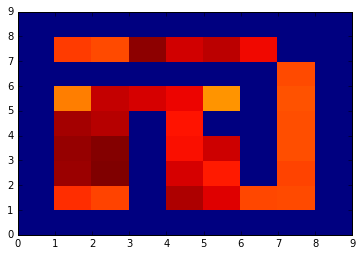

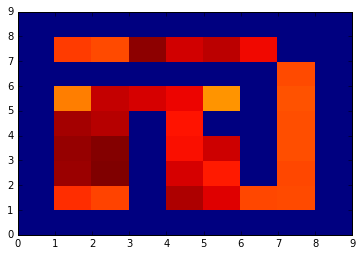

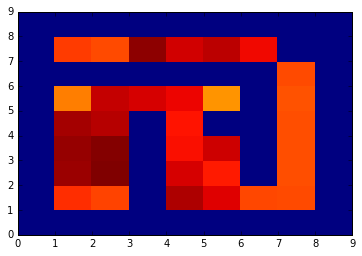

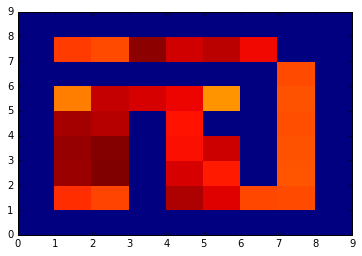

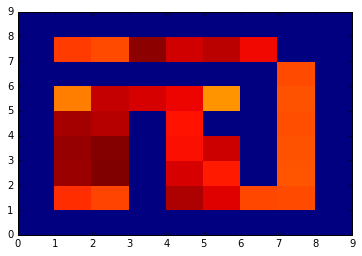

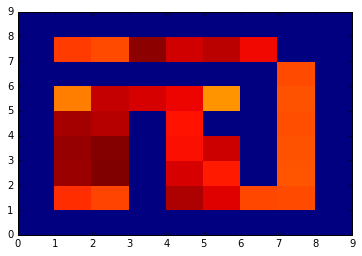

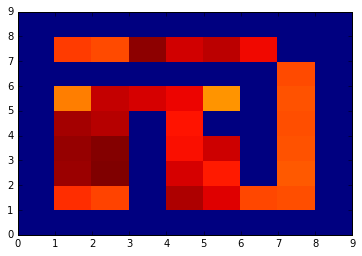

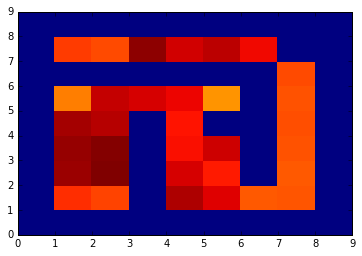

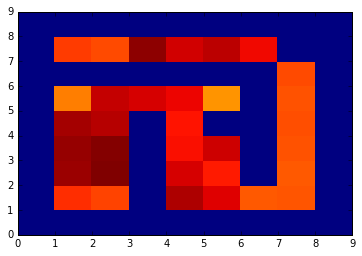

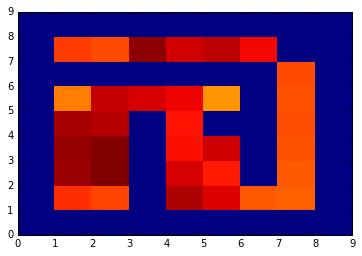

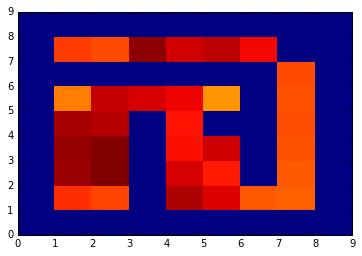

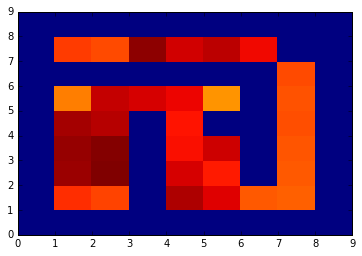

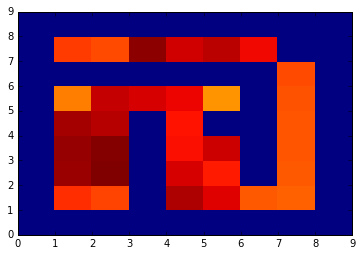

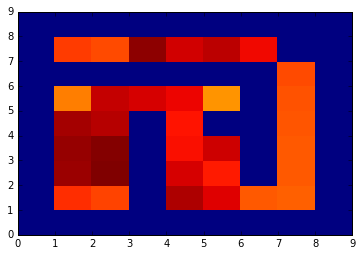

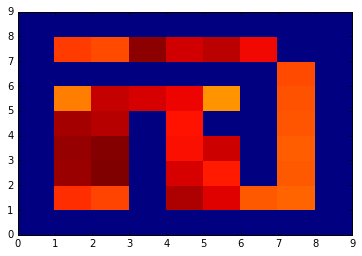

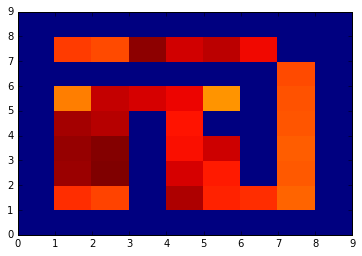

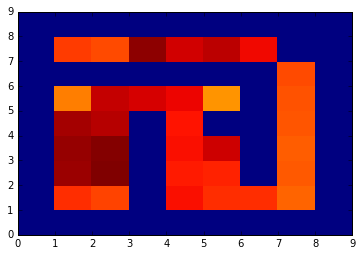

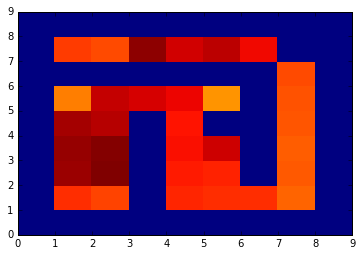

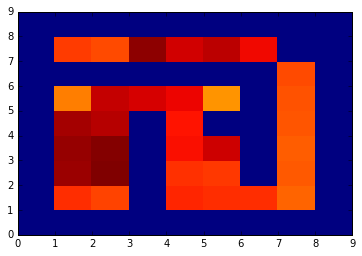

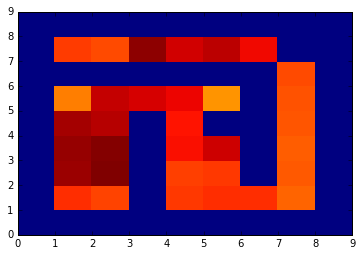

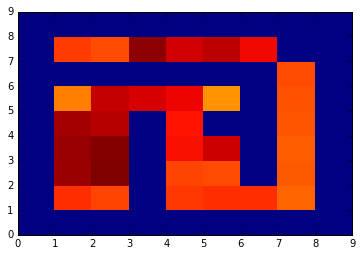

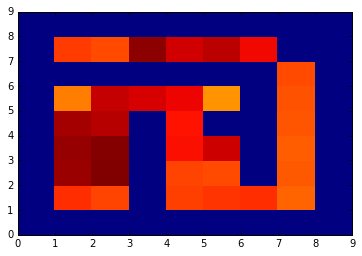

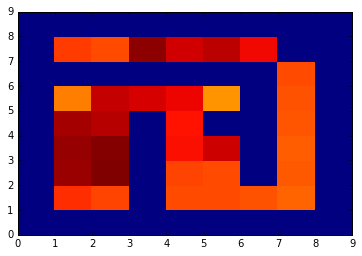

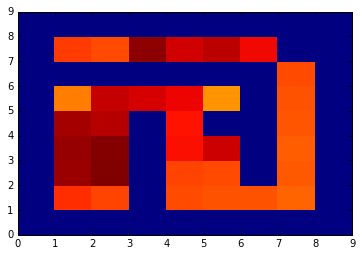

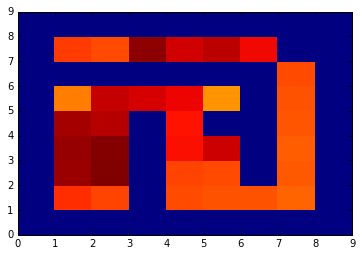

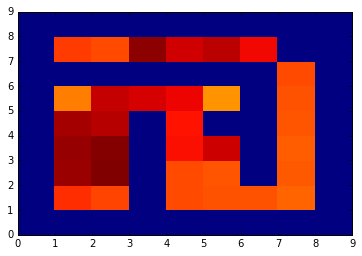

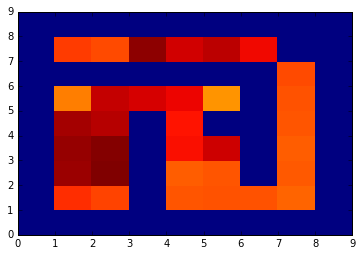

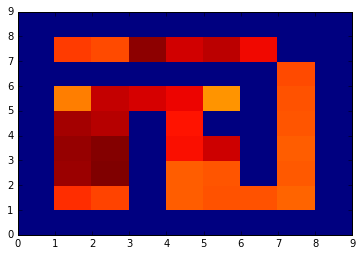

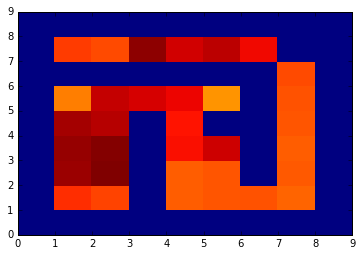

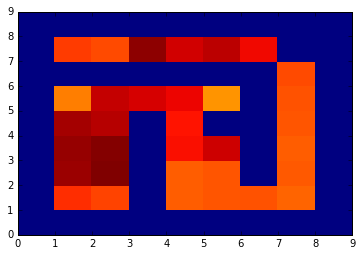

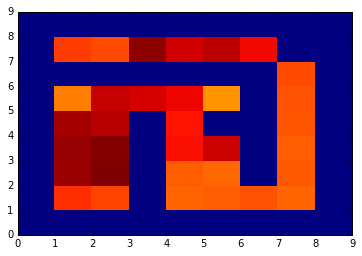

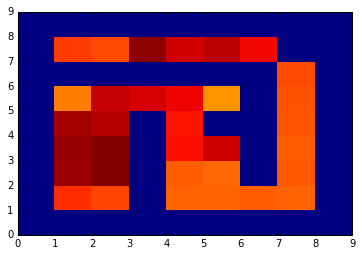

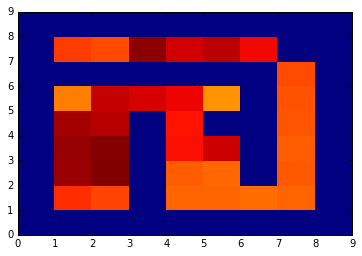

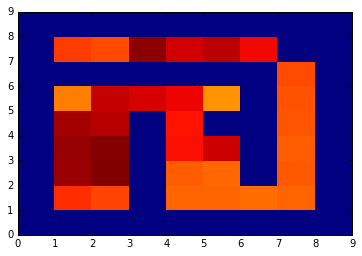

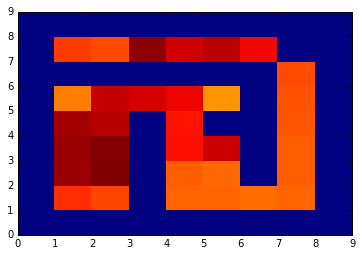

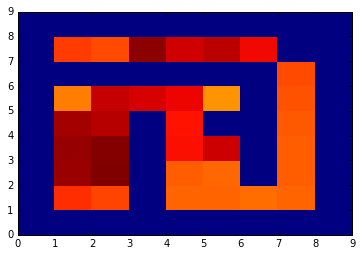

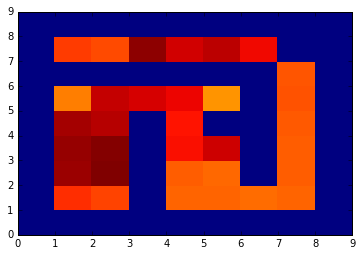

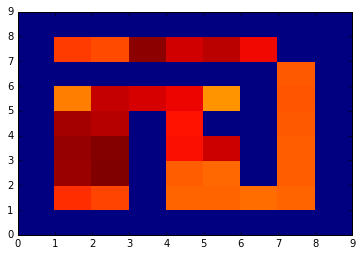

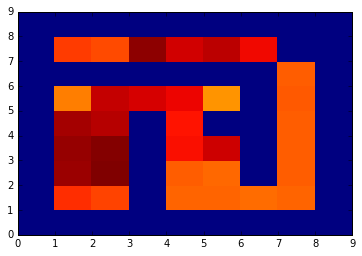

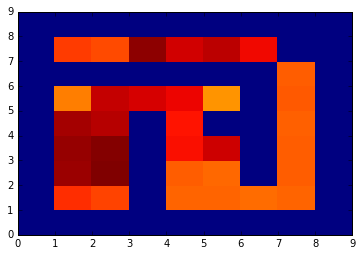

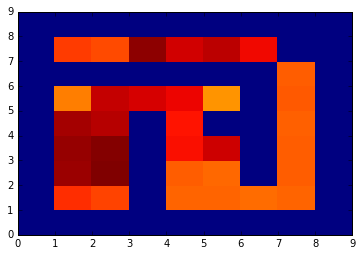

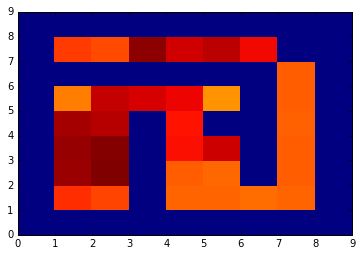

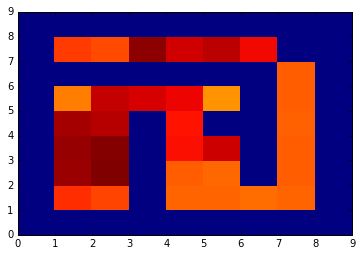

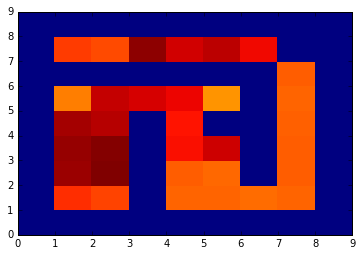

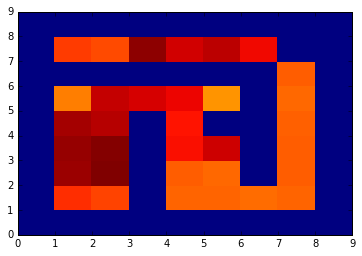

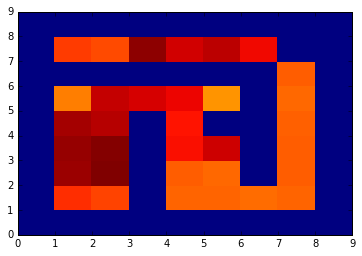

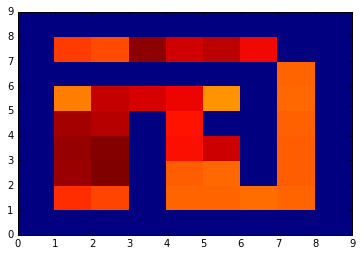

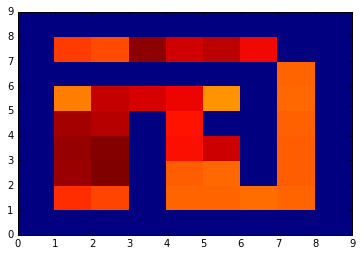

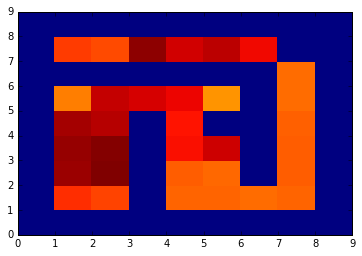

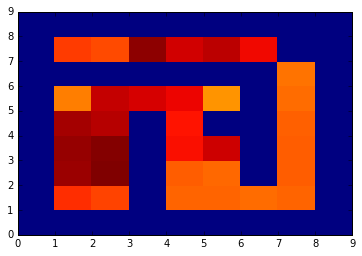

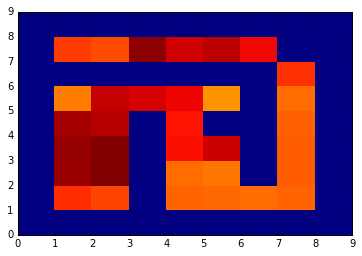

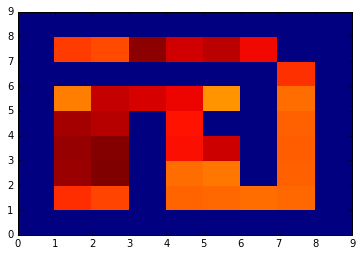

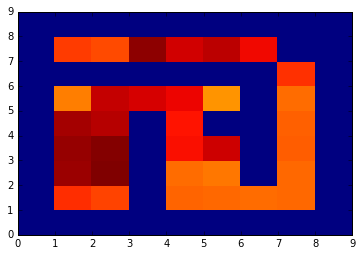

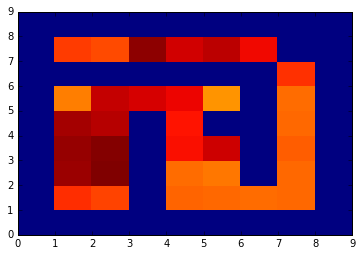

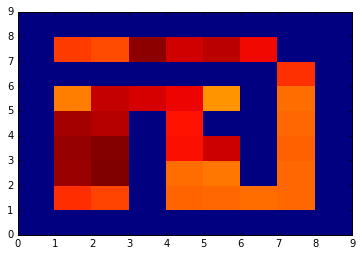

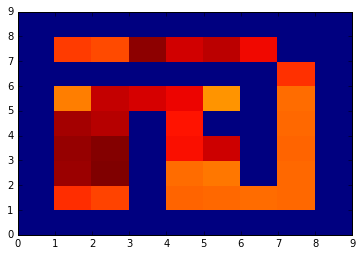

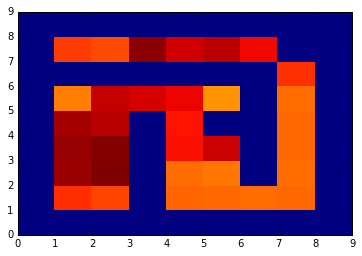

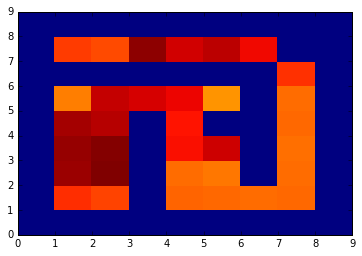

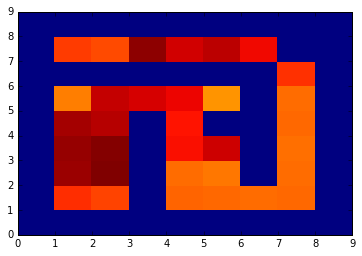

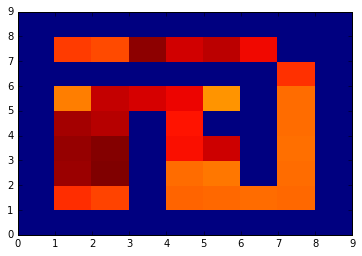

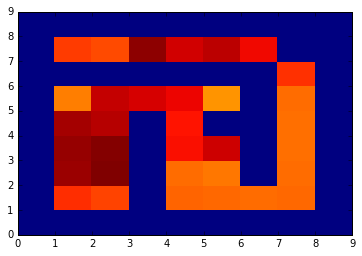

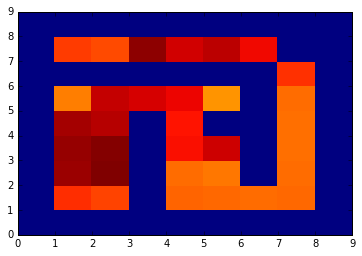

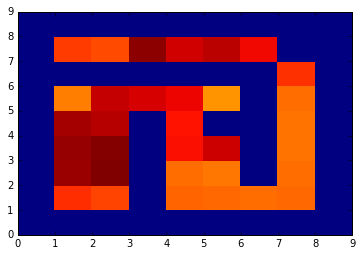

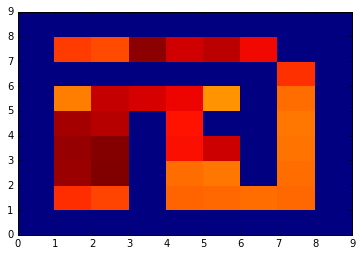

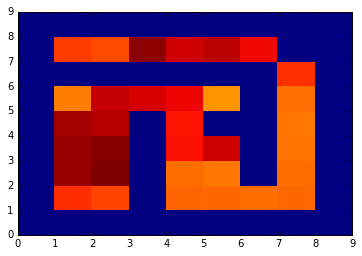

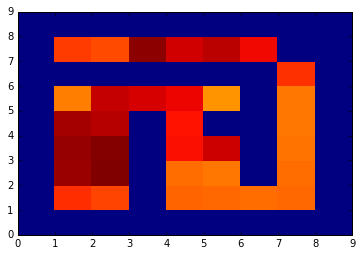

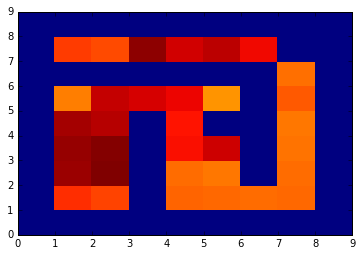

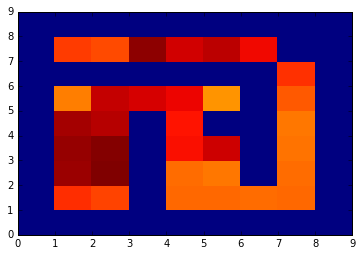

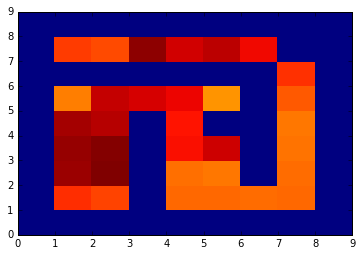

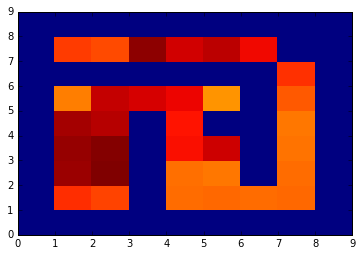

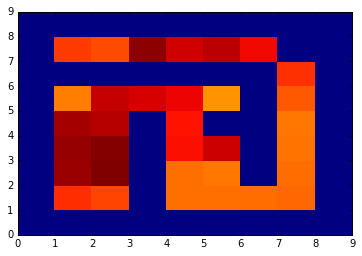

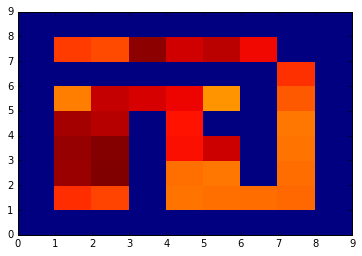

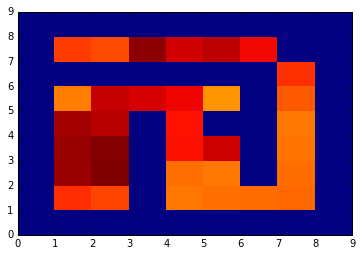

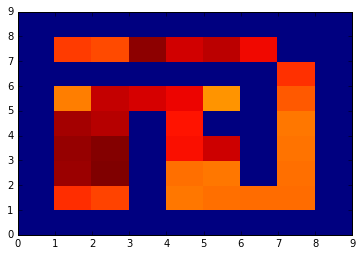

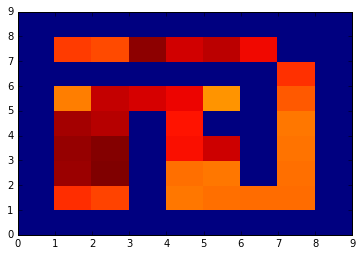

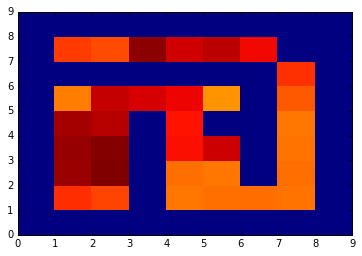

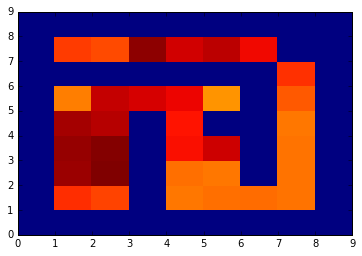

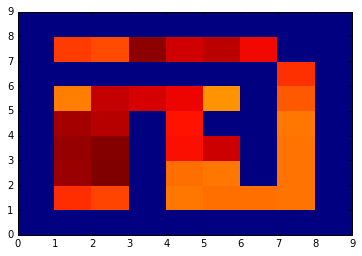

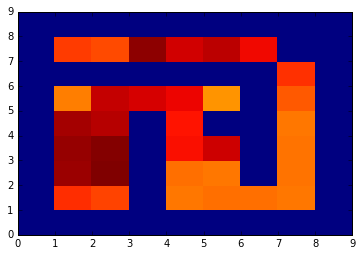

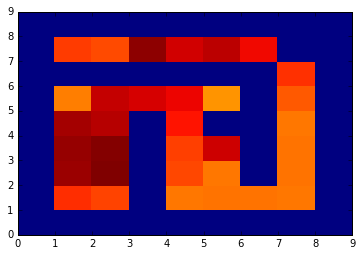

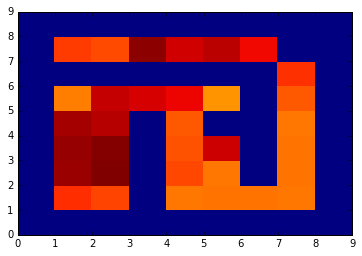

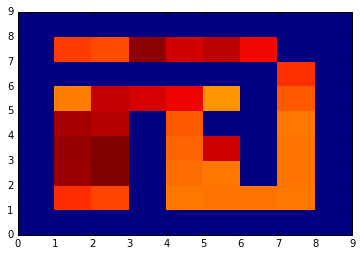

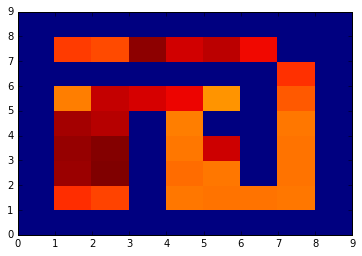

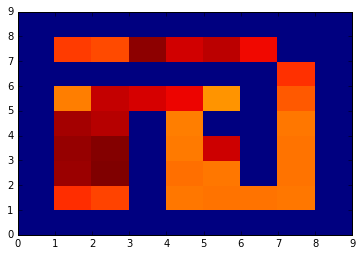

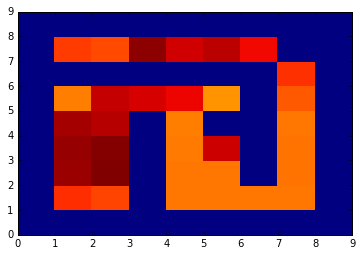

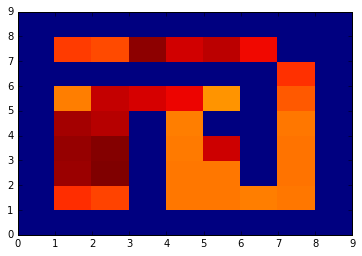

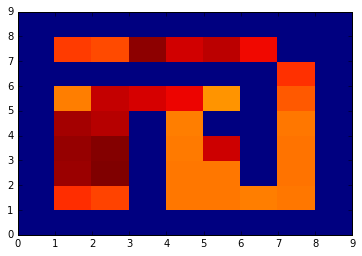

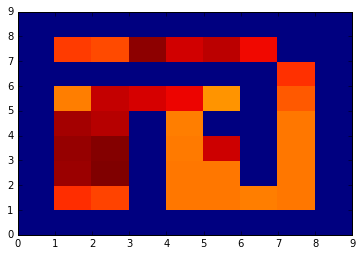

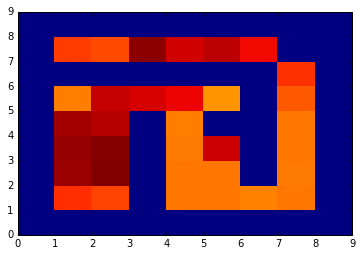

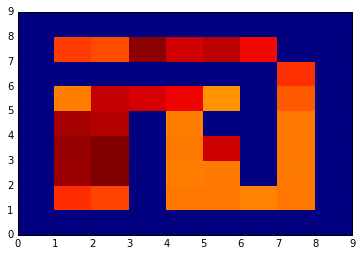

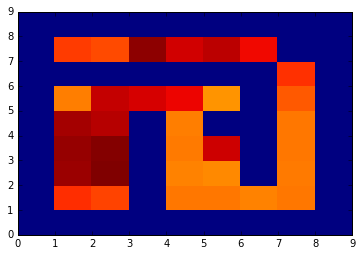

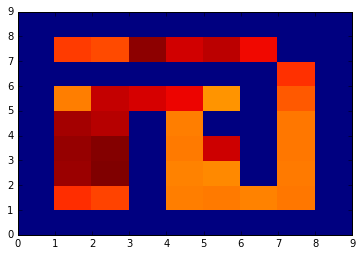

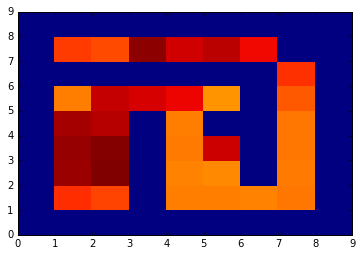

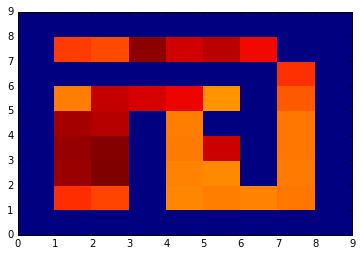

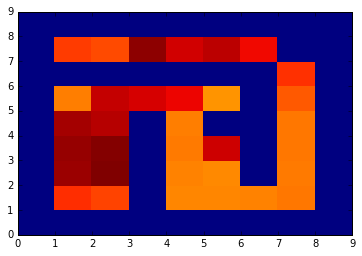

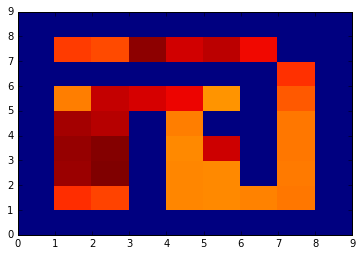

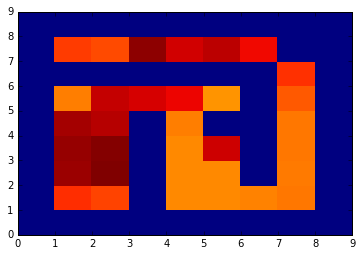

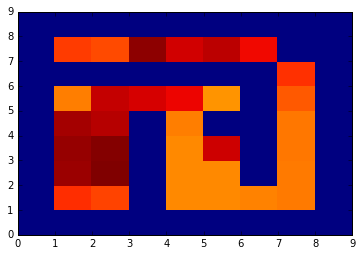

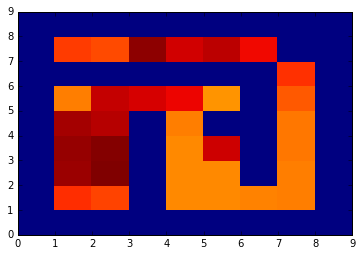

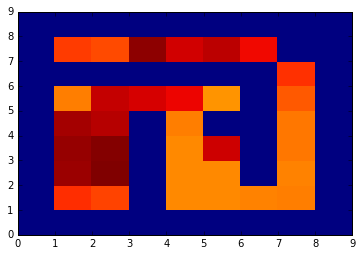

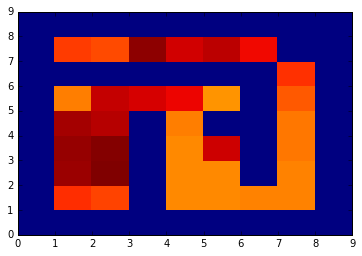

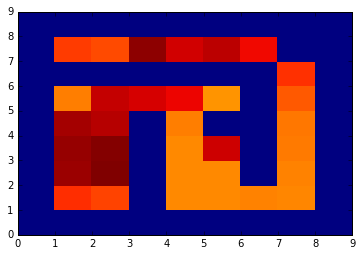

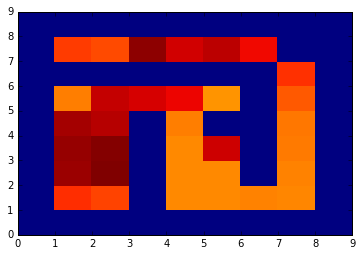

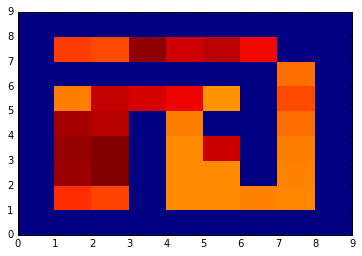

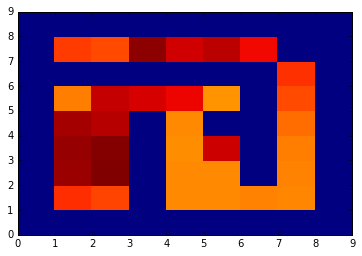

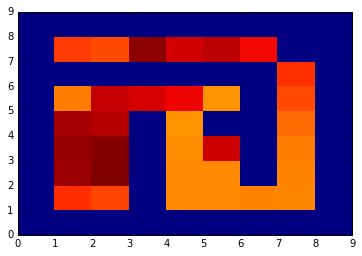

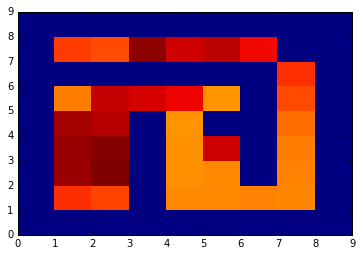

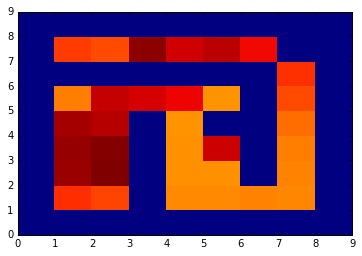

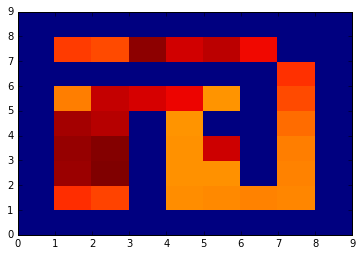

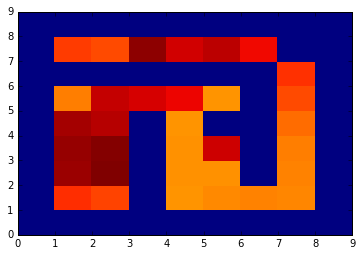

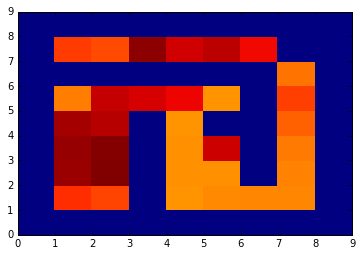

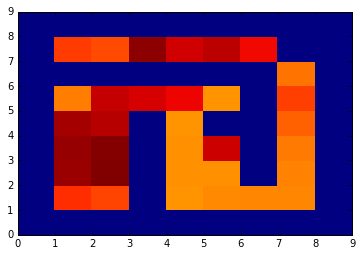

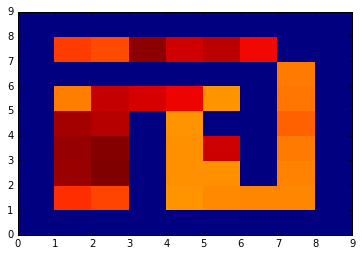

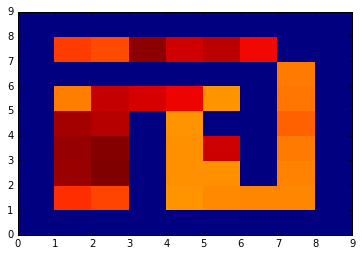

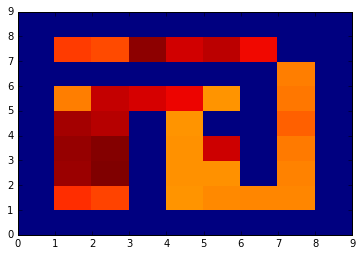

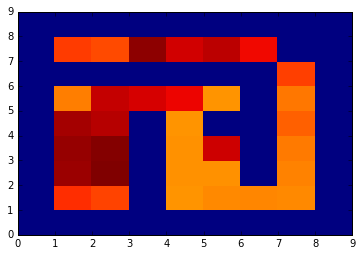

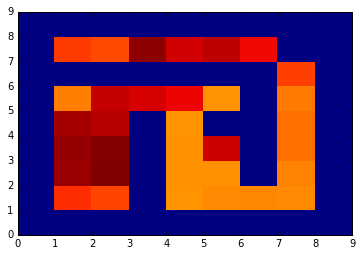

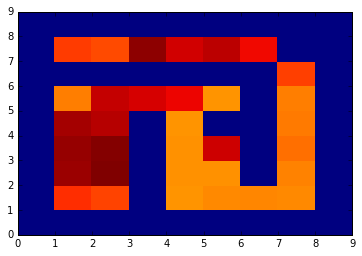

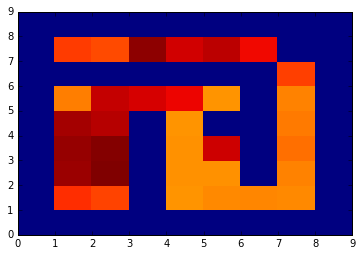

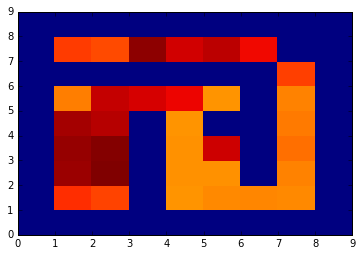

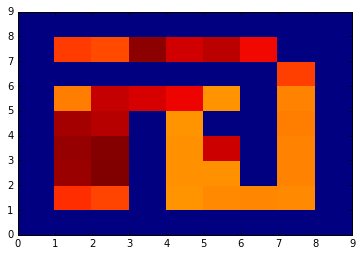

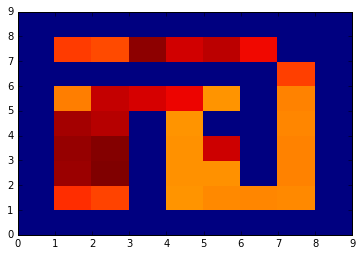

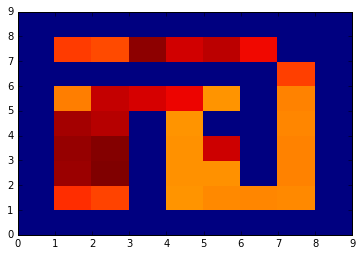

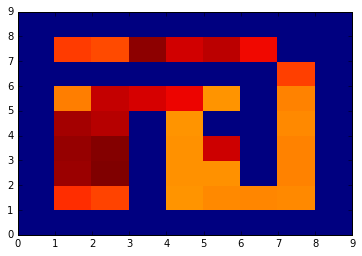

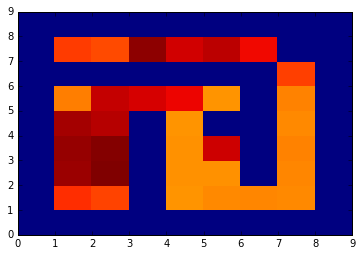

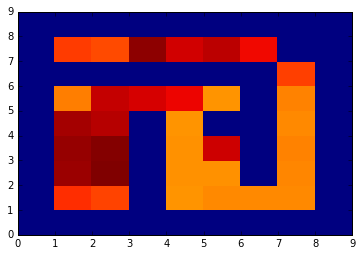

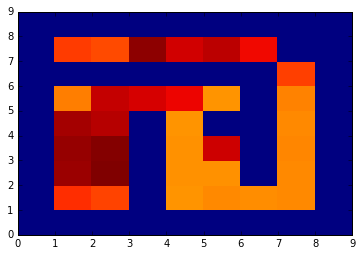

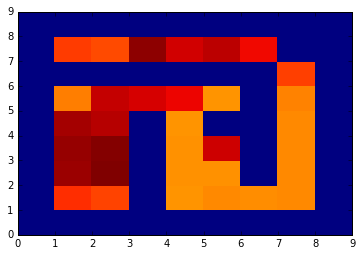

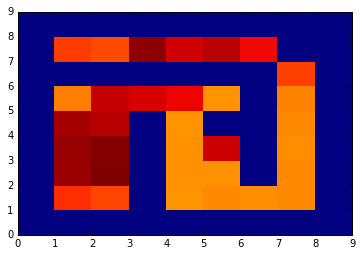

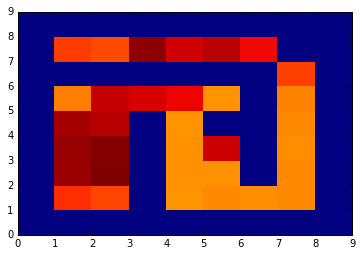

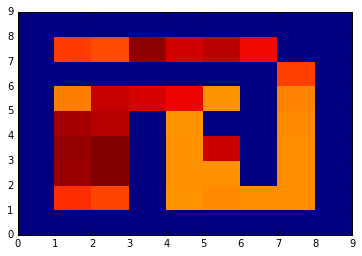

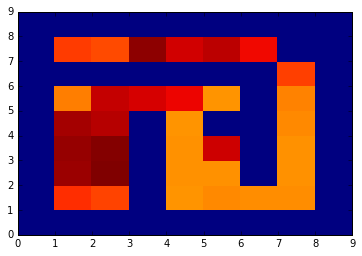

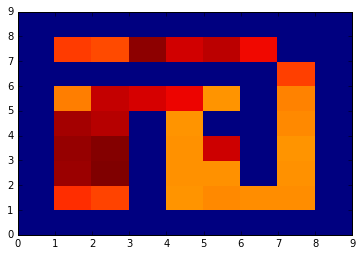

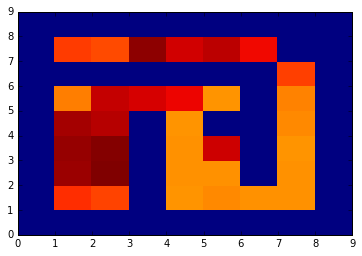

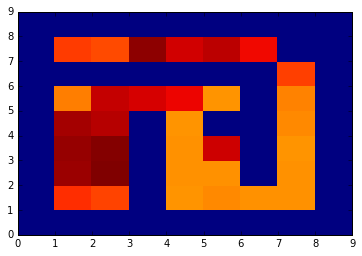

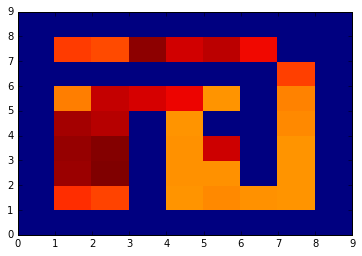

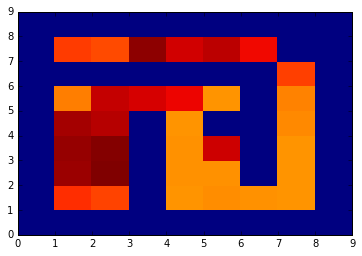

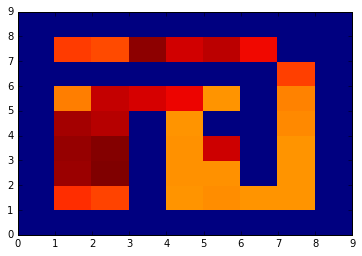

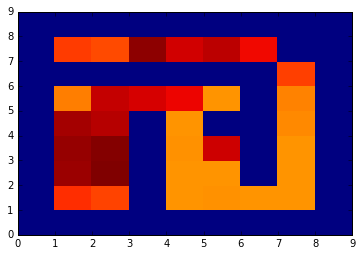

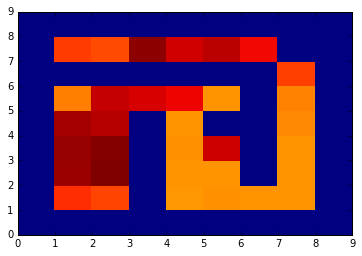

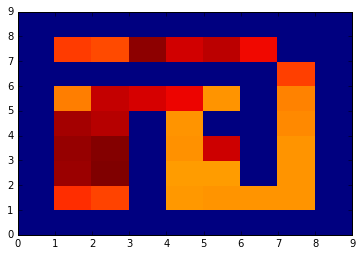

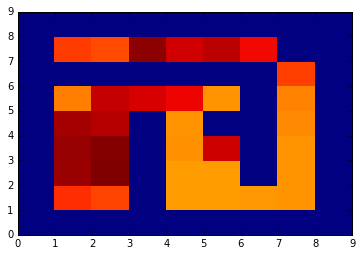

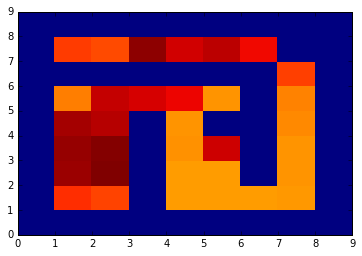

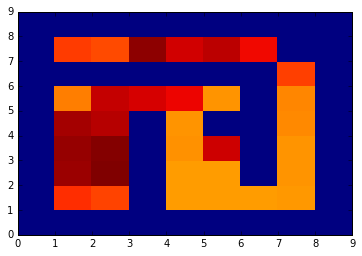

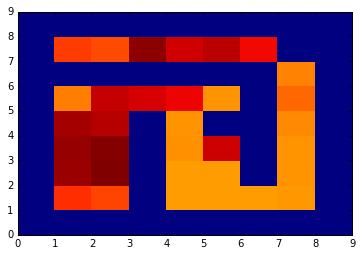

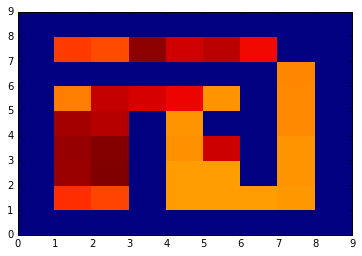

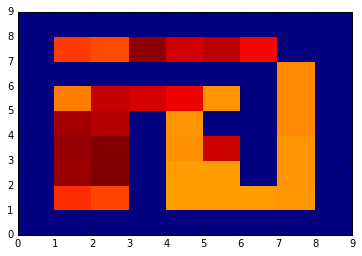

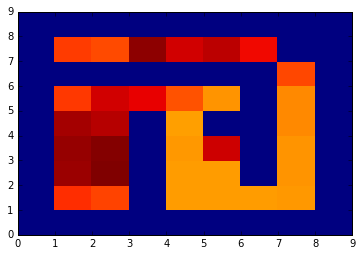

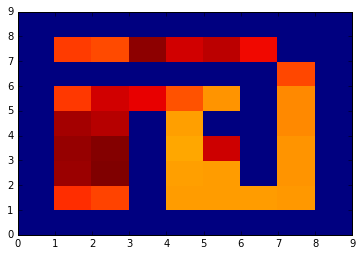

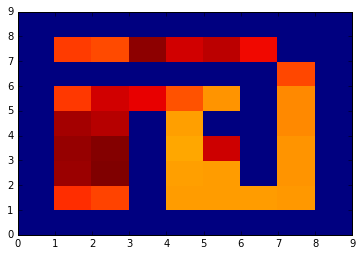

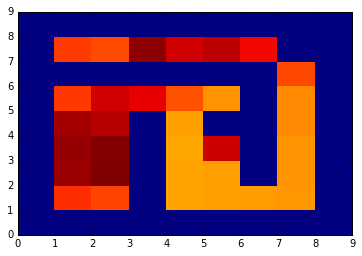

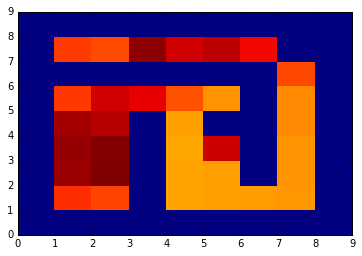

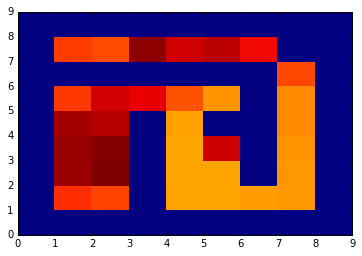

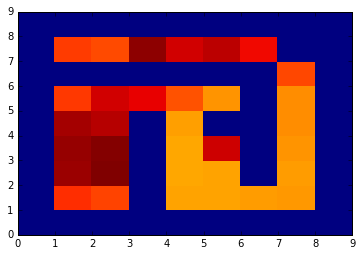

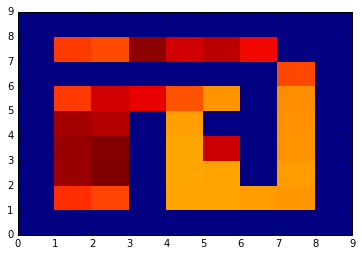

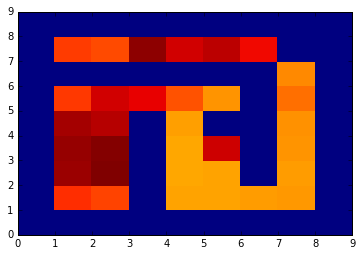

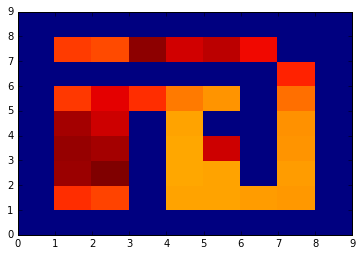

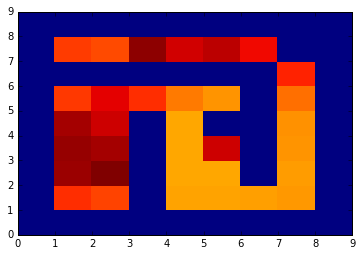

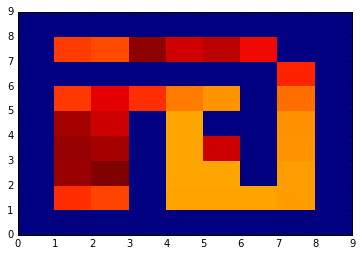

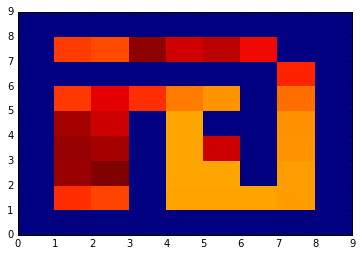

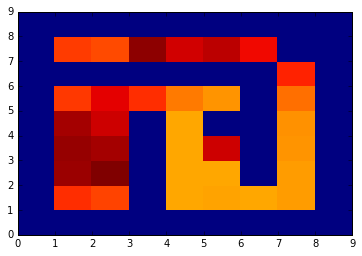

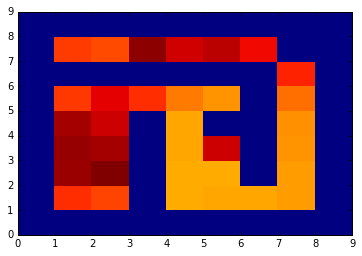

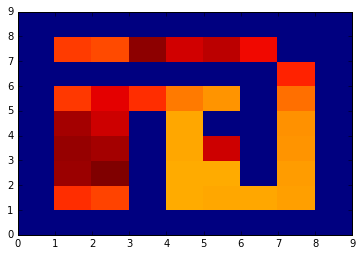

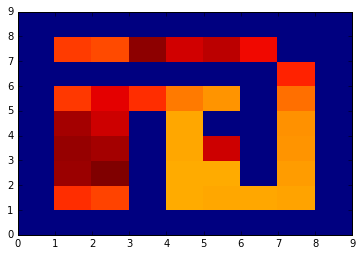

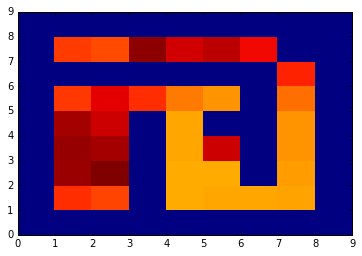

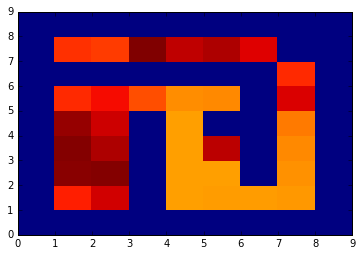

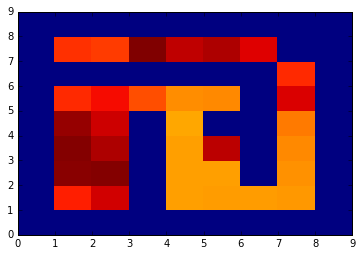

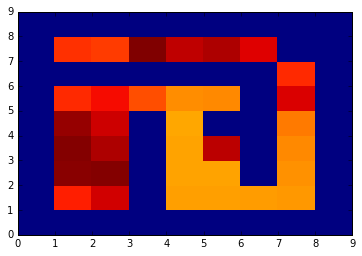

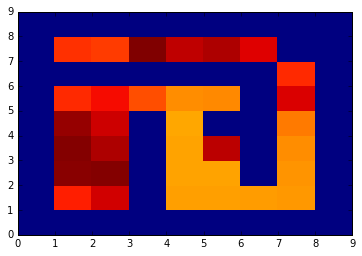

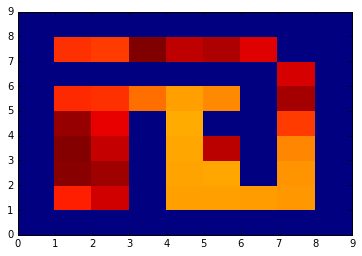

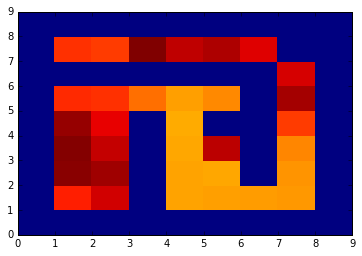

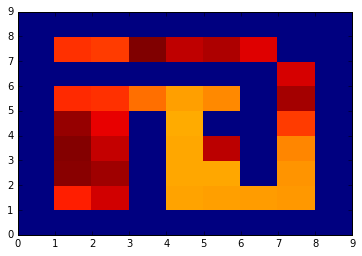

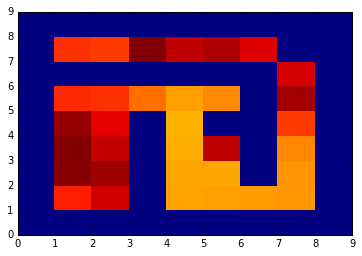

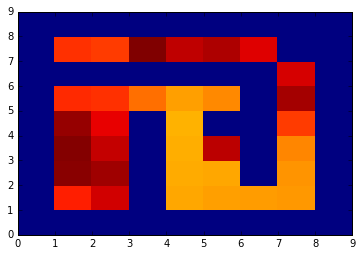

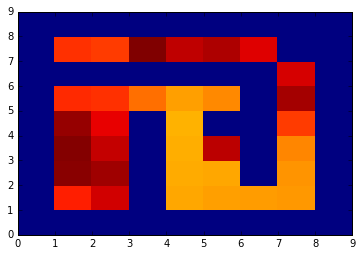

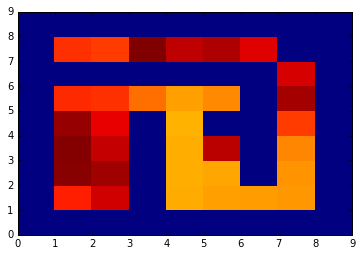

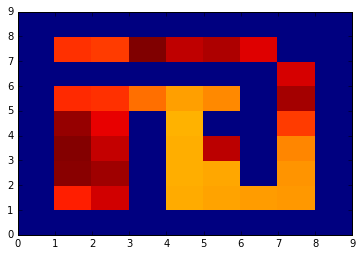

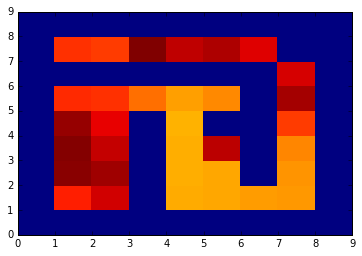

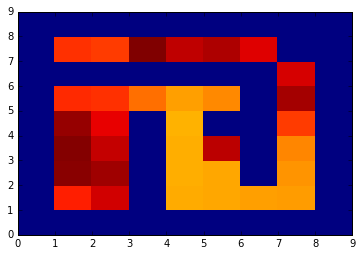

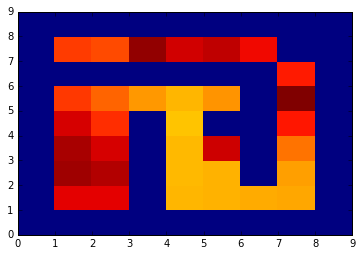

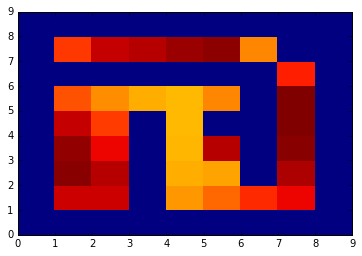

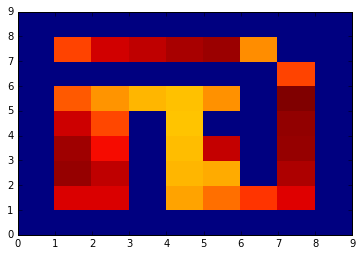

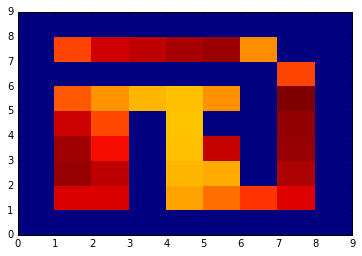

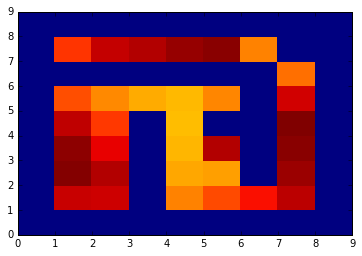

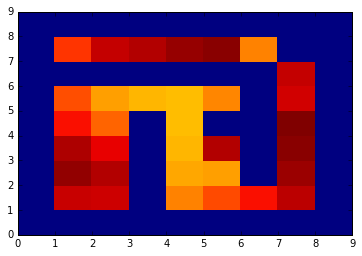

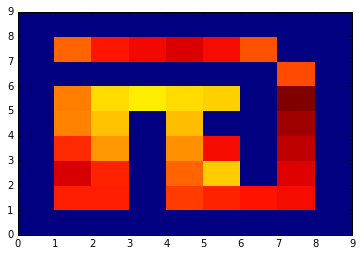

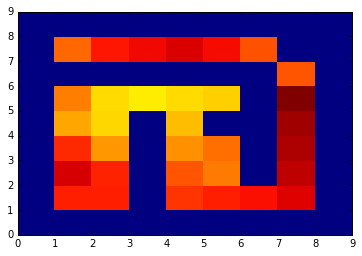

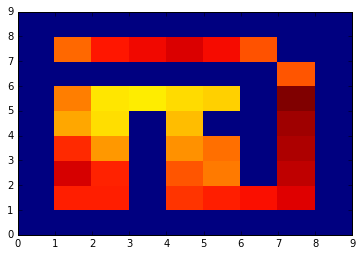

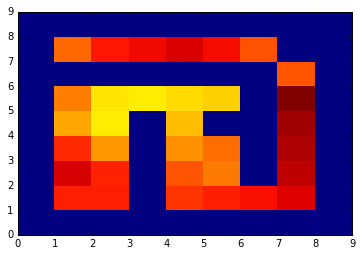

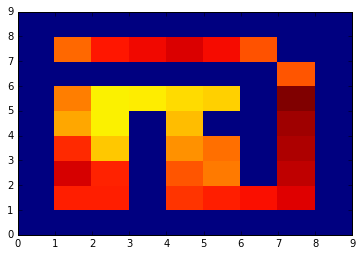

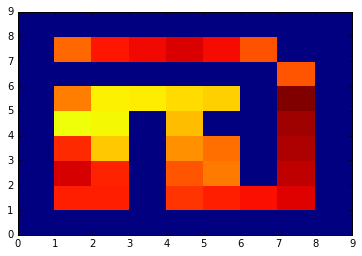

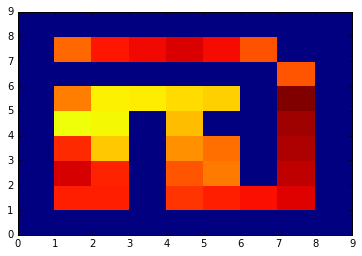

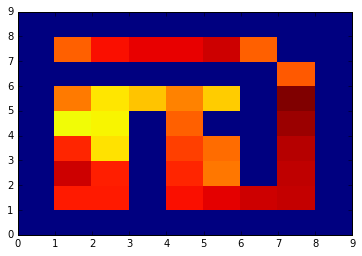

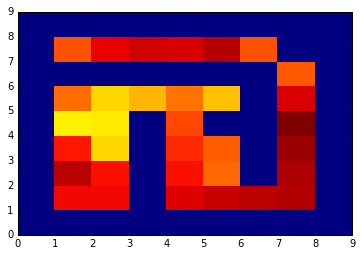

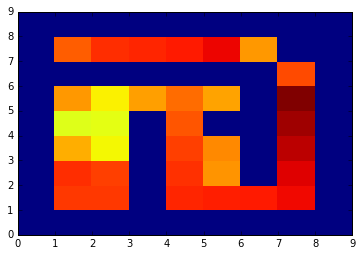

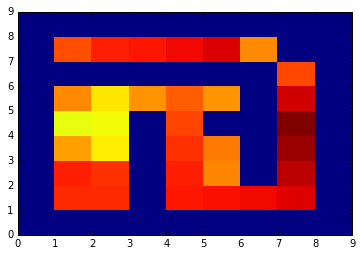

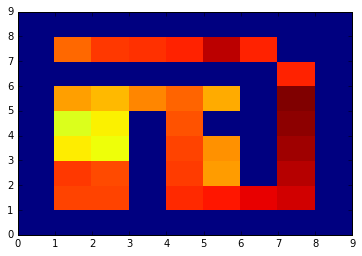

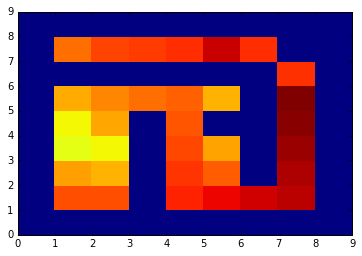

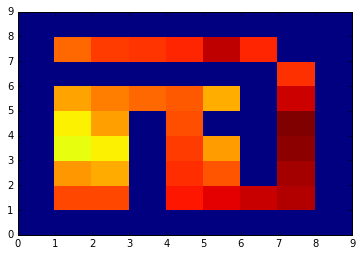

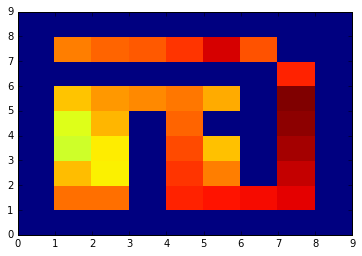

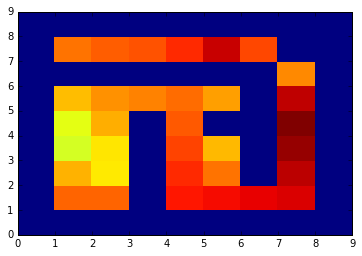

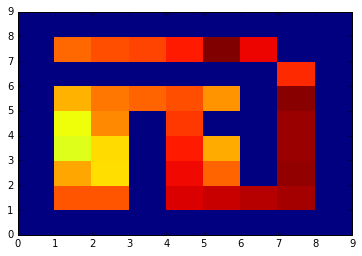

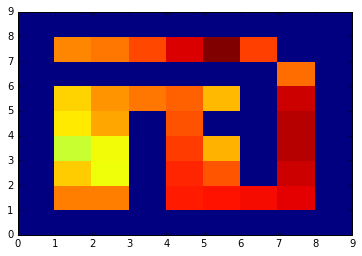

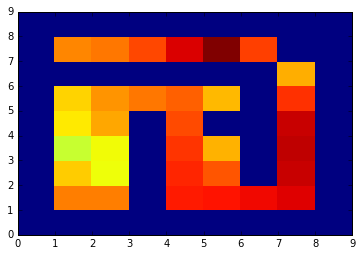

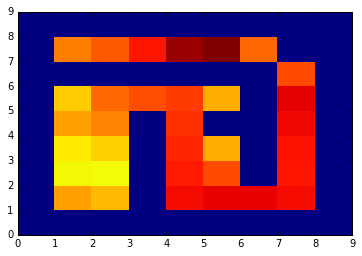

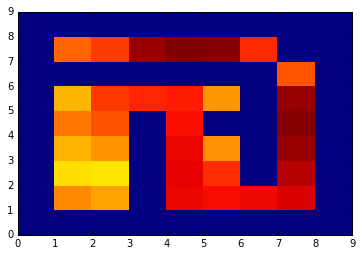

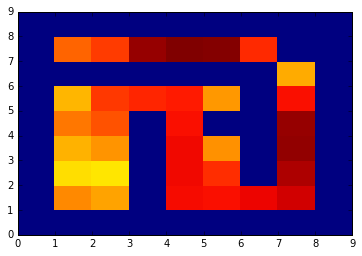

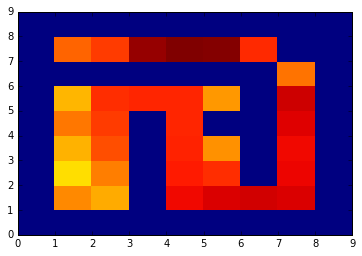

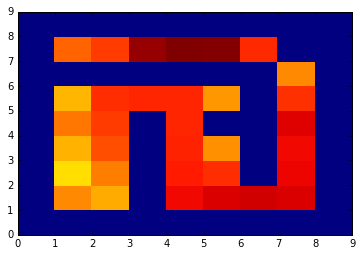

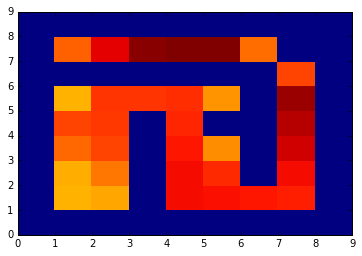

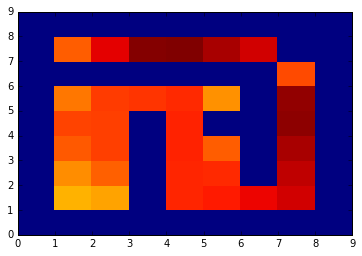

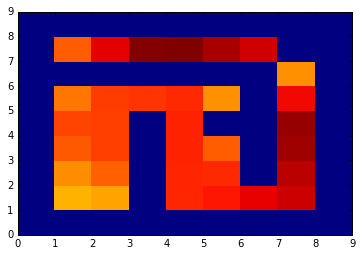

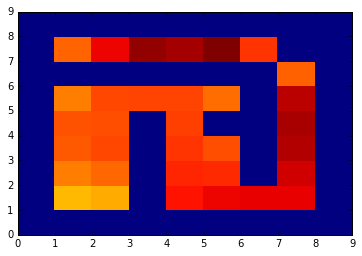

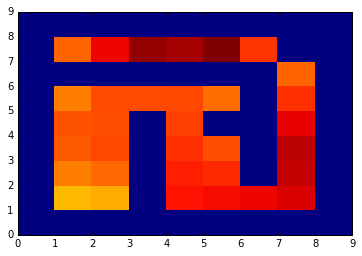

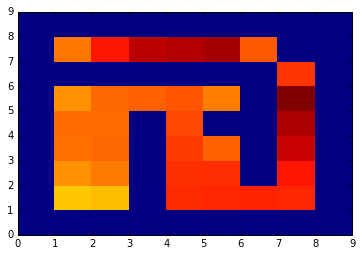

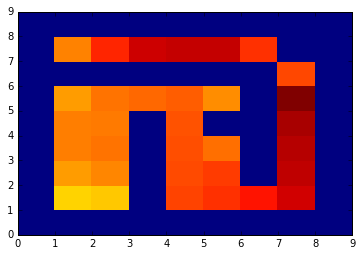

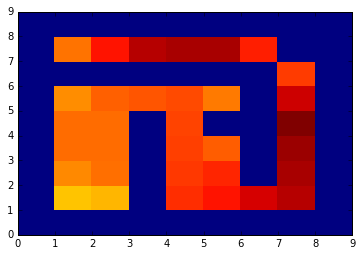

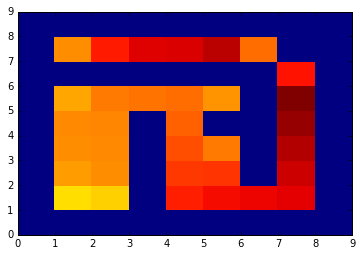

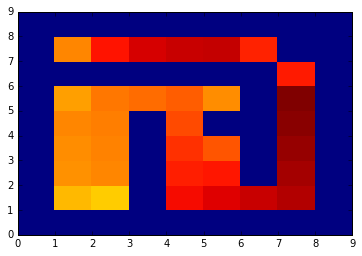

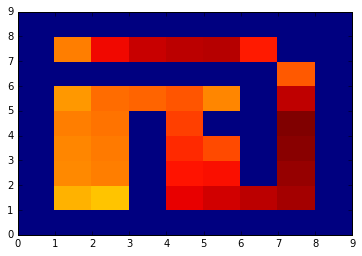

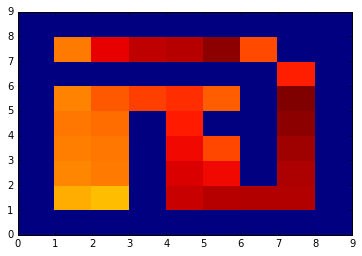

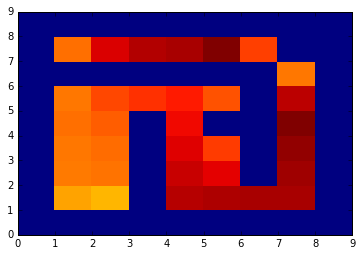

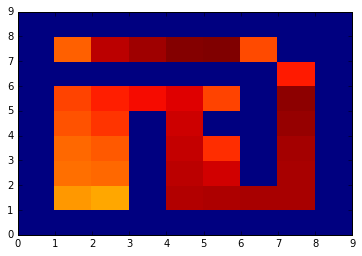

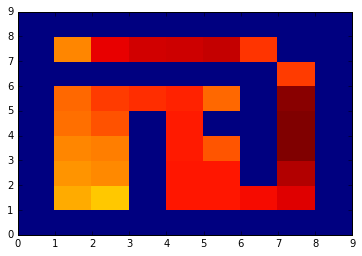

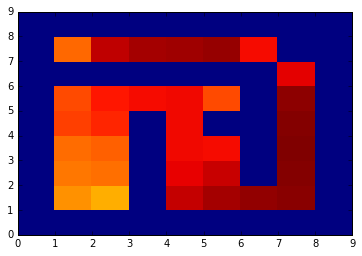

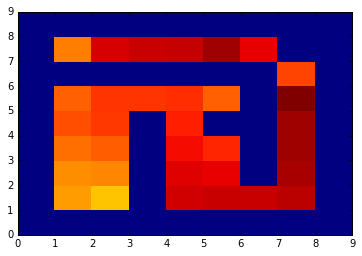

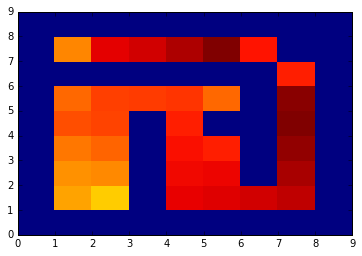

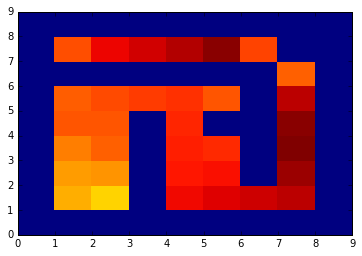

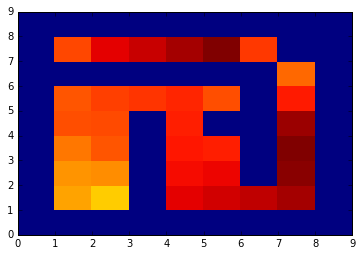

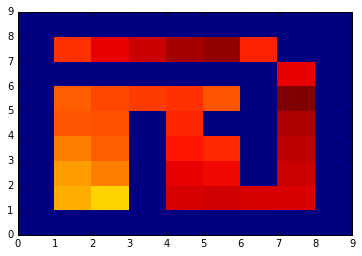

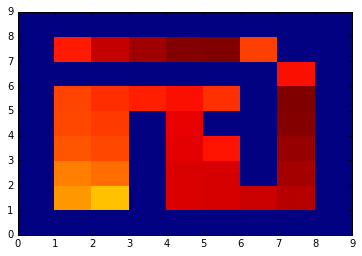

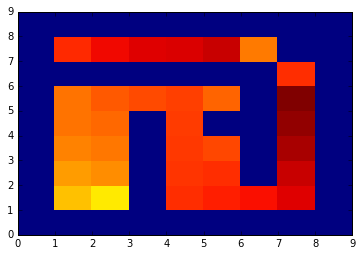

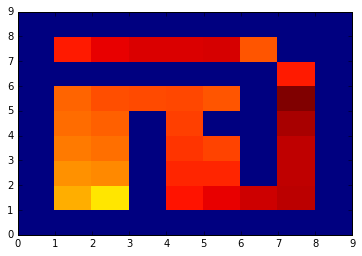

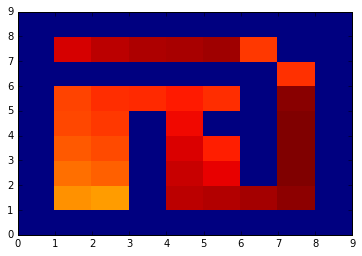

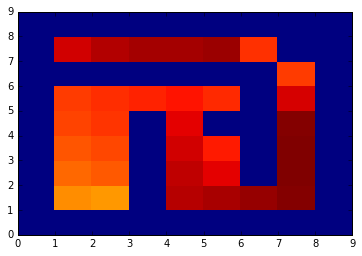

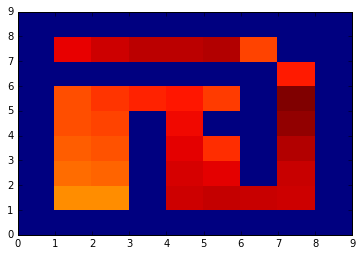

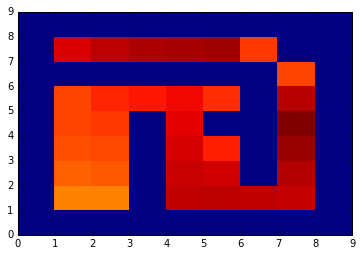

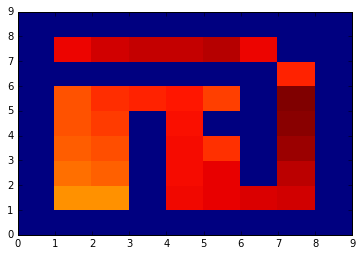

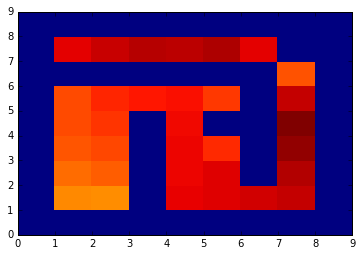

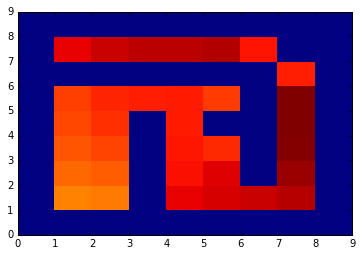

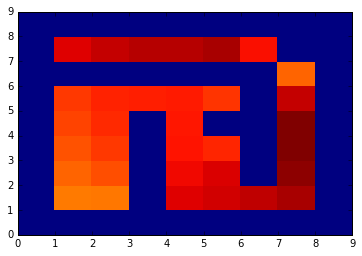

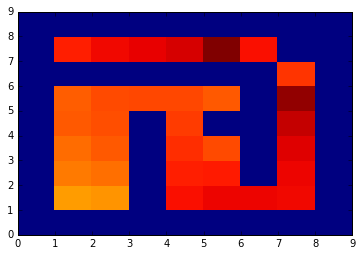

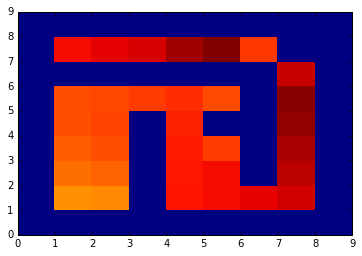

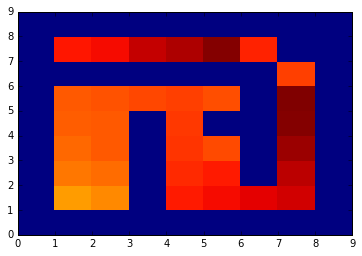

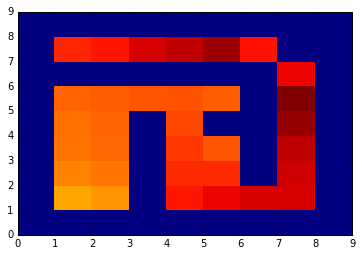

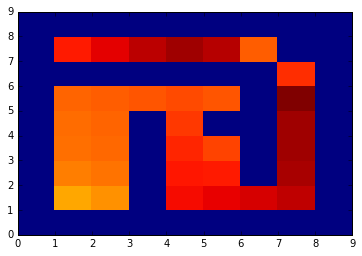

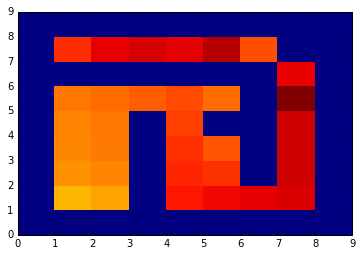

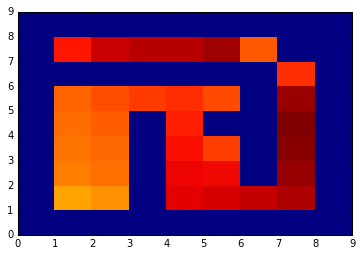

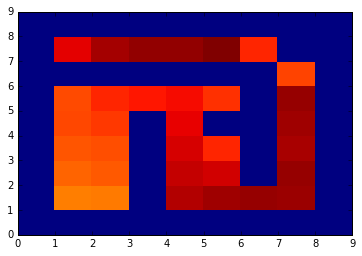

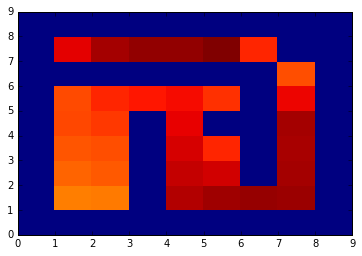

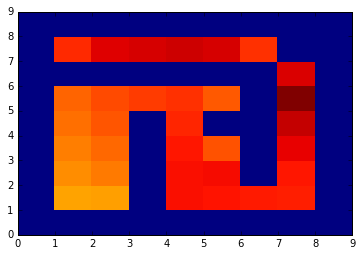

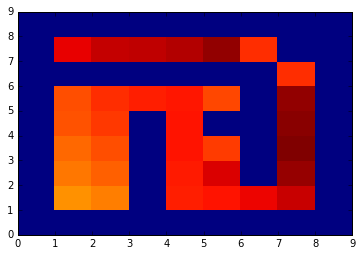

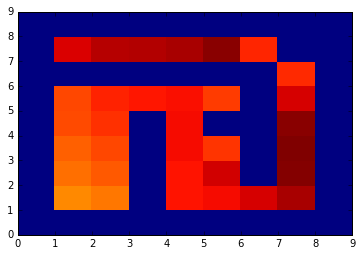

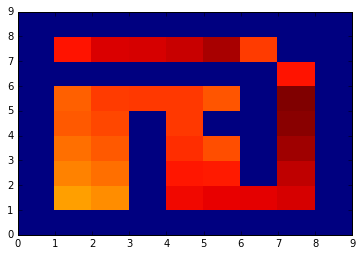

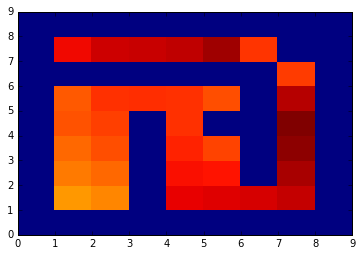

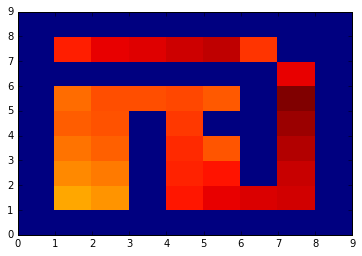

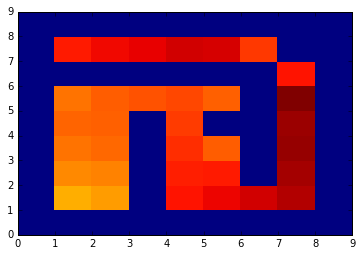

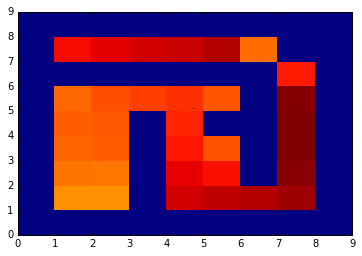

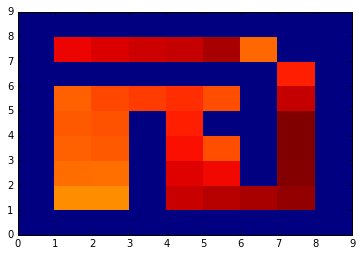

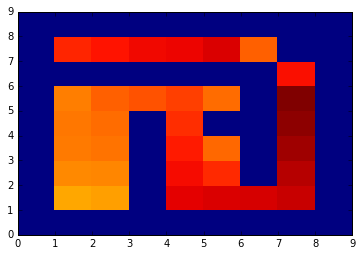

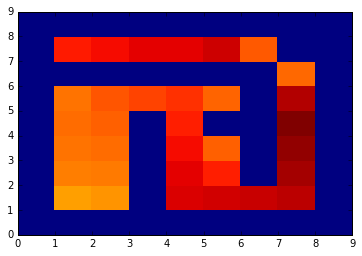

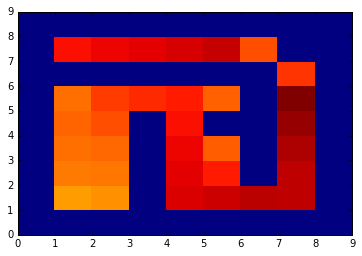

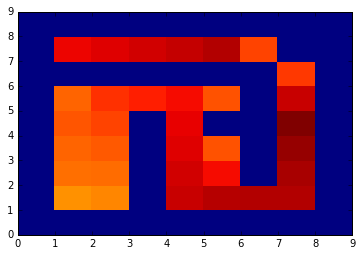

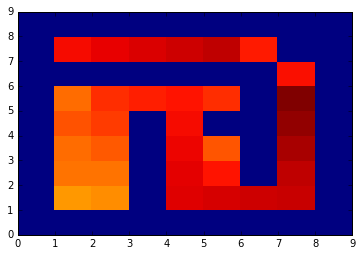

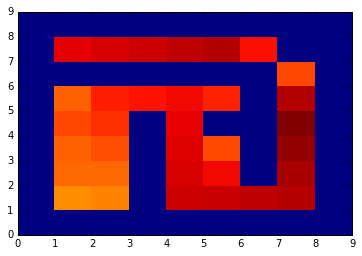

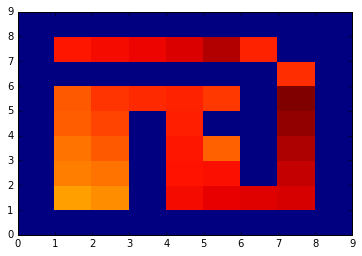

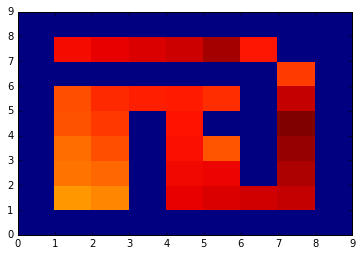

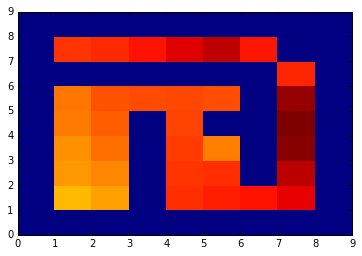

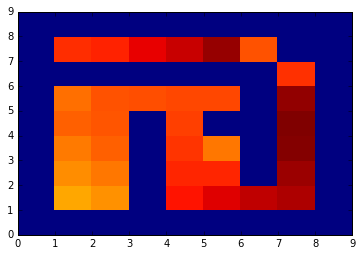

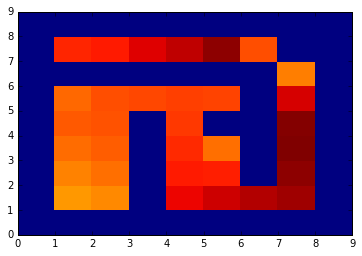

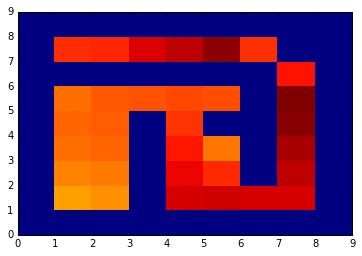

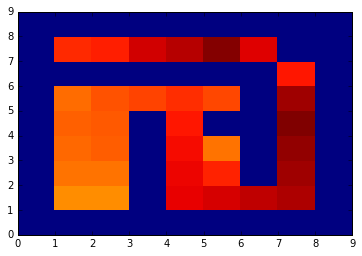

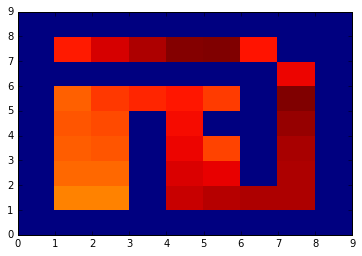

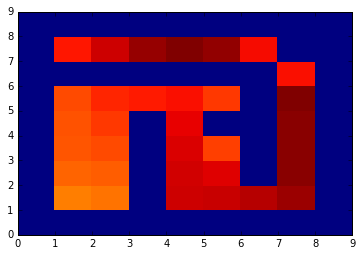

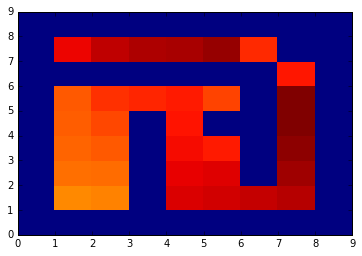

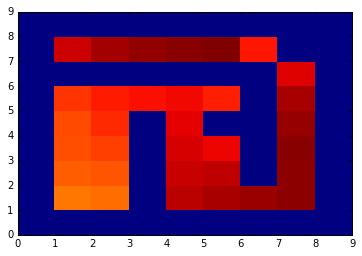

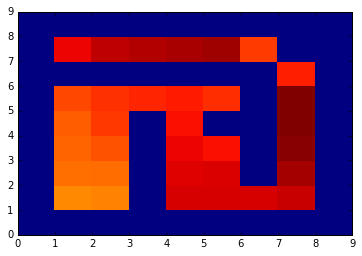

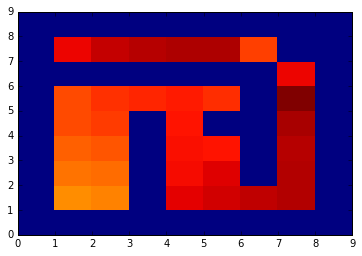

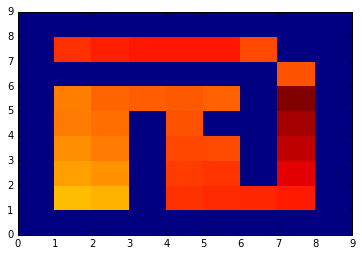

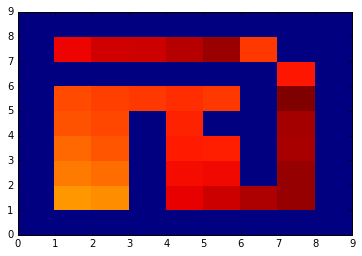

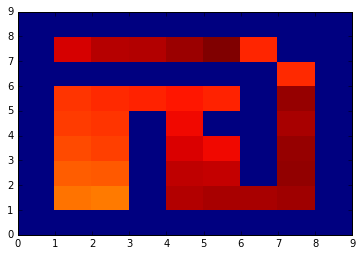

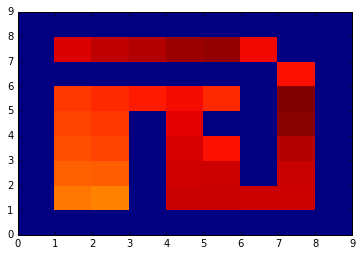

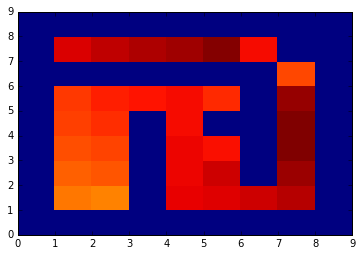

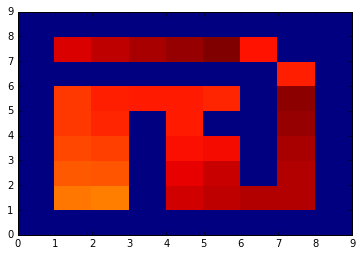

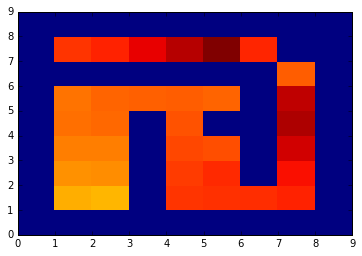

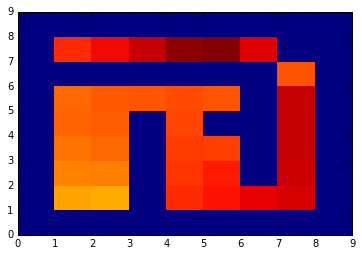

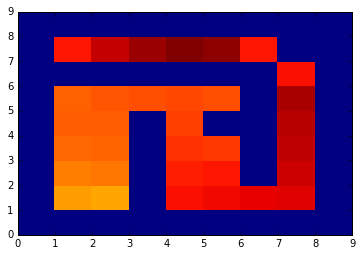

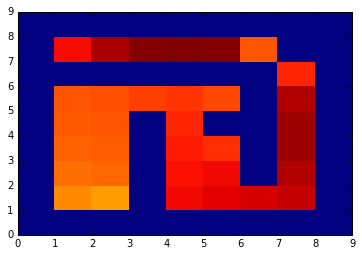

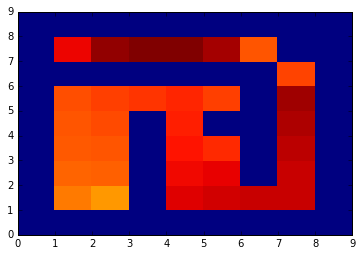

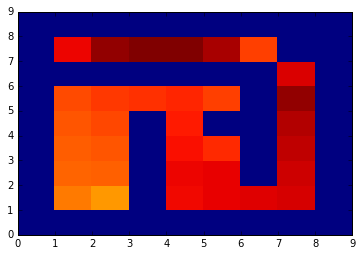

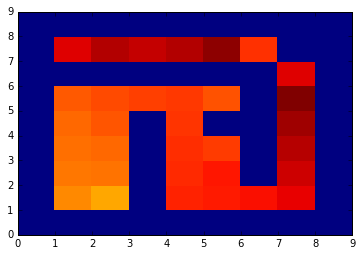

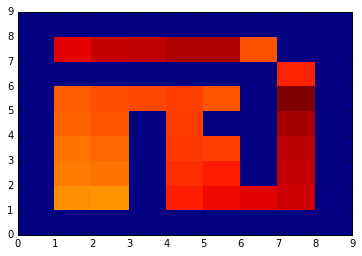

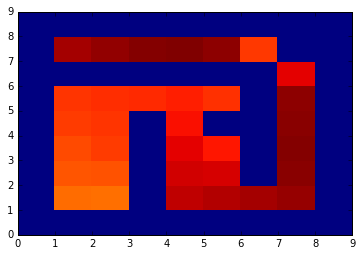

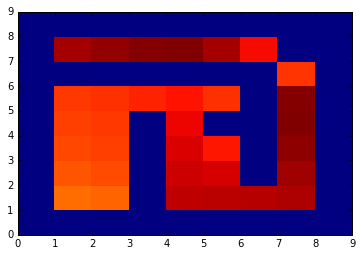

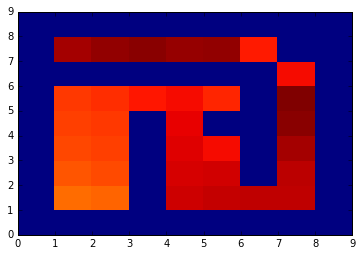

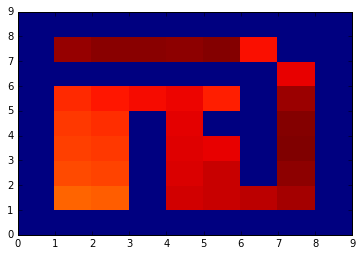

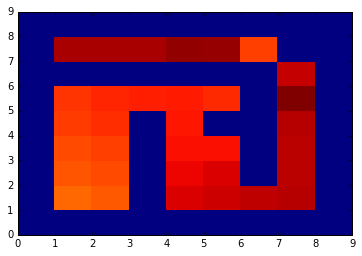

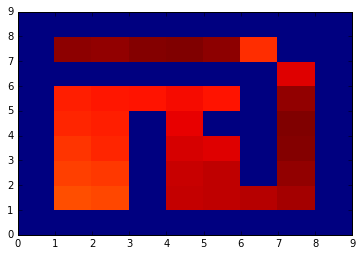

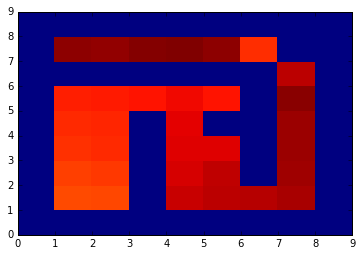

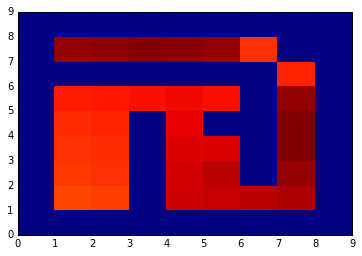

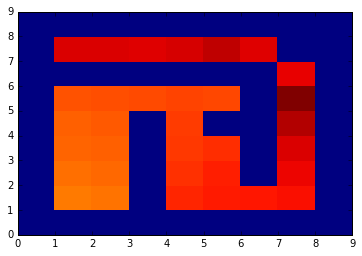

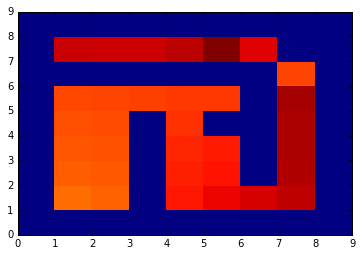

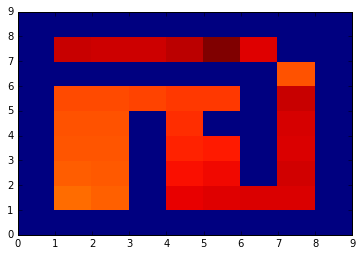

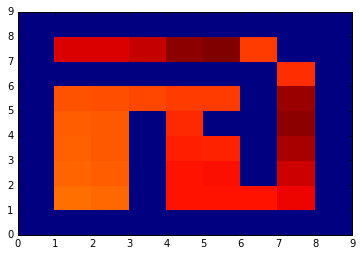

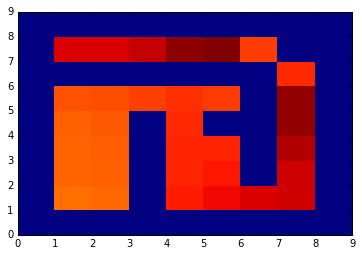

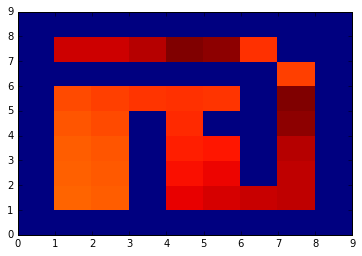

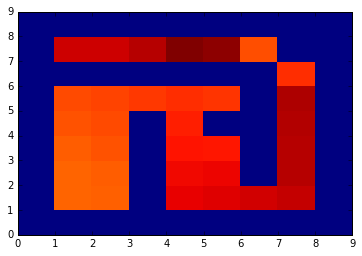

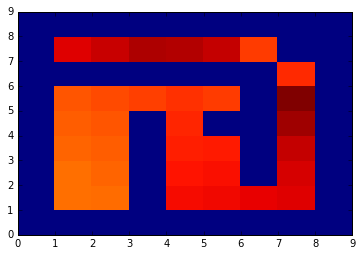

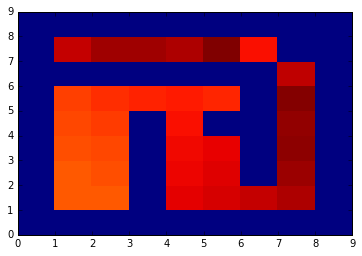

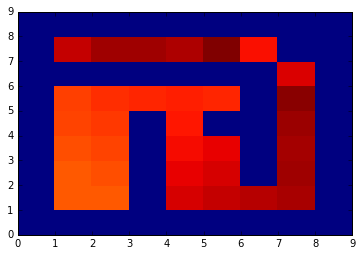

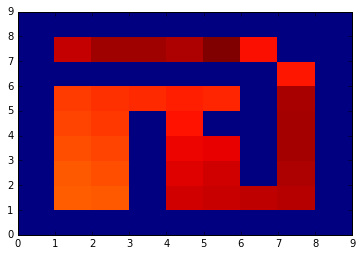

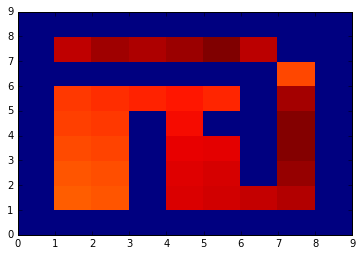

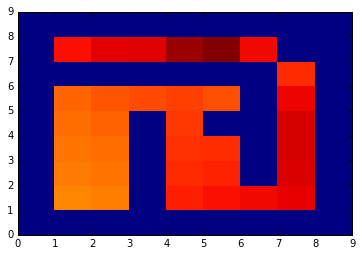

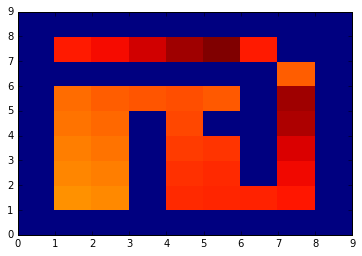

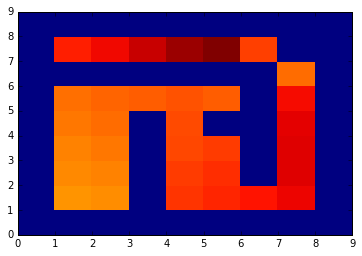

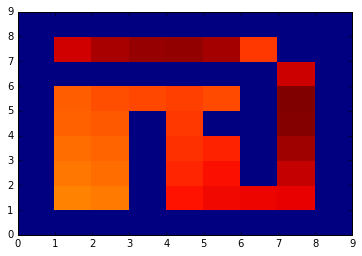

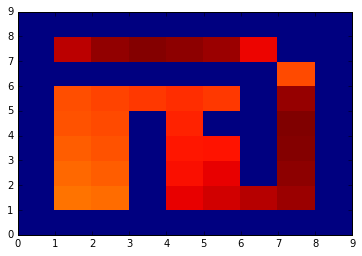

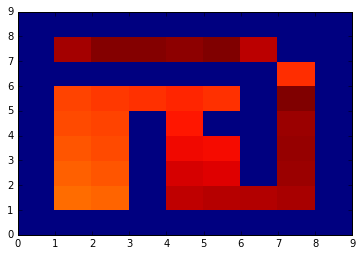

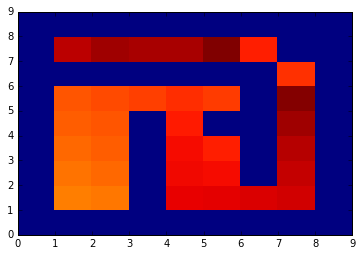

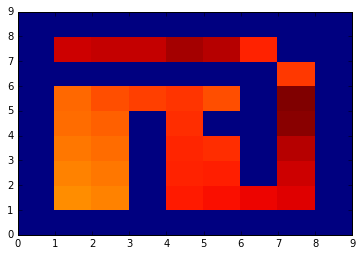

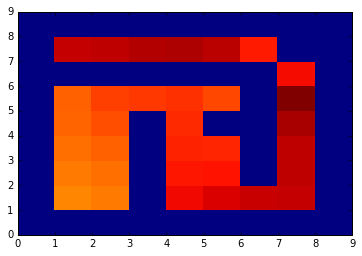

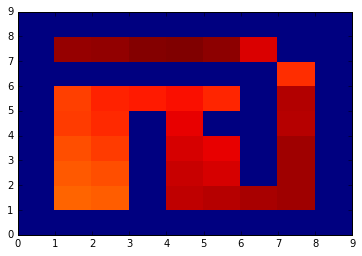

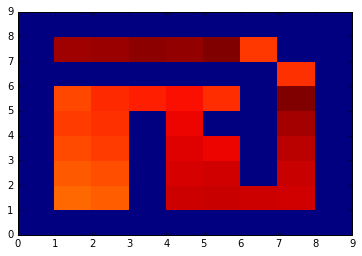

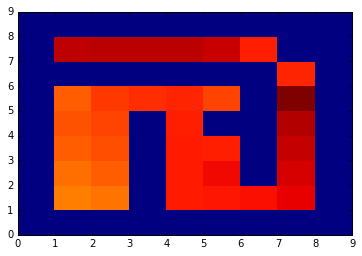

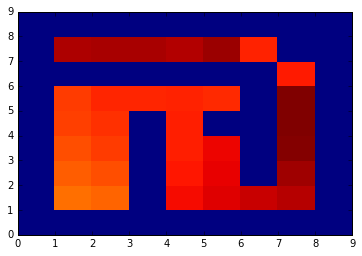

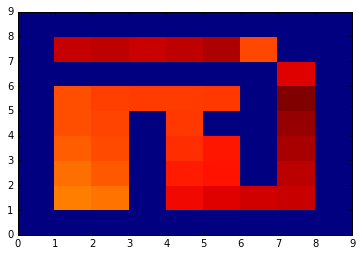

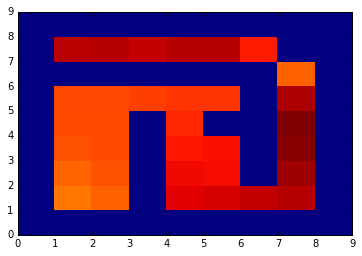

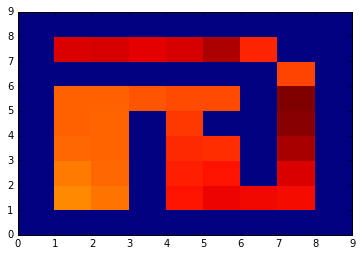

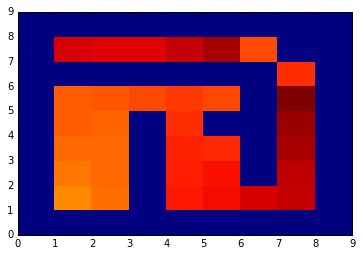

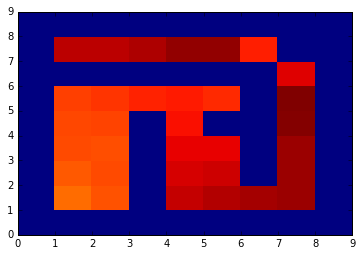

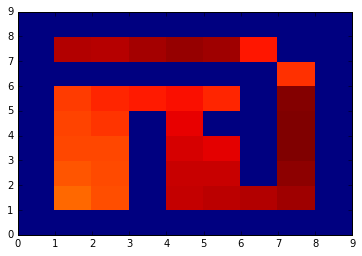

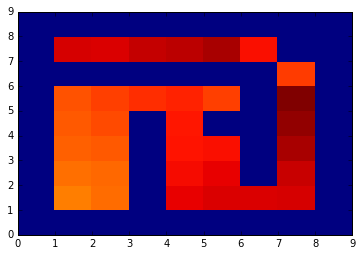

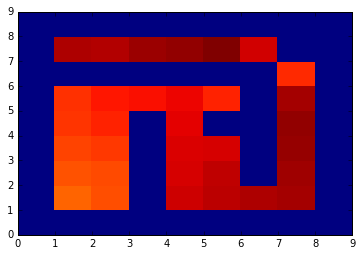

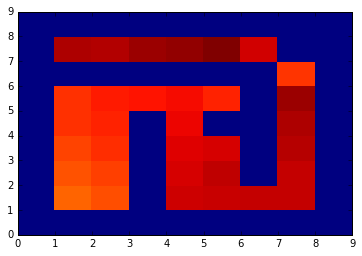

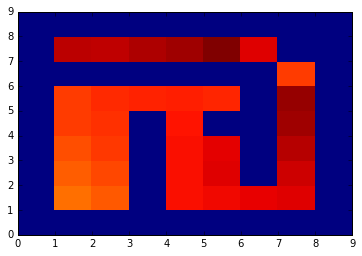

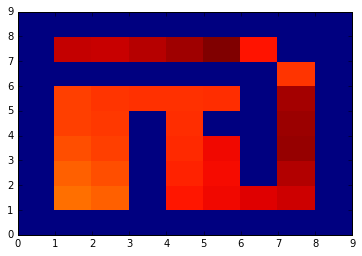

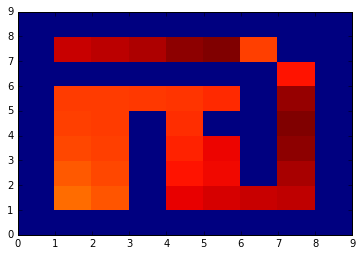

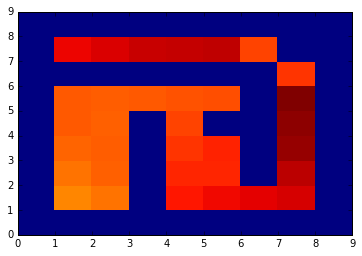

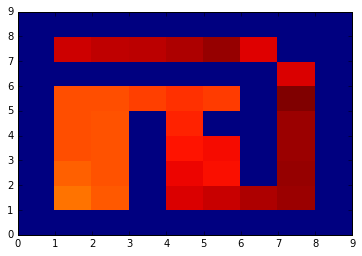

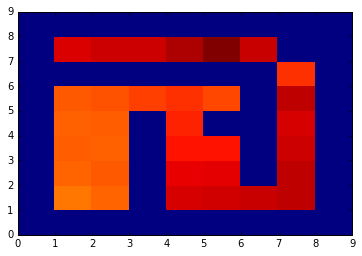

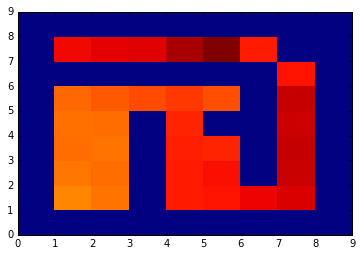

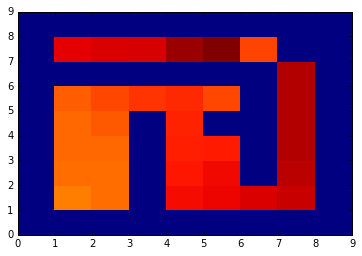

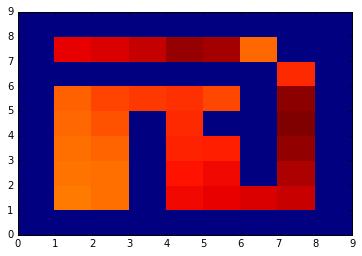

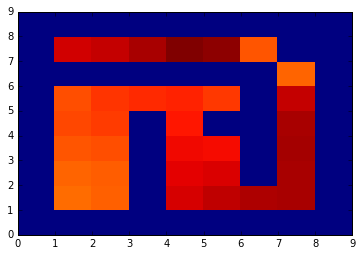

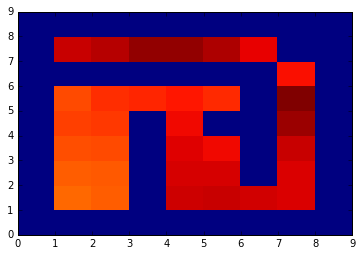

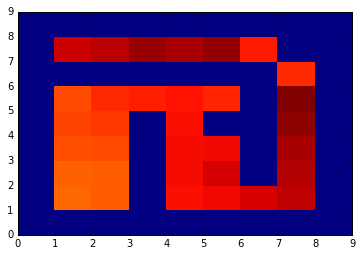

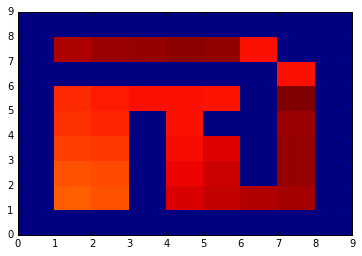

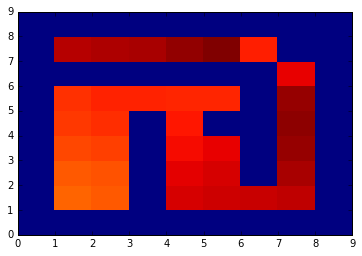

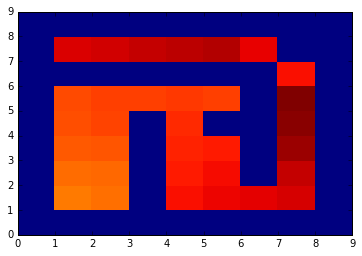

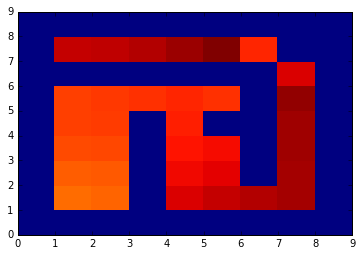

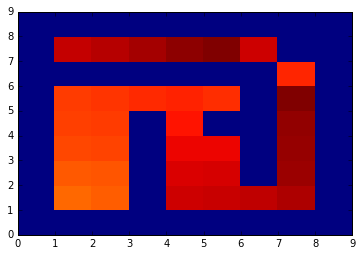

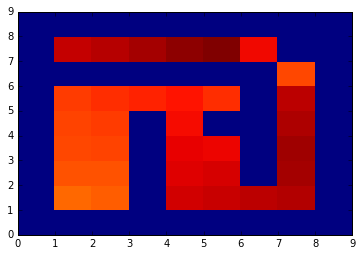

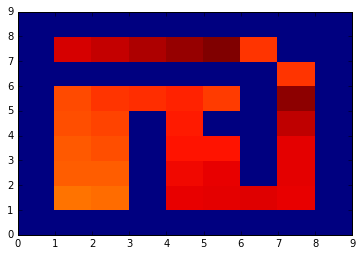

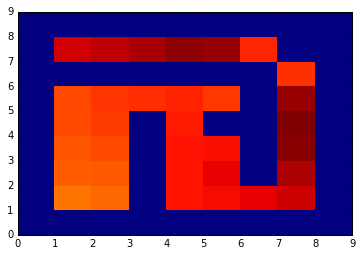

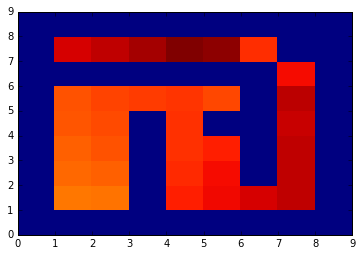

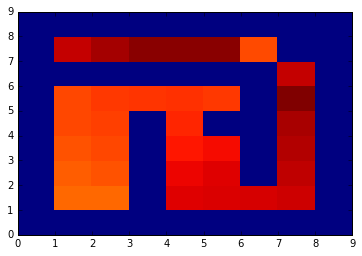

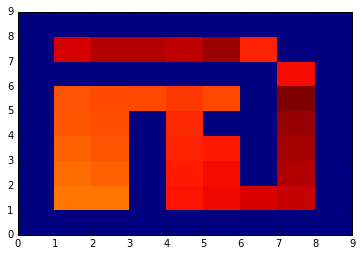

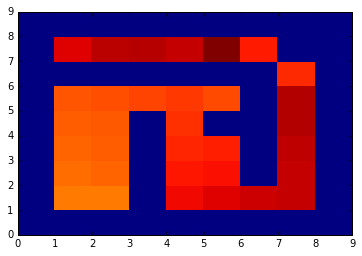

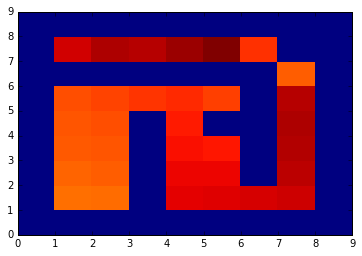

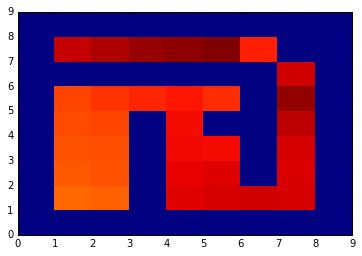

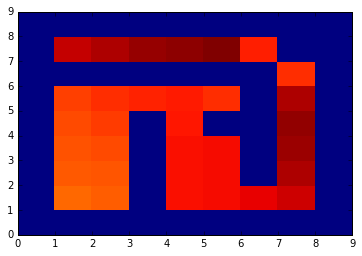

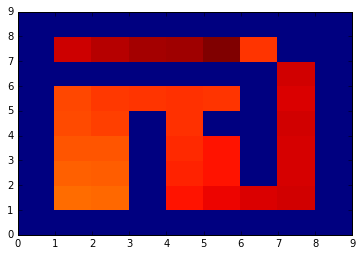

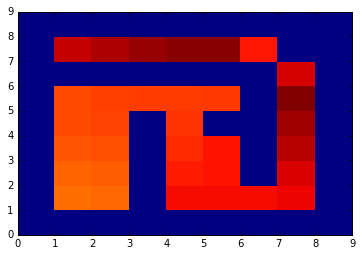

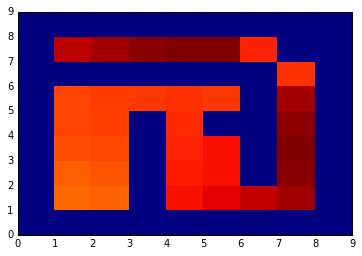

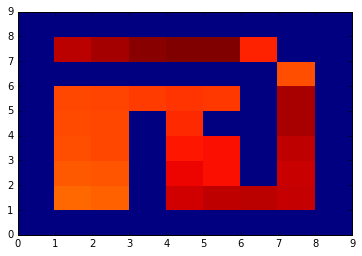

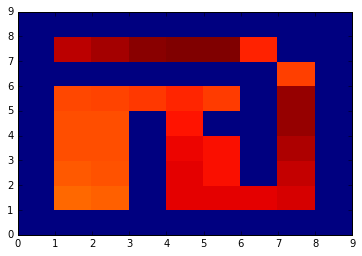

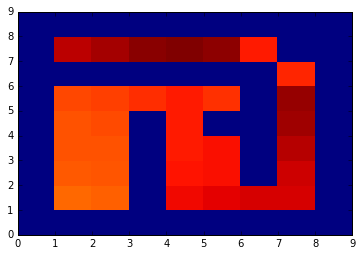

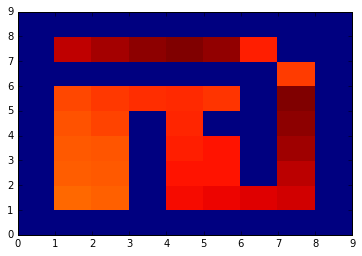

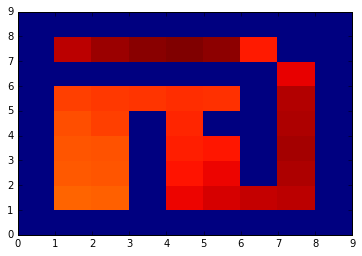

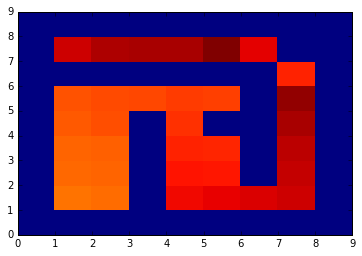

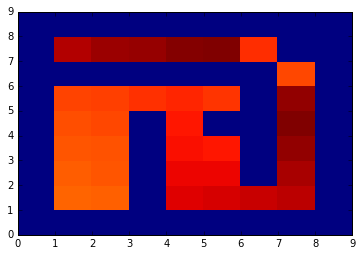

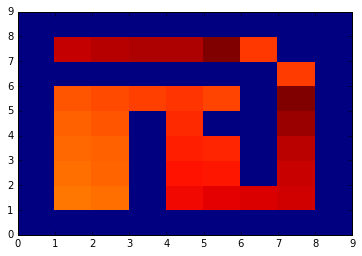

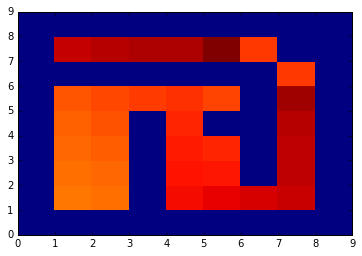

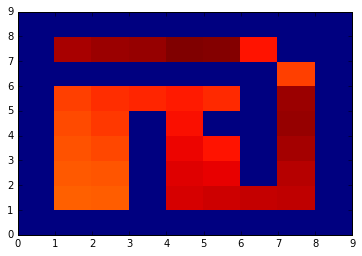

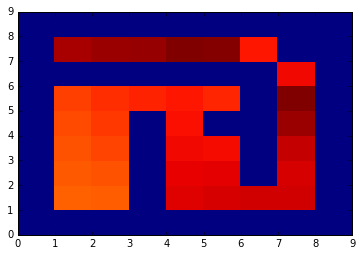

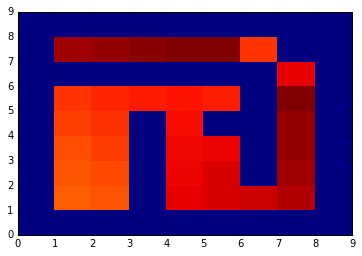

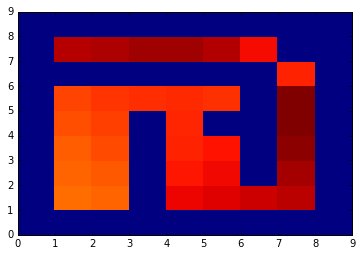

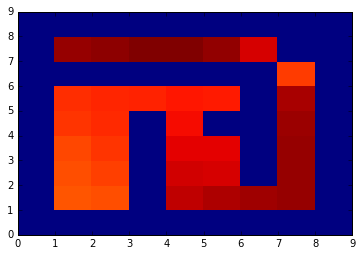

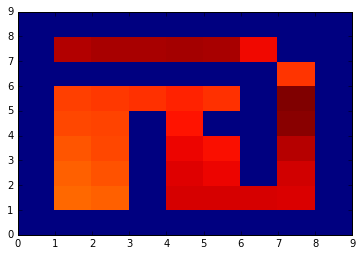

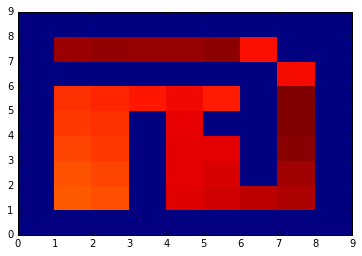

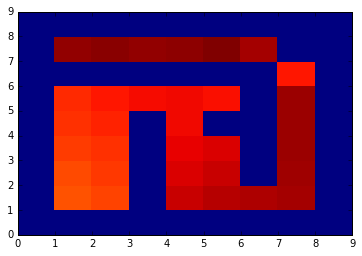

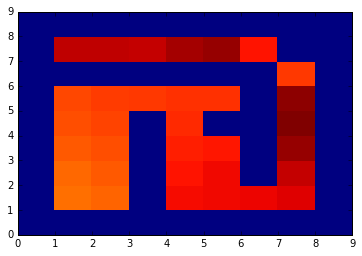

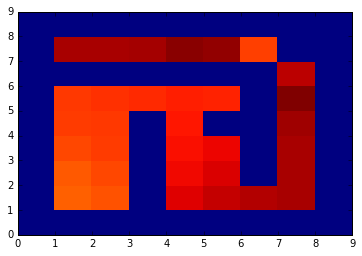

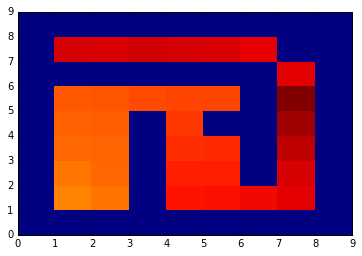

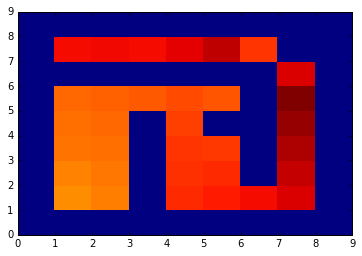

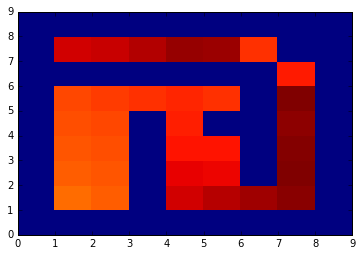

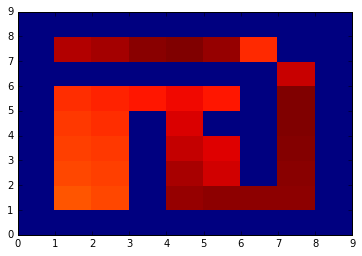

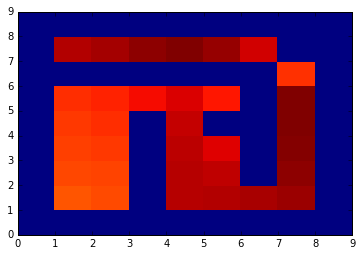

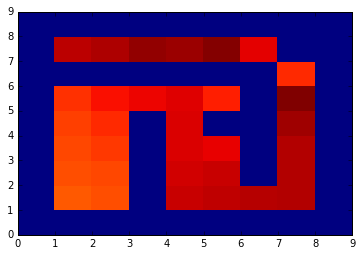

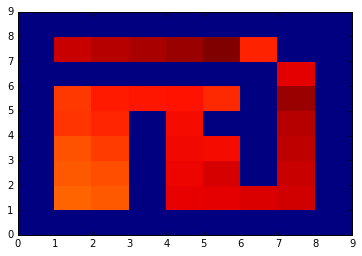

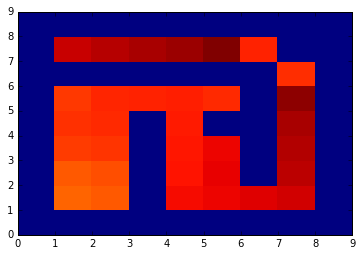

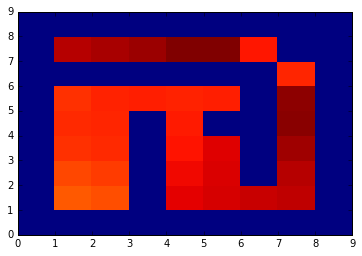

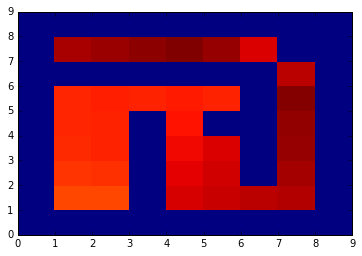

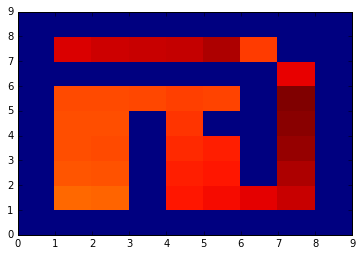

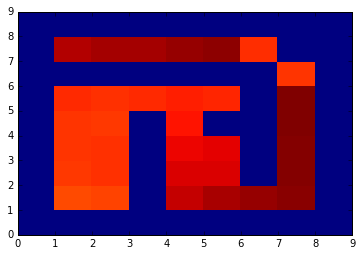

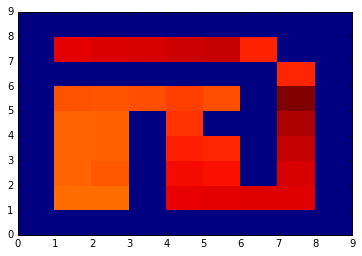

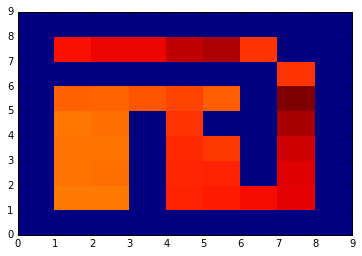

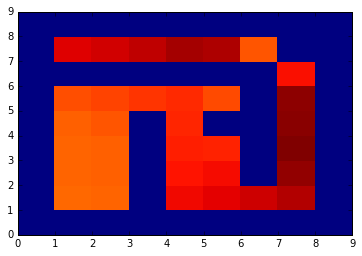

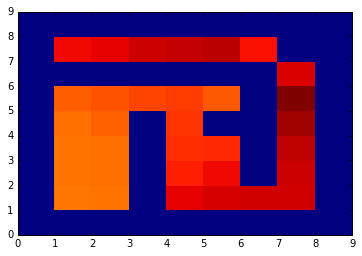

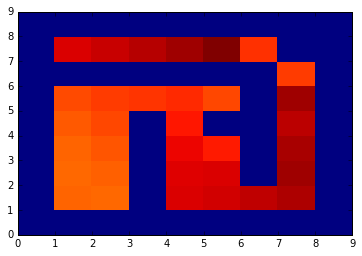

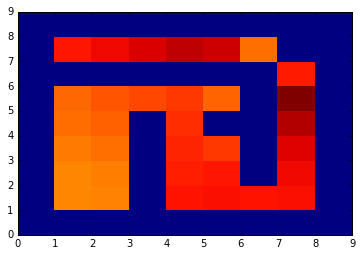

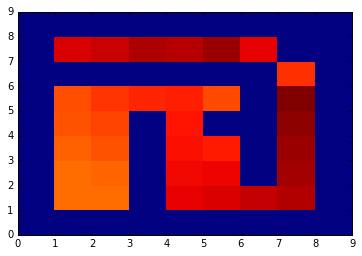

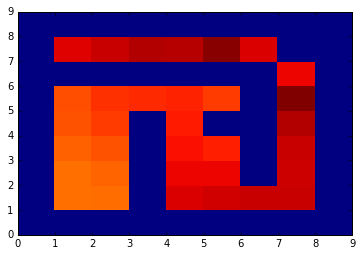

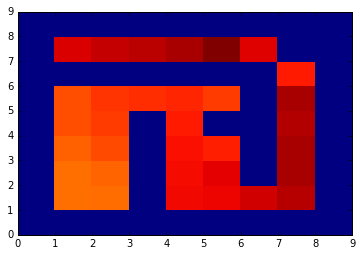

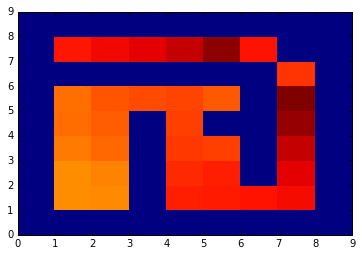

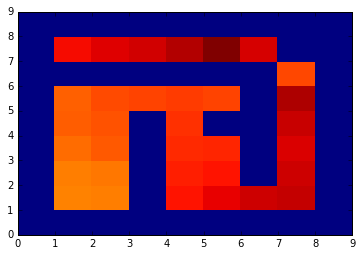

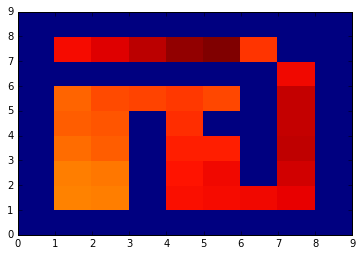

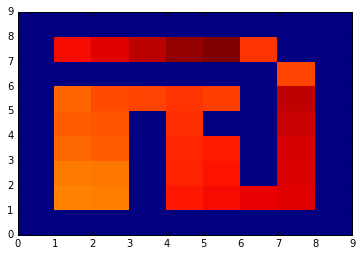

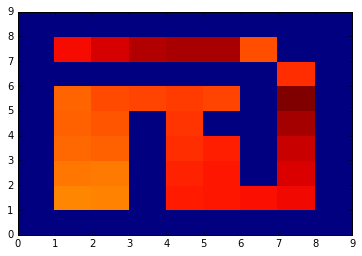

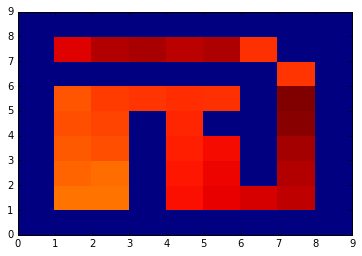

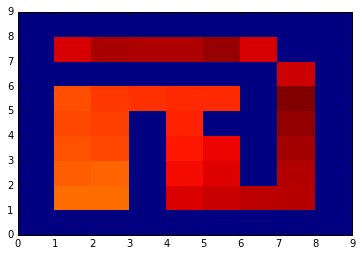

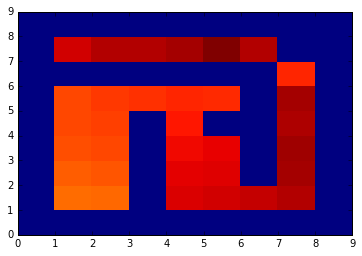

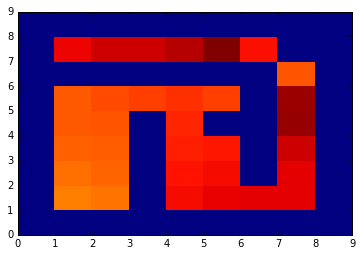

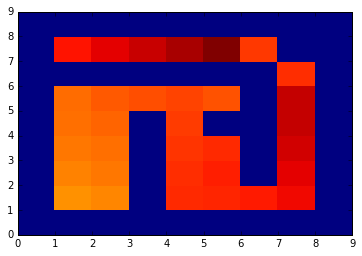

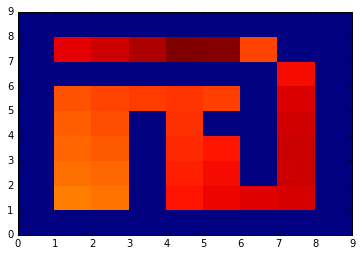

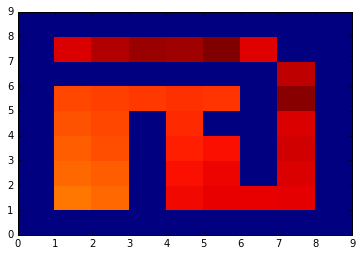

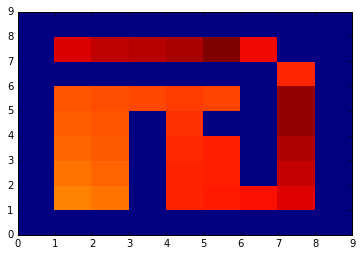

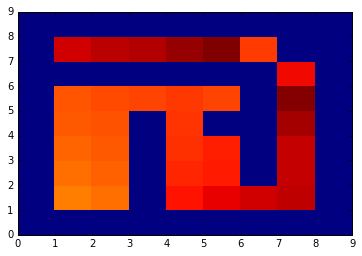

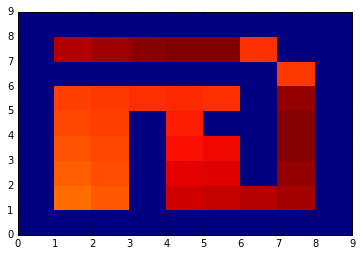

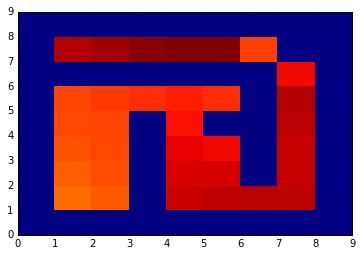

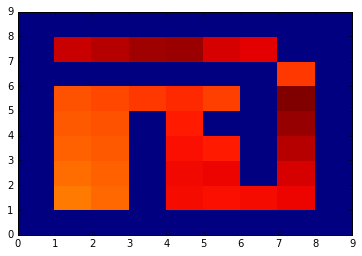

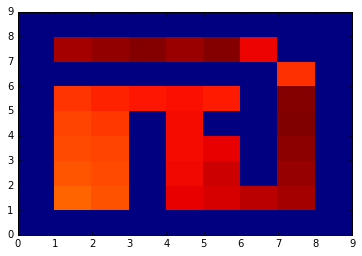

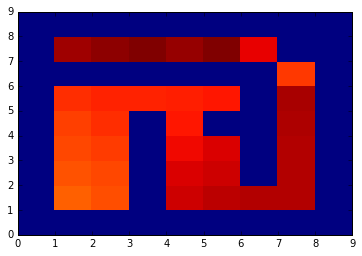

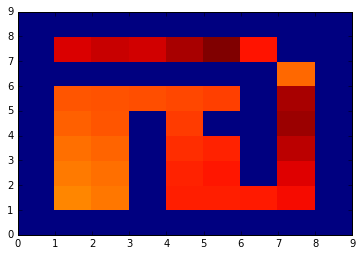

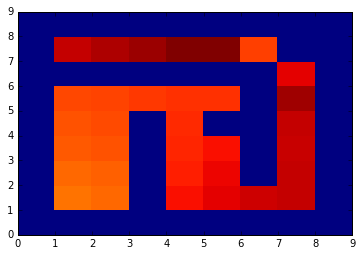

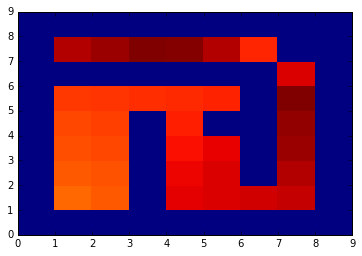

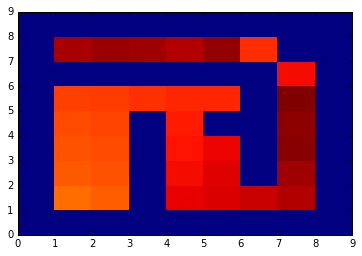

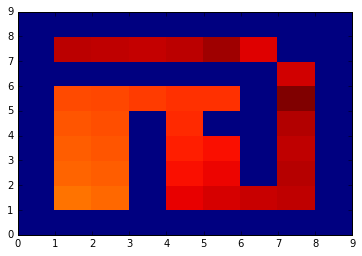

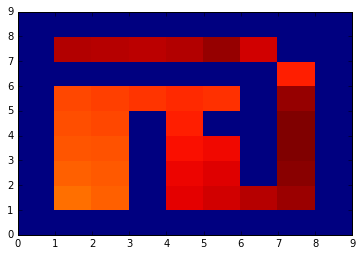

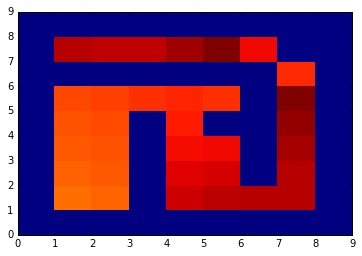

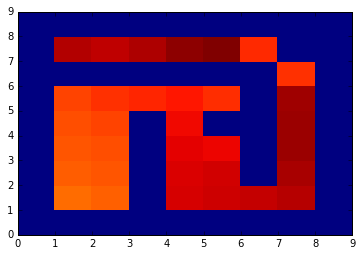

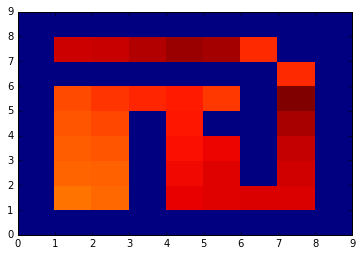

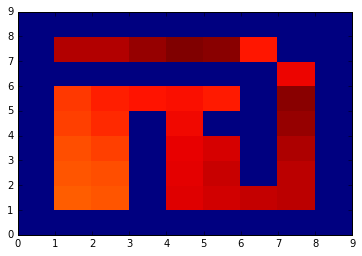

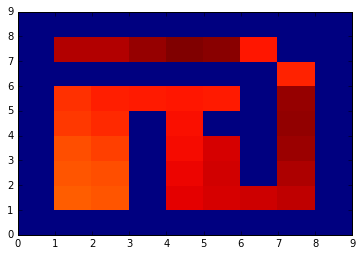

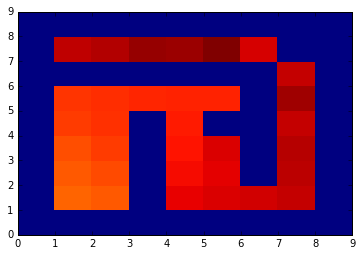

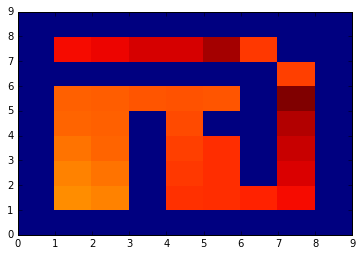

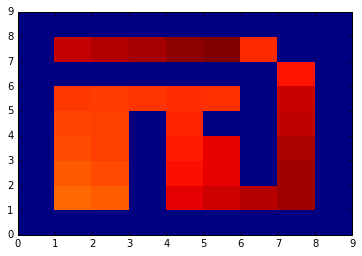

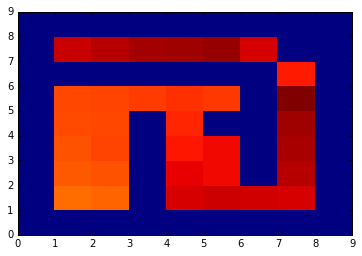

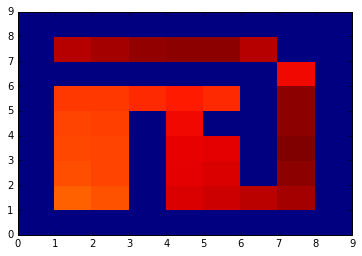

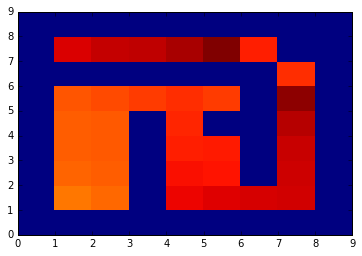

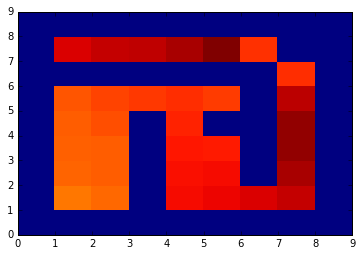

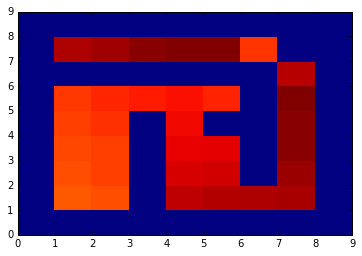

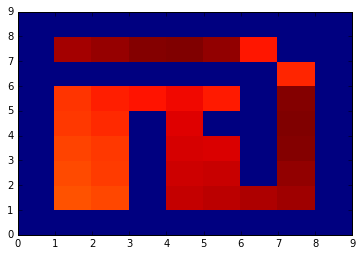

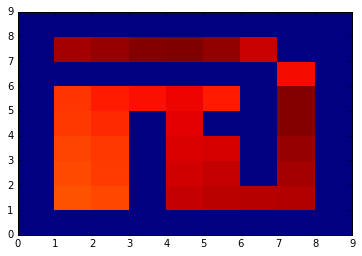

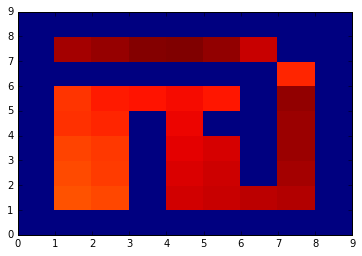

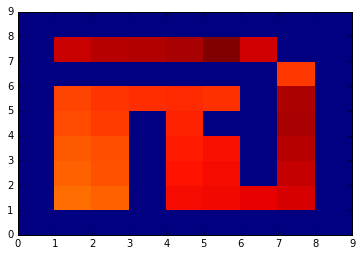

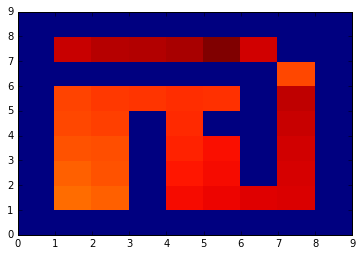

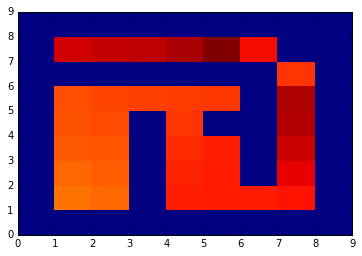

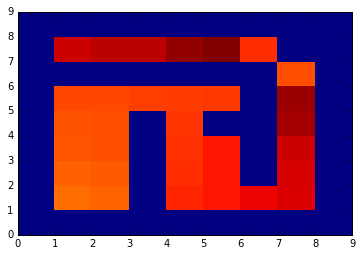

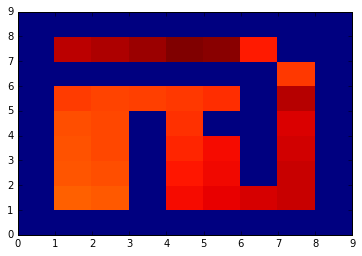

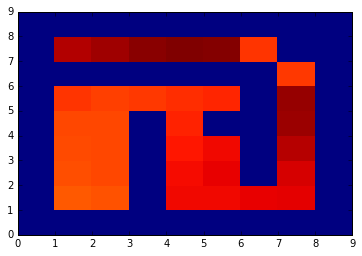

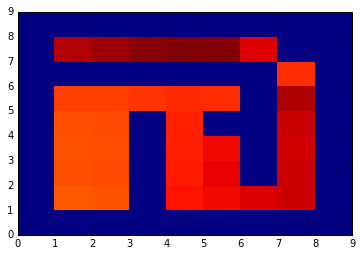

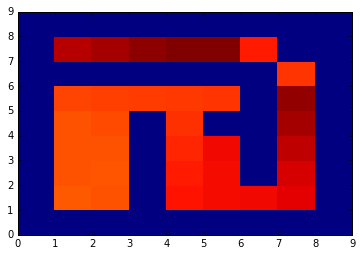

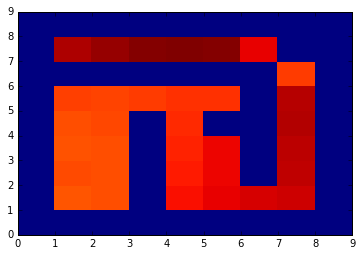

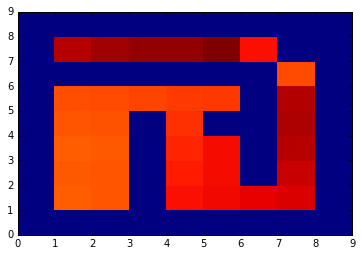

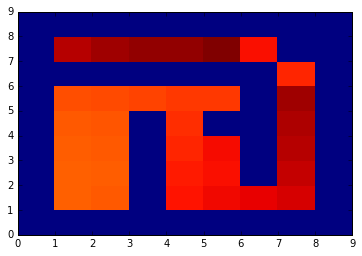

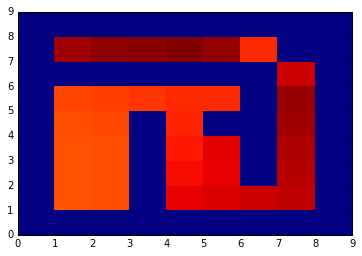

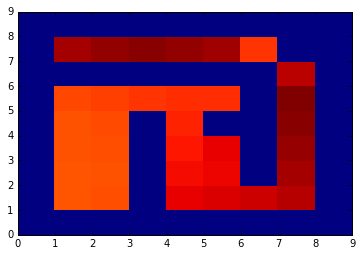

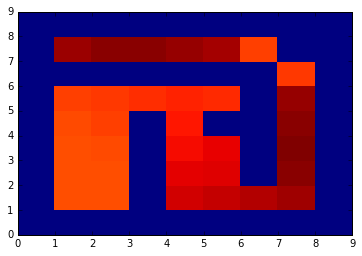

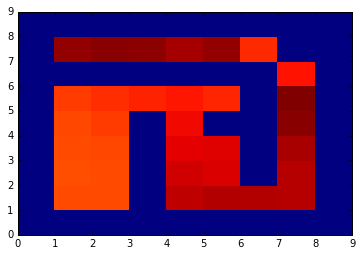

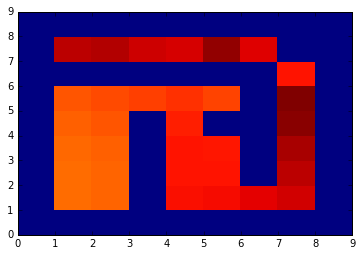

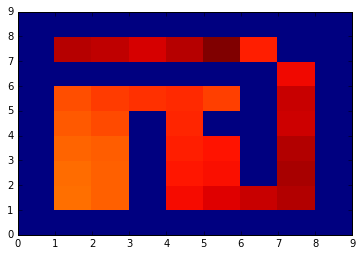

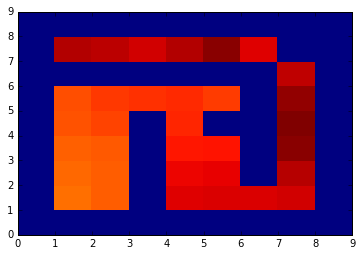

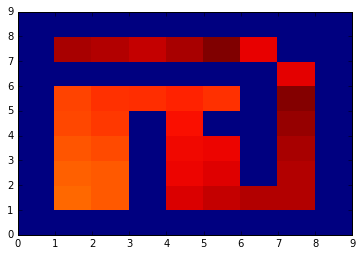

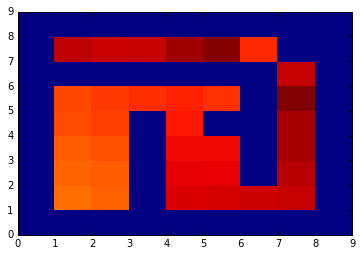

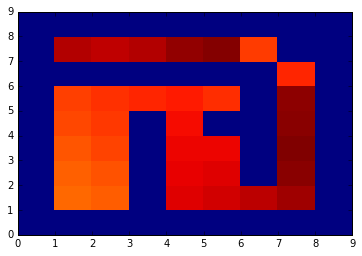

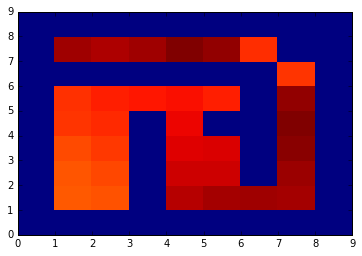

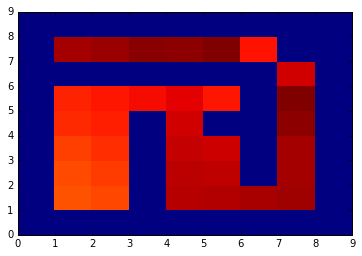

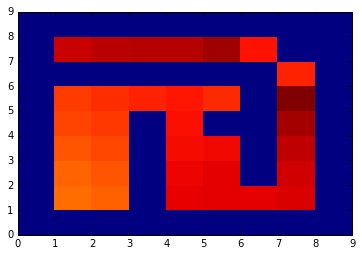

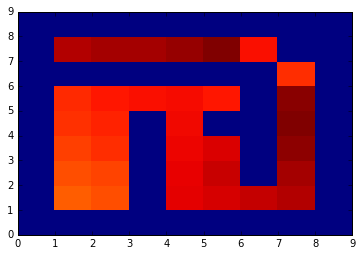

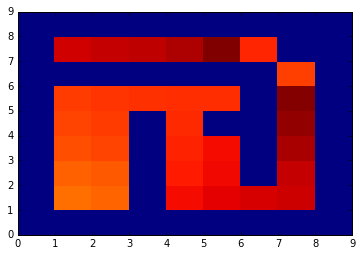

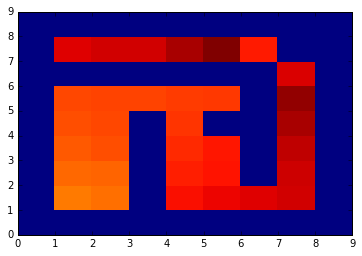

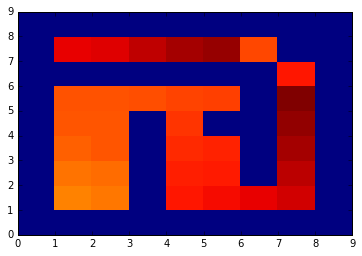

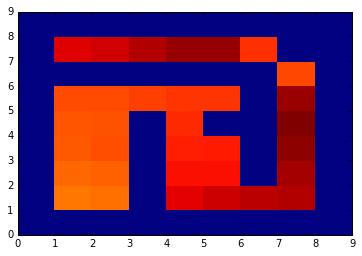

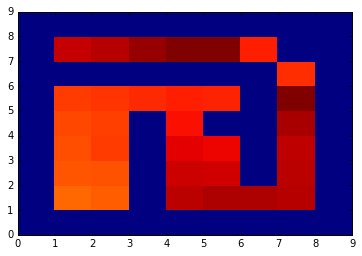

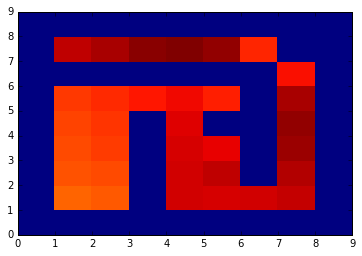

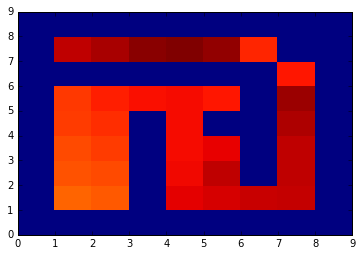

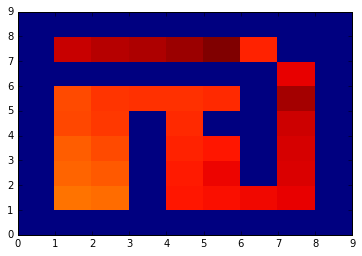

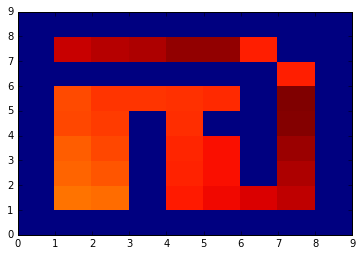

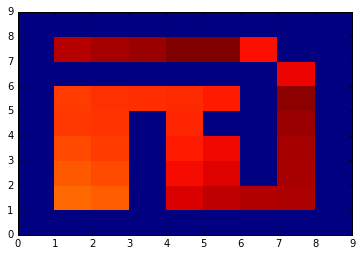

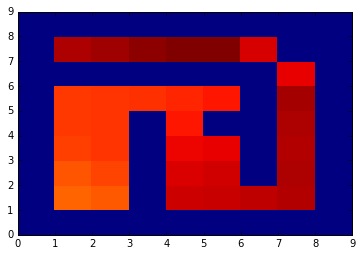

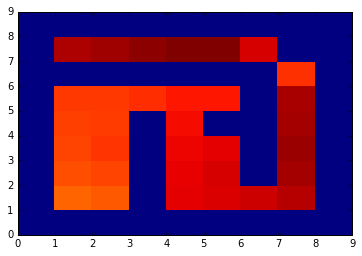

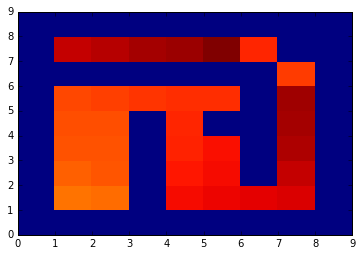

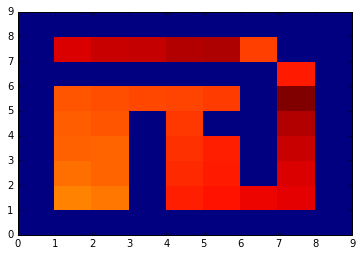

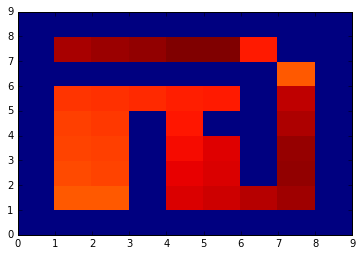

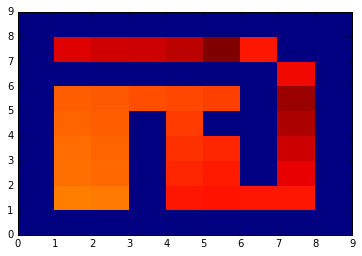

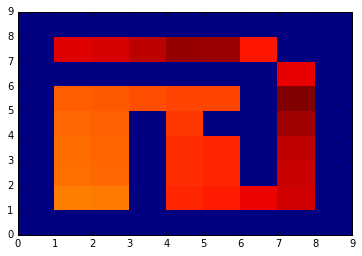

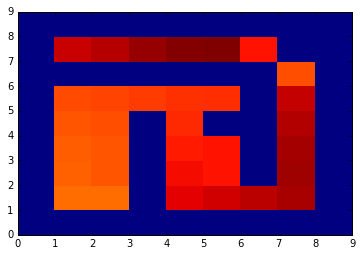

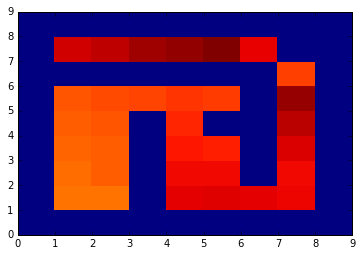

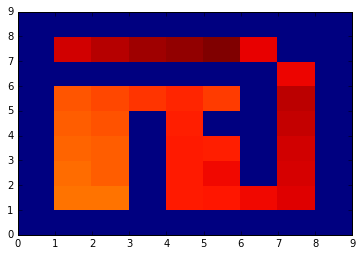

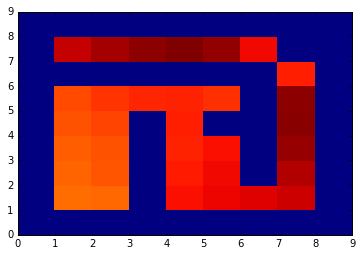

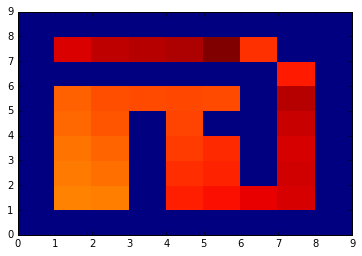

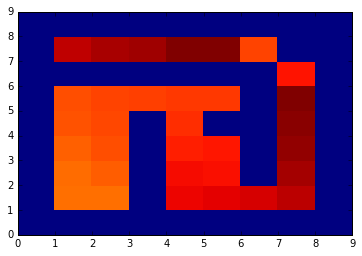

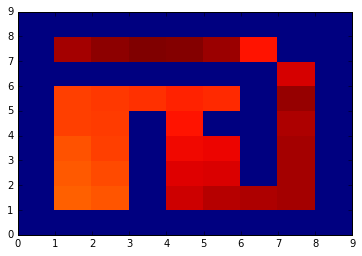

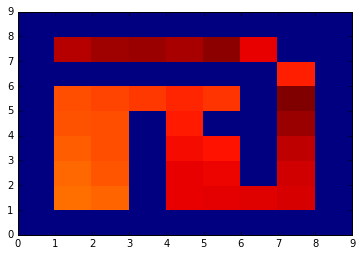

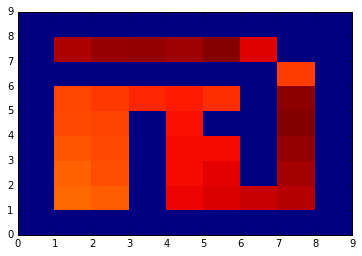

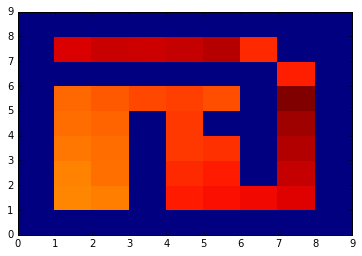

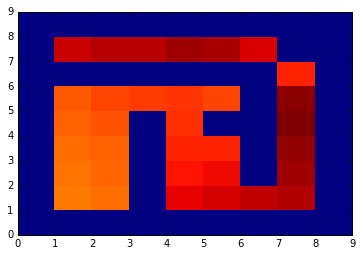

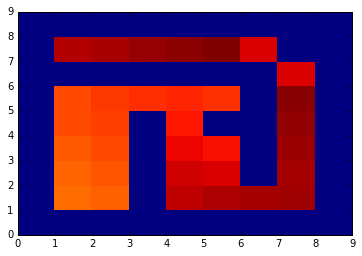

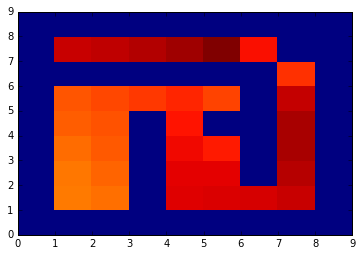

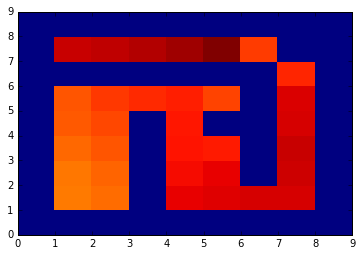

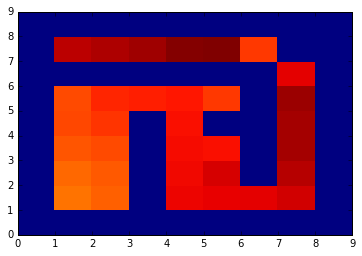

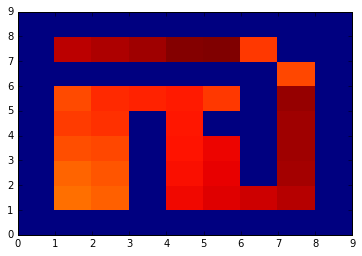

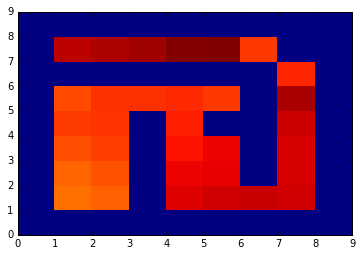

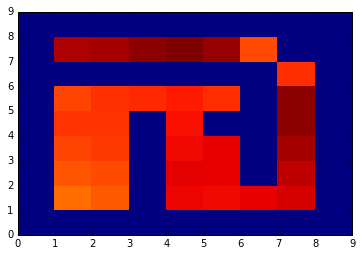

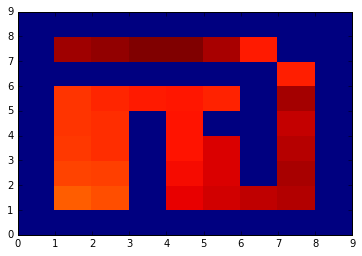

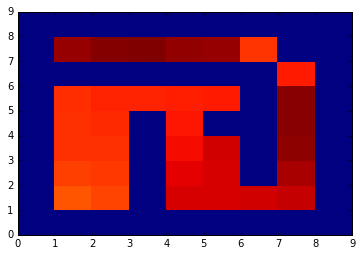

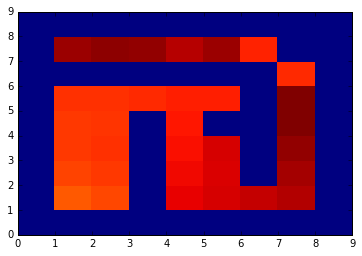

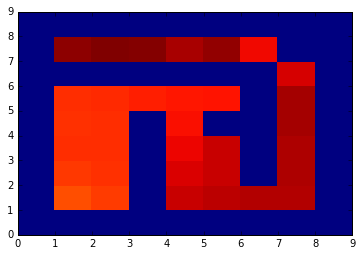

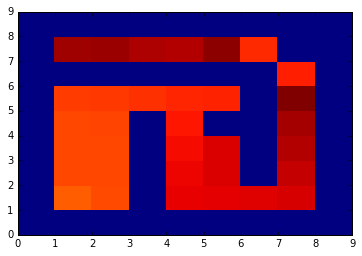

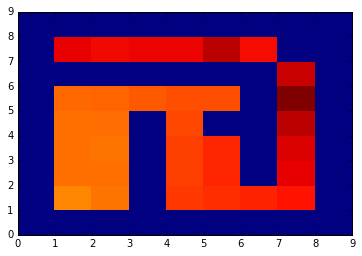

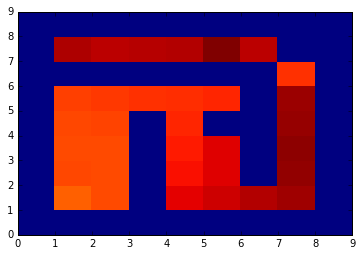

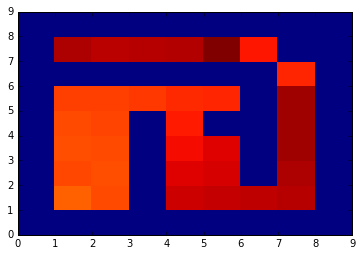

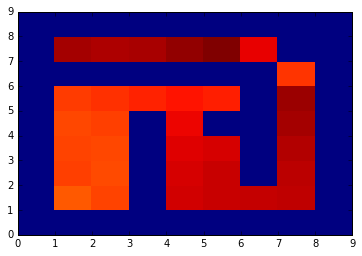

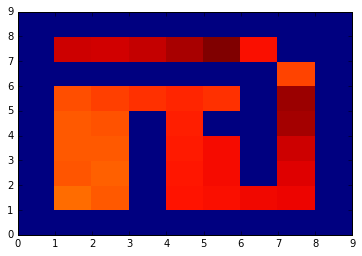

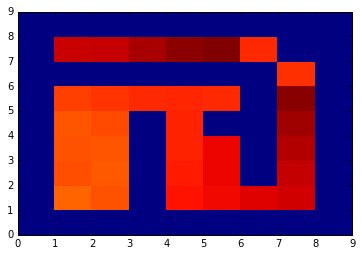

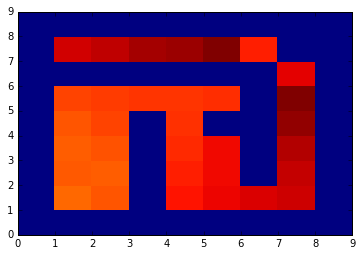

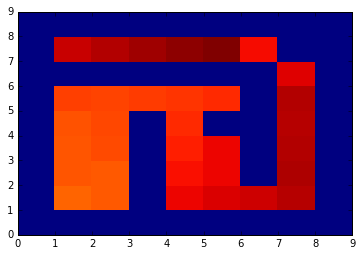

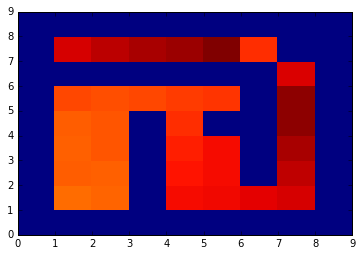

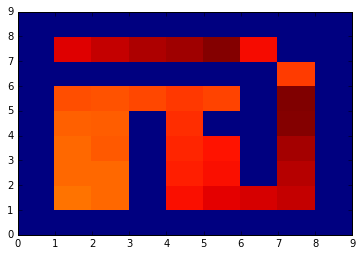

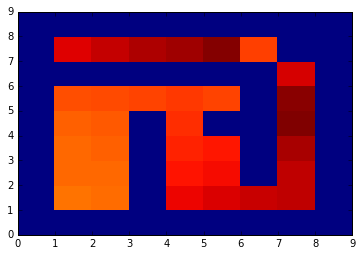

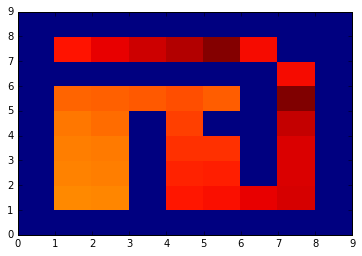

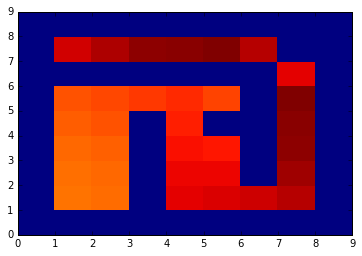

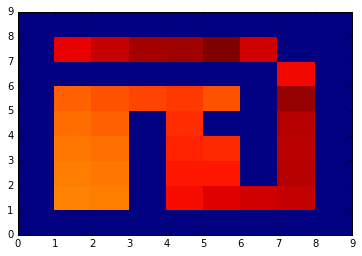

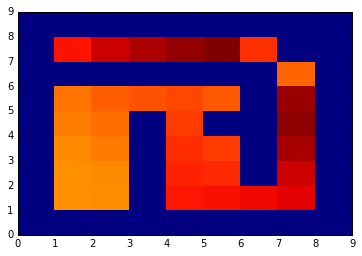

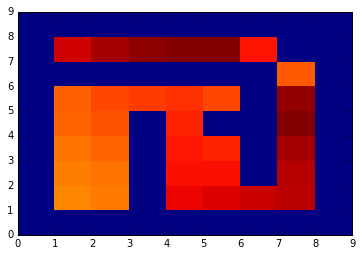

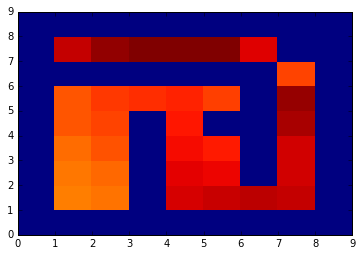

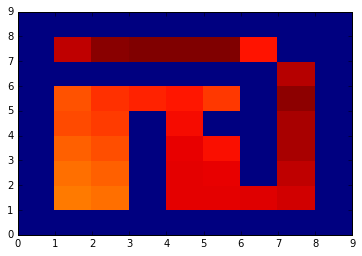

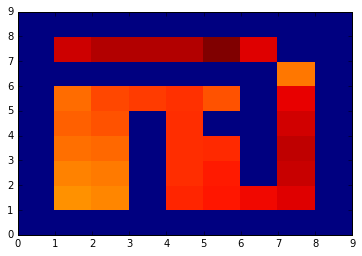

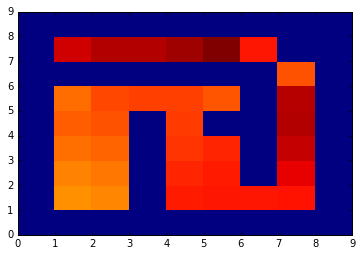

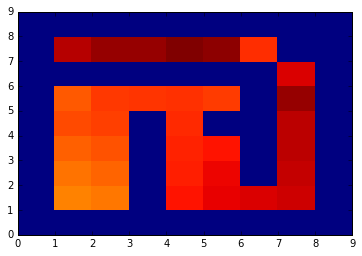

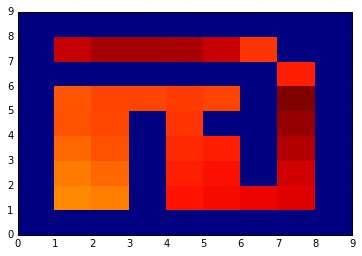

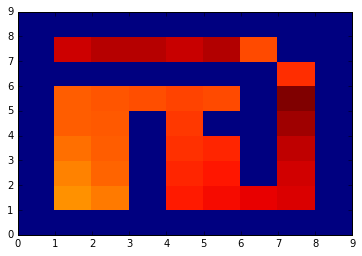

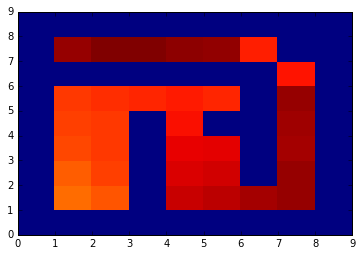

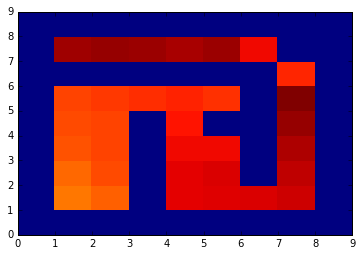

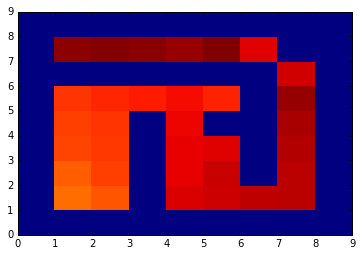

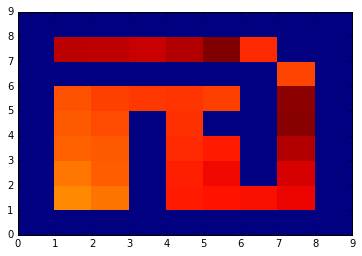

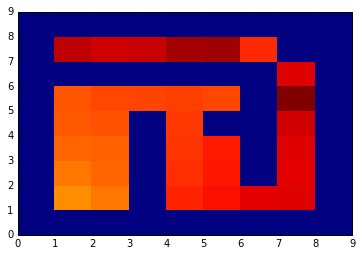

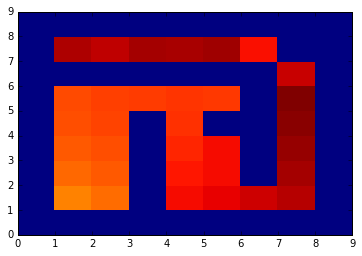

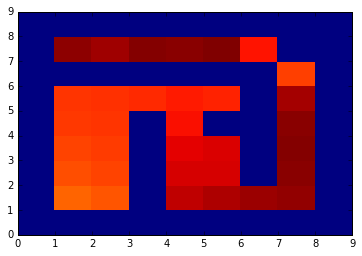

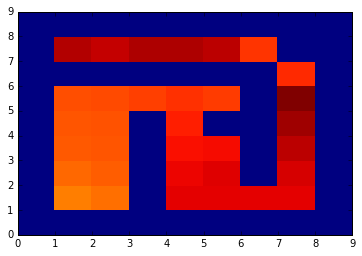

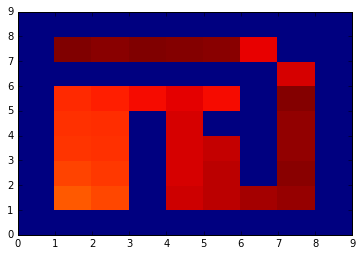

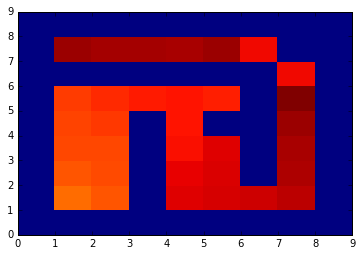

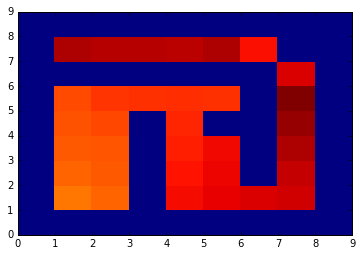

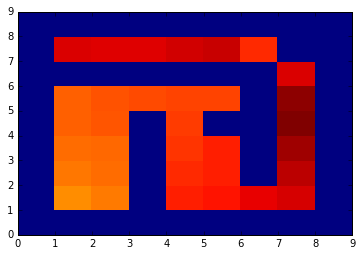

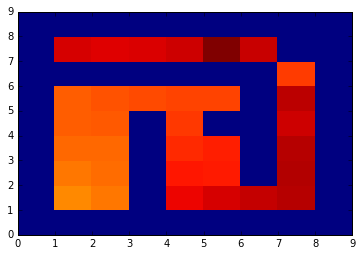

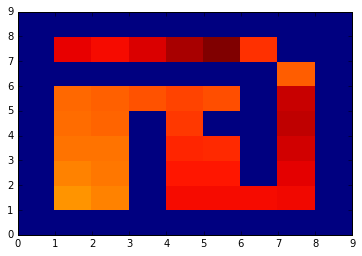

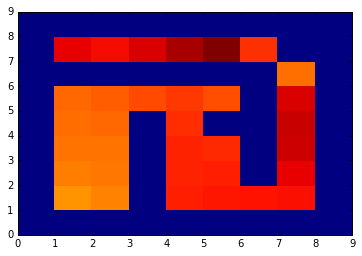

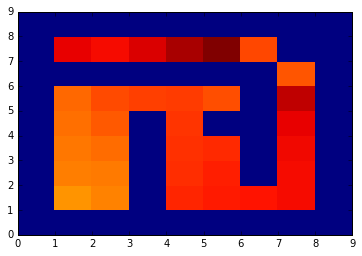

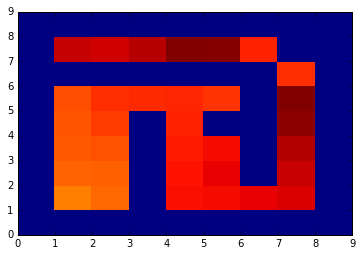

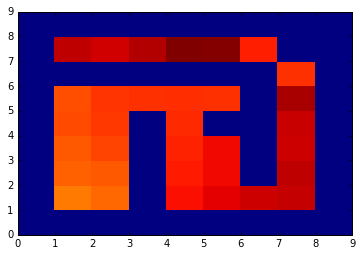

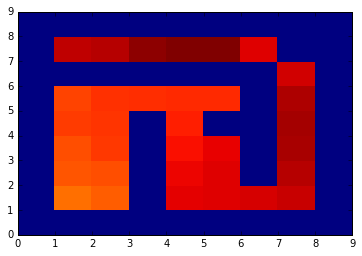

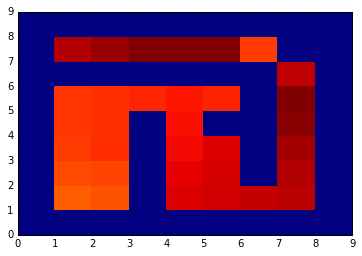

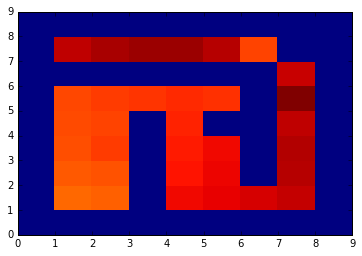

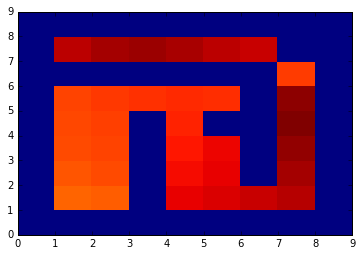

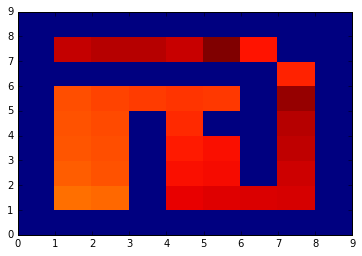

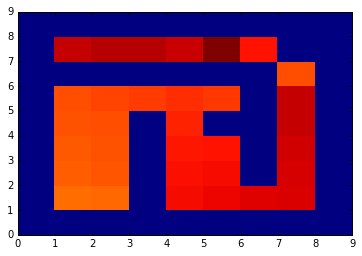

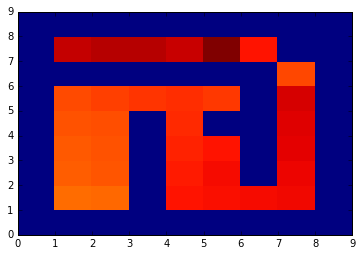

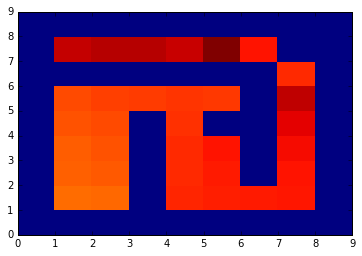

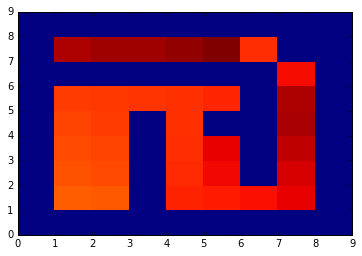

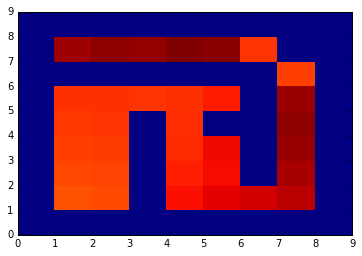

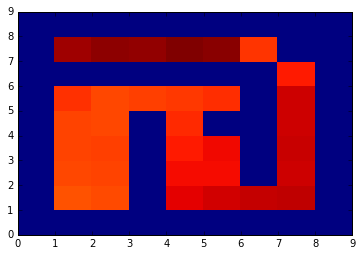

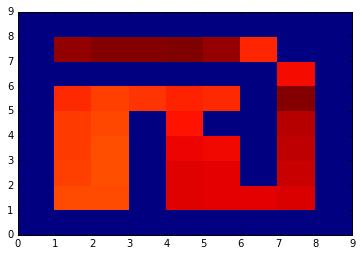

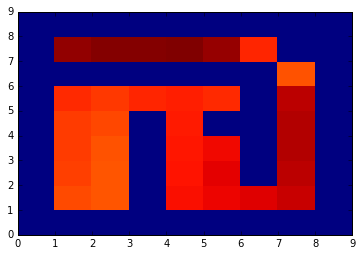

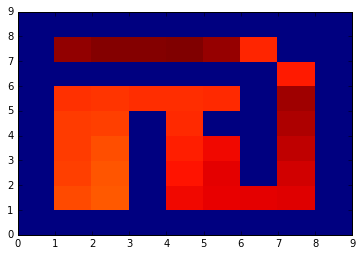

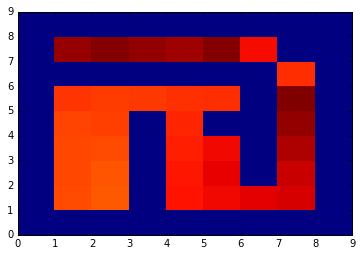

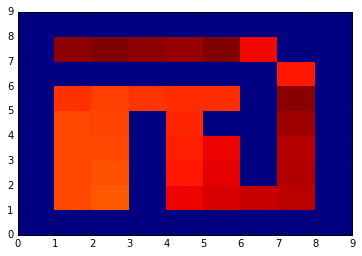

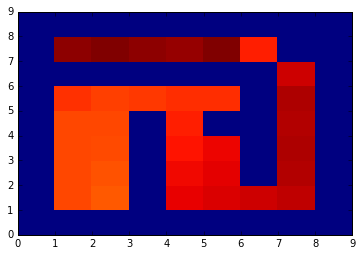

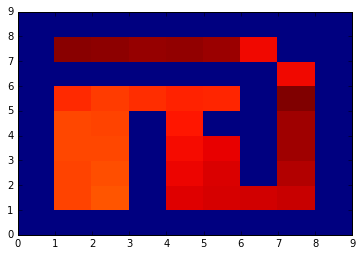

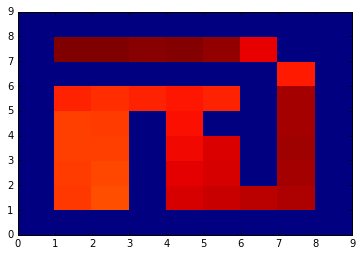

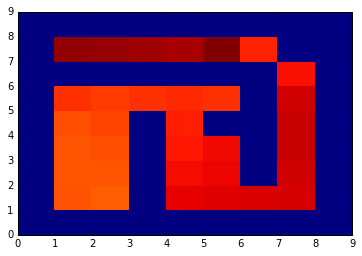

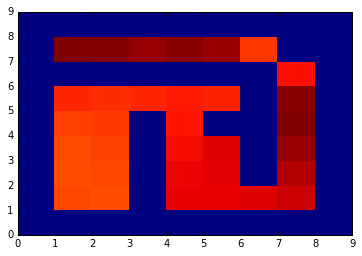

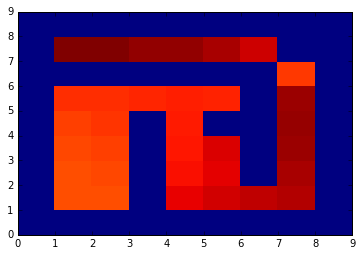

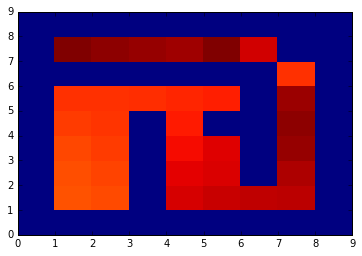

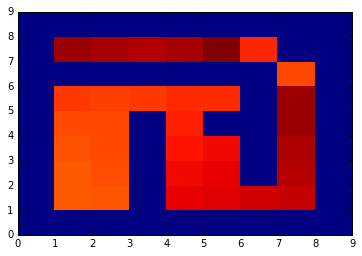

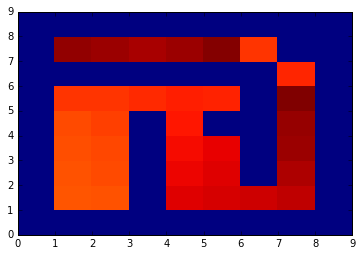

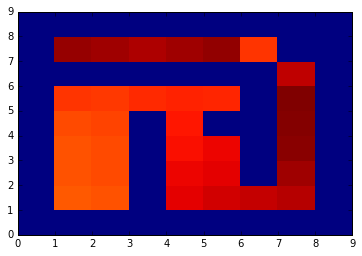

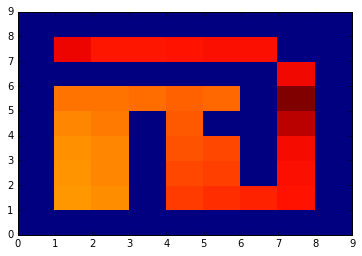

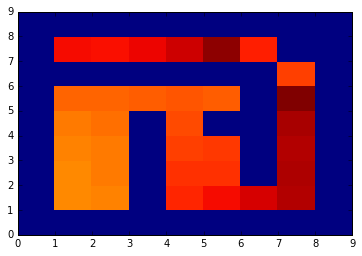

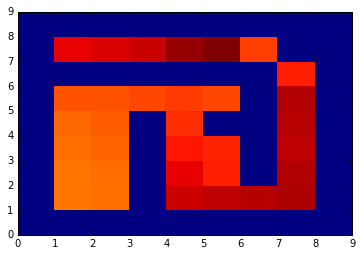

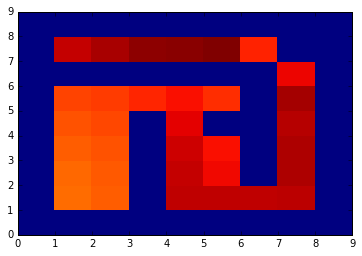

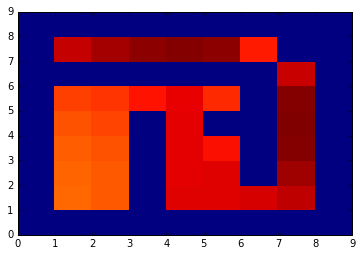

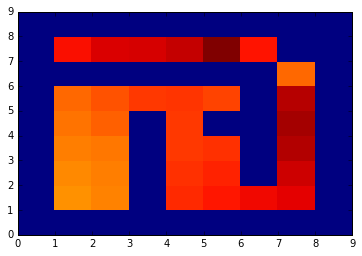

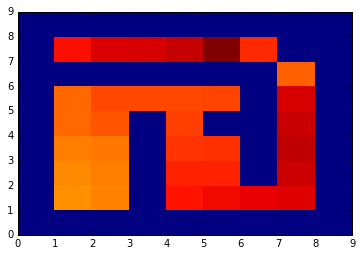

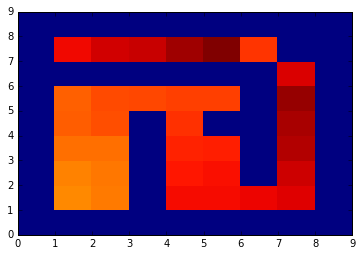

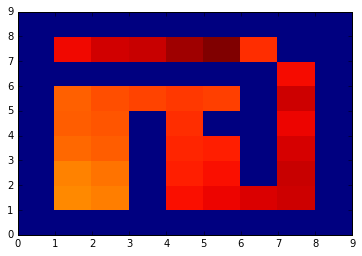

In [16]:
experiment = Experiment(task, agent)

for i in range(1000):
    experiment.doInteractions(100)
    agent.learn()
    agent.reset()

    plt.pcolor(controller.params.reshape(81,4).max(1).reshape(9,9))
    plt.show()

Above, the experiment executes 100 interactions between agent and environment, or, to be exact, between the agent and the task. The task will process the agent’s actions, possibly scale it and hand it over to the environment. The environment responds, returns the new state back to the task which decides what information should be given to the agent. The task also gives a reward value for each step to the agent.

After 100 steps, we call the agent’s learn() method and then reset it. This will make the agent forget the previously executed steps but of course it won’t undo the changes it learned.

Then the loop is repeated, until a desired behavior is learned.

In order to observe the learning progress, we visualize the controller with the last two code lines in the loop. The ActionValueTable consists of a scalar value for each state/action pair, in this case 81x4 values. A nice way to visualize learning is to only consider the maximum value over all actions for each state. This value is called the state-value V and is defined as V(s) = max_a Q(s, a).

We plot the new table after learning and resetting the agent, inside the while loop. Running this code, you should see the shape of the maze and a change of colors for the free fields. During learning, colors may jump and change back and forth, but eventually the learning should converge to the true state values, having higher scores (brighter fields) the closer they are to the goal.

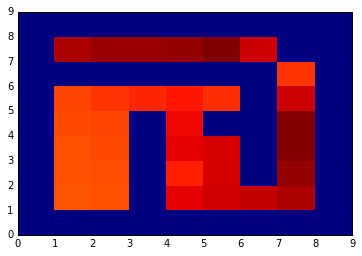

In [12]:
plt.pcolor(controller.params.reshape(81,4).max(1).reshape(9,9))
plt.show()

# 3. 예제 - 블랙잭

First, we will start with a very basic, minimalist scenario where a hand is dealt, and the agent is asked whether it should get another card, or stop. There is no such thing as splitting, there is no betting, etc. From the business perspective, then, the scenario can be represented as 21 states calling for 2 possible actions. The 21 states are, of course, the total hand value that the agent was dealt, and the 2 possible actions are Hit or Stand.

To simplify the code, the interaction will occur on the command line, and the user will feed in manually the hand dealt and the results of the agent's action. The steps of the interaction are:

* 1 – Ask user to input the hand value that was dealt.
* 2 – The agent performs the action, outputs it to the user.
* 3 – Ask user to input the reward, i.e. whether the hand was winning (1.0), a draw (0.0), or losing (-1.0).
* 4 – The agent learns

We will start with gamma = 0.0 and see what our results are.

## Environment

In [18]:
from pybrain.rl.environments.environment import Environment
from scipy import zeros

In [19]:
class BlackjackEnv(Environment):
    """ A (terribly simplified) Blackjack game implementation of an environment. """       

    # the number of action values the environment accepts
    indim = 2
    
    # the number of sensor values the environment produces
    outdim = 21
    
    def getSensors(self):
        """ the currently visible state of the world (the    observation may be stochastic - repeated calls returning different values) 
            :rtype: by default, this is assumed to be a numpy array of doubles
        """
        hand_value = int(raw_input("Enter hand value: ")) - 1
        return [float(hand_value),]
                    
    def performAction(self, action):
        """ perform an action on the world that changes it's internal state (maybe stochastically).
            :key action: an action that should be executed in the Environment. 
            :type action: by default, this is assumed to be a numpy array of doubles
        """
        print "Action performed: ", action

    def reset(self):
        """ Most environments will implement this optional method that allows for reinitialization. 
        """

## Task

In [20]:
from scipy import clip, asarray

from pybrain.rl.environments.task import Task
from numpy import *

In [26]:
class BlackjackTask(Task):
    """ A task is associating a purpose with an environment. It decides how to evaluate the observations, potentially returning reinforcement rewards or fitness values. 
    Furthermore it is a filter for what should be visible to the agent.
    Also, it can potentially act as a filter on how actions are transmitted to the environment. """

    def __init__(self, environment):
        """ All tasks are coupled to an environment. """
        self.env = environment
        # we will store the last reward given, remember that "r" in the Q learning formula is the one from the last interaction, not the one given for the current interaction!
        self.lastreward = 0

    def performAction(self, action):
        """ A filtered mapping towards performAction of the underlying environment. """                
        self.env.performAction(action)
        
    def getObservation(self):
        """ A filtered mapping to getSample of the underlying environment. """
        sensors = self.env.getSensors()
        return sensors
    
    def getReward(self):
        """ Compute and return the current reward (i.e. corresponding to the last action performed) """
        reward = raw_input("Enter reward: ")
        
        # retrieve last reward, and save current given reward
        cur_reward = self.lastreward
        self.lastreward = reward
    
        return cur_reward

    @property
    def indim(self):
        return self.env.indim
    
    @property
    def outdim(self):
        return self.env.outdim

## Run !!

To summarize the training parameters:

* alpha = 0.5
* gamma = 0.0
* epsilon (the exploratory parameter) = 0.0
* the learning module is classical Q learning (Q)
* the agent is a LearningAgent
* the experiment is a basic Experiment class instance

In [27]:
from pybrain.rl.learners.valuebased import ActionValueTable
from pybrain.rl.agents import LearningAgent
from pybrain.rl.learners import Q
from pybrain.rl.experiments import Experiment
from pybrain.rl.explorers import EpsilonGreedyExplorer

In [28]:
# define action-value table
# number of states is:
#
#    current value: 1-21
#
# number of actions:
#
#    Stand=0, Hit=1
av_table = ActionValueTable(21, 2)
av_table.initialize(0.)

In [29]:
# define Q-learning agent
learner = Q(0.5, 0.0)
learner._setExplorer(EpsilonGreedyExplorer(0.0))
agent = LearningAgent(av_table, learner)

In [30]:
# define the environment
env = BlackjackEnv()

In [31]:
# define the task
task = BlackjackTask(env)

In [32]:
# finally, define experiment
experiment = Experiment(task, agent)

In [33]:
# ready to go, start the process
#while True:
for i in range(0, 10) :
    experiment.doInteractions(1)
    agent.learn()
    agent.reset()

Enter hand value: 1
Action performed:  [ 0.]
Enter reward: -1.0
Enter hand value: 5
Action performed:  [ 0.]
Enter reward: -1.0
Enter hand value: 10
Action performed:  [ 0.]
Enter reward: -1.0
Enter hand value: 1
Action performed:  [ 1.]
Enter reward: 1.0
Enter hand value: 3
Action performed:  [ 0.]
Enter reward: -1.0
Enter hand value: 21
Action performed:  [ 0.]
Enter reward: 1.0
Enter hand value: 10
Action performed:  [ 1.]
Enter reward: 1.0
Enter hand value: 21
Action performed:  [ 0.]
Enter reward: 0
Enter hand value: 11
Action performed:  [ 0.]
Enter reward: 0
Enter hand value: 11
Action performed:  [ 0.]
Enter reward: 0


# 참고자료

* [1] PyBrain v0.3 documentation(reinforcement learning part) - http://pybrain.org/docs/tutorial/reinforcement-learning.html 
* [2] Stackoverflow Q&A - Pybrain   http://stackoverflow.com/questions/30819133/pybrain-reinforcement-learning-example
* [3] PyBrain: Reinforcement Learning, a Tutorial(Black Jack playing agent) http://simontechblog.blogspot.kr/2010/08/pybrain-reinforcement-learning-tutorial.html